# Fase 3: Preparación de Datos

En esta fase se lleva a cabo la preparación del dataset, abordando tareas clave como la limpieza de datos, el tratamiento de valores nulos y duplicados, la detección y manejo de outliers, y el escalamiento de variables numéricas. Esta etapa es fundamental para asegurar la calidad de los datos antes del modelado.

Para la preparación de los datos, abordaremos el tratamiento de outliers, valores nulos (NaNs) y el balance de clases según la ubicación geográfica (Location) y la estación del año.

## Manejo de las variables de nubosidad

Antes de comenzar limpiaremos nuestro dataset de ciertas columnas que no usaremos desde aqui en adelante. Borraremos las columnas year, month y month_name. Dejaremos solo la variable Estacion (Estación del año).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df = pd.read_csv("../data/data_to_preparation.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud3pm  Temp9am  Temp3pm  \
0           W           44.0          W  ...      NaN     16.9     21.8   
1         WNW           44.0        NNW  ...      NaN     17.2     24.3   
2         WSW           46.0          W  ...      2.0     21.0     23.2   
3          NE           24.0         SE  ...      NaN     18.1     26.5   
4           W           41.0        ENE  ...      8.0     17.8     29.7   

   RainToday  RISK_MM  RainTomorrow  year  month  month_name  Estacion  
0         No      0.0            No  2008     12    December    Verano  
1         No      0.0            No  2008     12    December    Verano  
2         No      0.0            No  2008     12    December    Verano  
3         No      1.0            No  2008     12    December    Verano  
4         No      0.2            No  2008     12    December    Verano  

[5 rows x 28 columns]

In [5]:
del df['year']
del df['month']
del df['month_name']

Luego, filtraremos los datos de nubosidad que tengan 9, dado que la nubosidad Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto. sacaremos los datos de nubosidad 9 del detaset, dado que son registros con nubosidad erronea.

In [7]:
df.shape

(142193, 25)

Vemos que son 3 registros que filtraremos de nuestro dataset

In [9]:
cloud_9 = df[(df['Cloud3pm'] == 9.0) | (df['Cloud9am'] == 9.0)]
cloud_9

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
30097   2009-09-23    Sydney     17.0     21.8       4.4         11.2   
45981   2012-05-27  Canberra      0.6     14.5       0.0          NaN   
104342  2012-11-02   Woomera     10.6     24.6       0.2         11.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Pressure9am  \
30097        8.0         NaN            NaN          W  ...       996.8   
45981        7.8          SW           30.0        NNW  ...      1022.4   
104342      11.4         SSE           39.0         SE  ...      1019.0   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
30097         997.8       9.0       3.0     17.3     20.9        Yes      0.0   
45981        1020.7       9.0       NaN      4.4     14.2         No      0.0   
104342       1015.2       6.0       9.0     14.8     23.7         No      0.0   

        RainTomorrow   Estacion  
30097             No  Primavera  
45981             No      Otoño  
104342            No  Primavera  

[3 rows x 25 columns]

In [11]:
df = df[(df['Cloud3pm'] != 9.0) & (df['Cloud9am'] != 9.0)]

Verificamos que se hayan filtrado los datos erroneos, quedando con un total de 142.190 registros, eliminando los 3 registros de nubosidad erronea

In [13]:
df.shape

(142190, 25)

## Tratamientos de duplicados

Observamos que no obtenemos registros duplicados

In [15]:
duplicados = df[df.duplicated()]
print(f"Cantidad de registros duplicados: {duplicados.shape[0]}")

Cantidad de registros duplicados: 0


## Tratamiento de OUTLIERS por Location y Estacion del año

Ahora procemos a hacer transformaciones sobre el dataset. Partiremos con el tratamiento de outliers.

El tratamiento de OUTLIERS nos permite abordar aquellas observaciones que se alejan de manera considerable del patrón general del conjunto de datos, pudiendo perjudicar la validez del análisis y los resultados posteriores.

In [31]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'Estacion'],
      dtype='object')

Seleccionamos solo las variables numéricas. Dejando afuera las variables 'RISK_MM' y 'Rainfall', ya que más adelante aplicaremos discretización sobre estas variables, es decir, las categorizaremos y las trataremos como variables categóricas. Además dejaremos afuera a las variables 'Cloud9am', 'Cloud3pm' ya que son variables categóricas que ya estan transformadas por defecto con un valor entre 0 y 8.

In [17]:
lista_num = df.select_dtypes(include='number').columns.to_list()
lista_num = [col for col in lista_num if col not in ['RISK_MM', 'Rainfall', 'Cloud9am', 'Cloud3pm']]
lista_num

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [19]:
len(lista_num)

13

Ahora visualizaremos los outliers de cada variable según su respectiva Locación y estación del año. Aplicaremos el tratamiento reemplazandolos por la mediana y finalmente volveremos a graficar los outliers para observar los cambios generados.

In [21]:
def boxes_facet(x, y, h, df, titulo="", r=90):
    g = sns.catplot(
        x=x, y=y, col=h, data=df,
        kind="box", col_wrap=2, height=5, aspect=2, sharey=False
    )
    g.set_xticklabels(rotation=r)
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(titulo, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [23]:
def tratar_outliers_por_grupo(df, columna, grupo1, grupo2):
    """
    Reemplaza los outliers de una columna numérica con la mediana del grupo al que pertenecen.
    El tratamiento se realiza por combinaciones únicas de dos columnas categóricas (por ejemplo, Location y Estacion).

    Parámetros:
    - df: DataFrame original.
    - columna: Nombre de la columna numérica a tratar.
    - grupo1: Primera columna categórica para agrupar (ej. 'Location').
    - grupo2: Segunda columna categórica para agrupar (ej. 'Estacion').

    Retorna:
    - DataFrame con los outliers reemplazados por la mediana del grupo correspondiente.
    """

    df_resultado = df.copy()

    # Iterar sobre cada grupo
    for (location, estacion), grupo_df in df.groupby([grupo1, grupo2]):
        Q1 = grupo_df[columna].quantile(0.25)
        Q3 = grupo_df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        mediana = grupo_df[columna].median()

        # Identificar índices de outliers
        mask_outliers = (df_resultado[grupo1] == location) & \
                        (df_resultado[grupo2] == estacion) & \
                        ((df_resultado[columna] < limite_inferior) | (df_resultado[columna] > limite_superior))

        # Reemplazar outliers con la mediana
        df_resultado.loc[mask_outliers, columna] = mediana

    return df_resultado


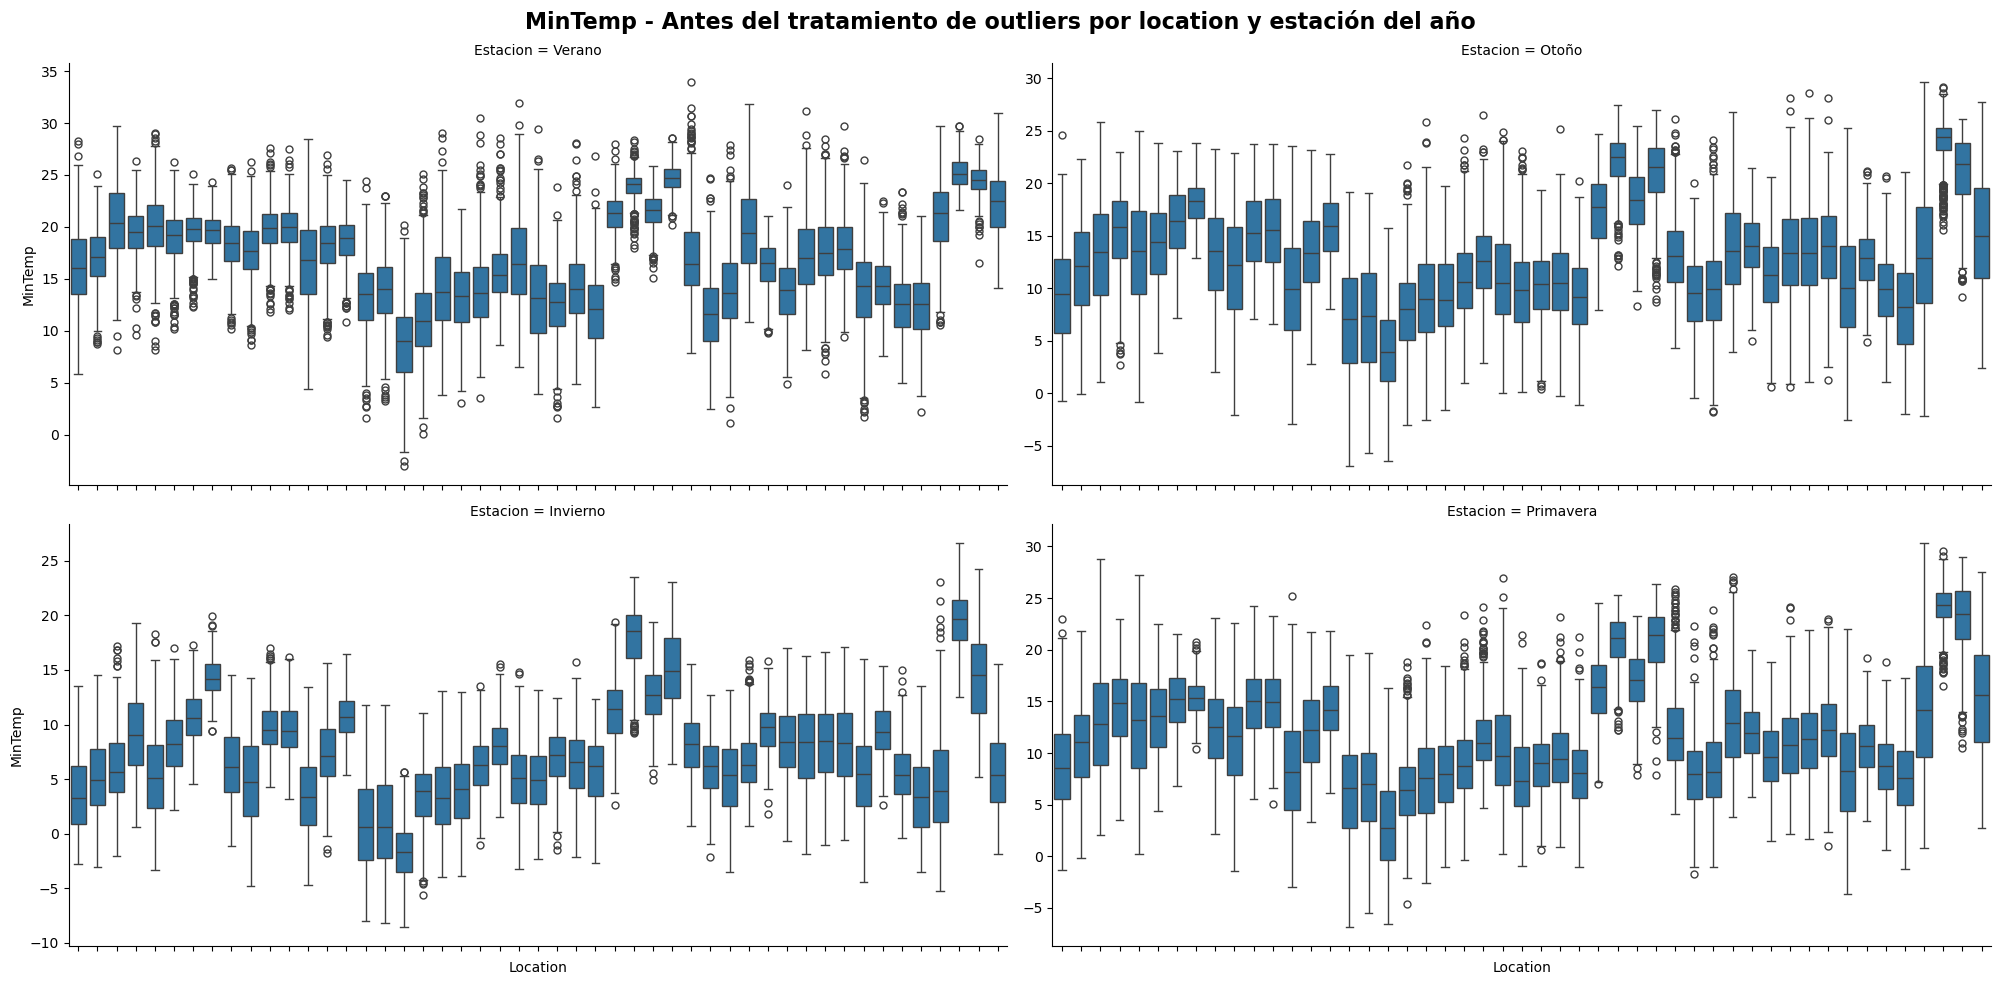

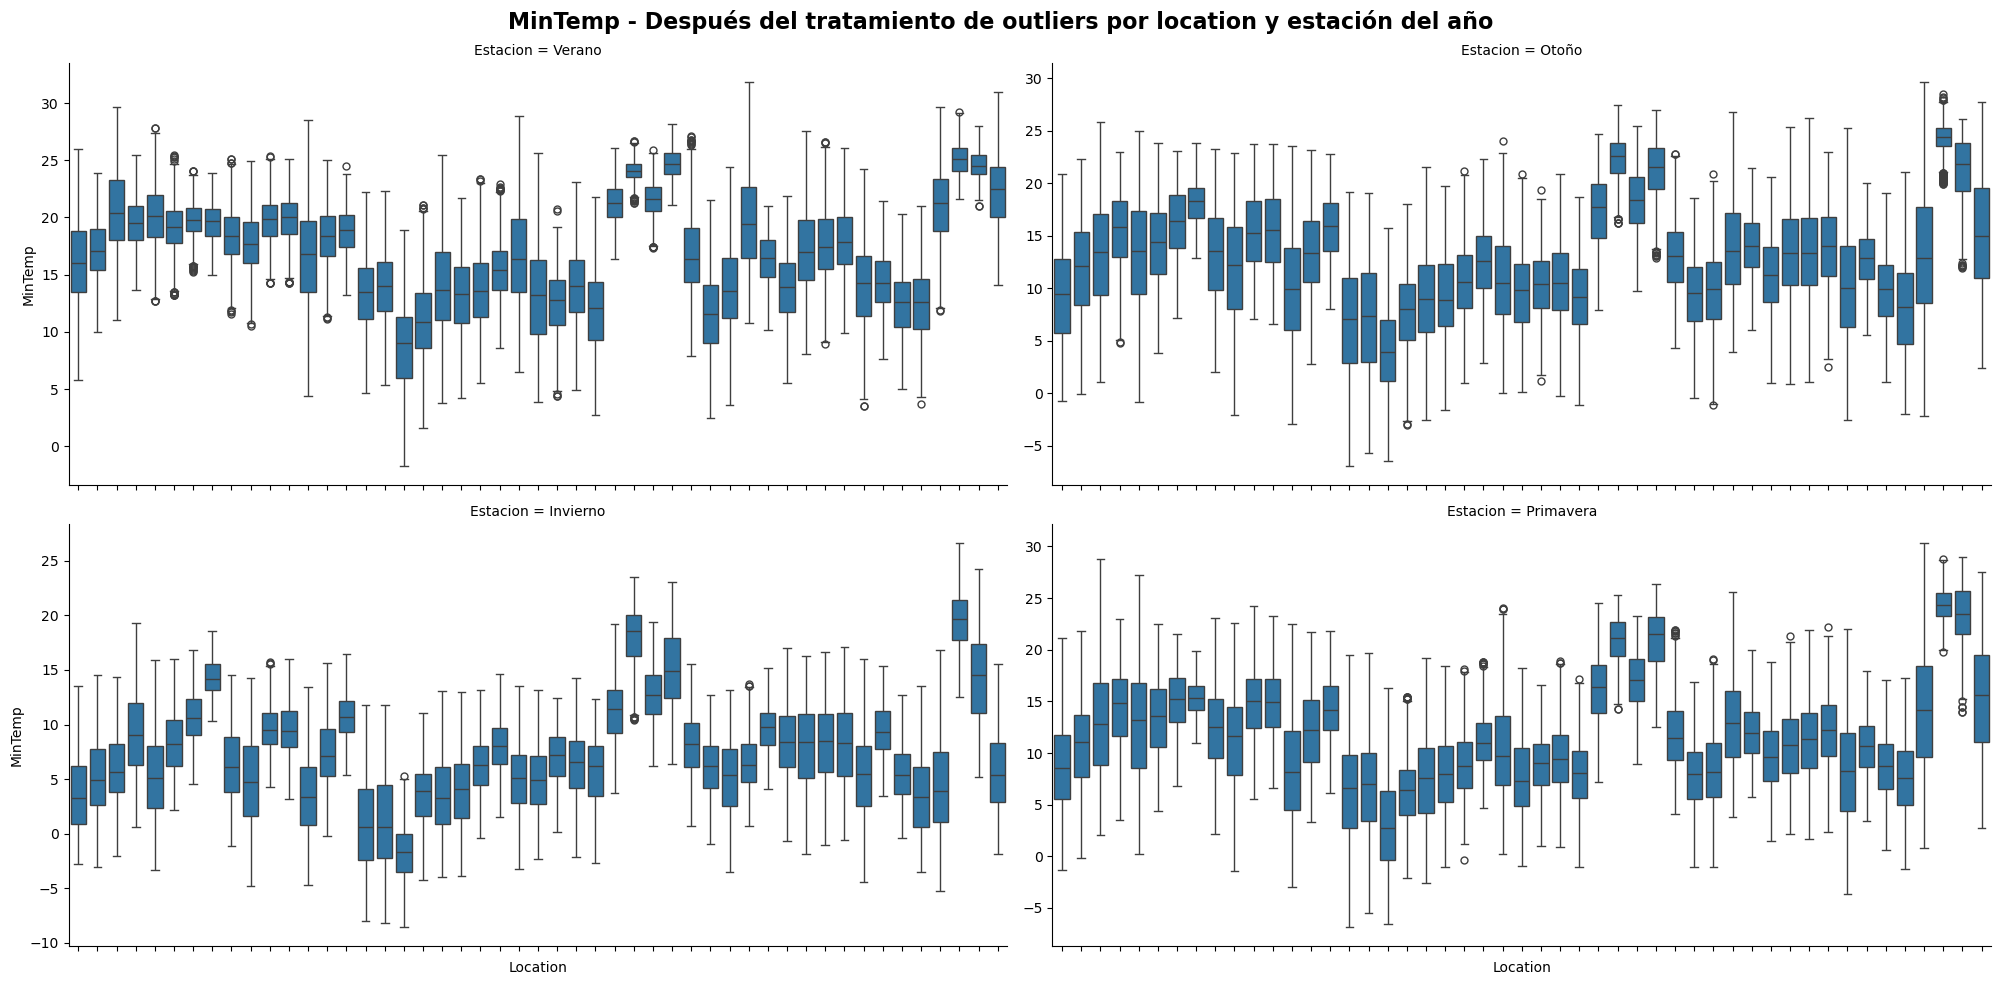

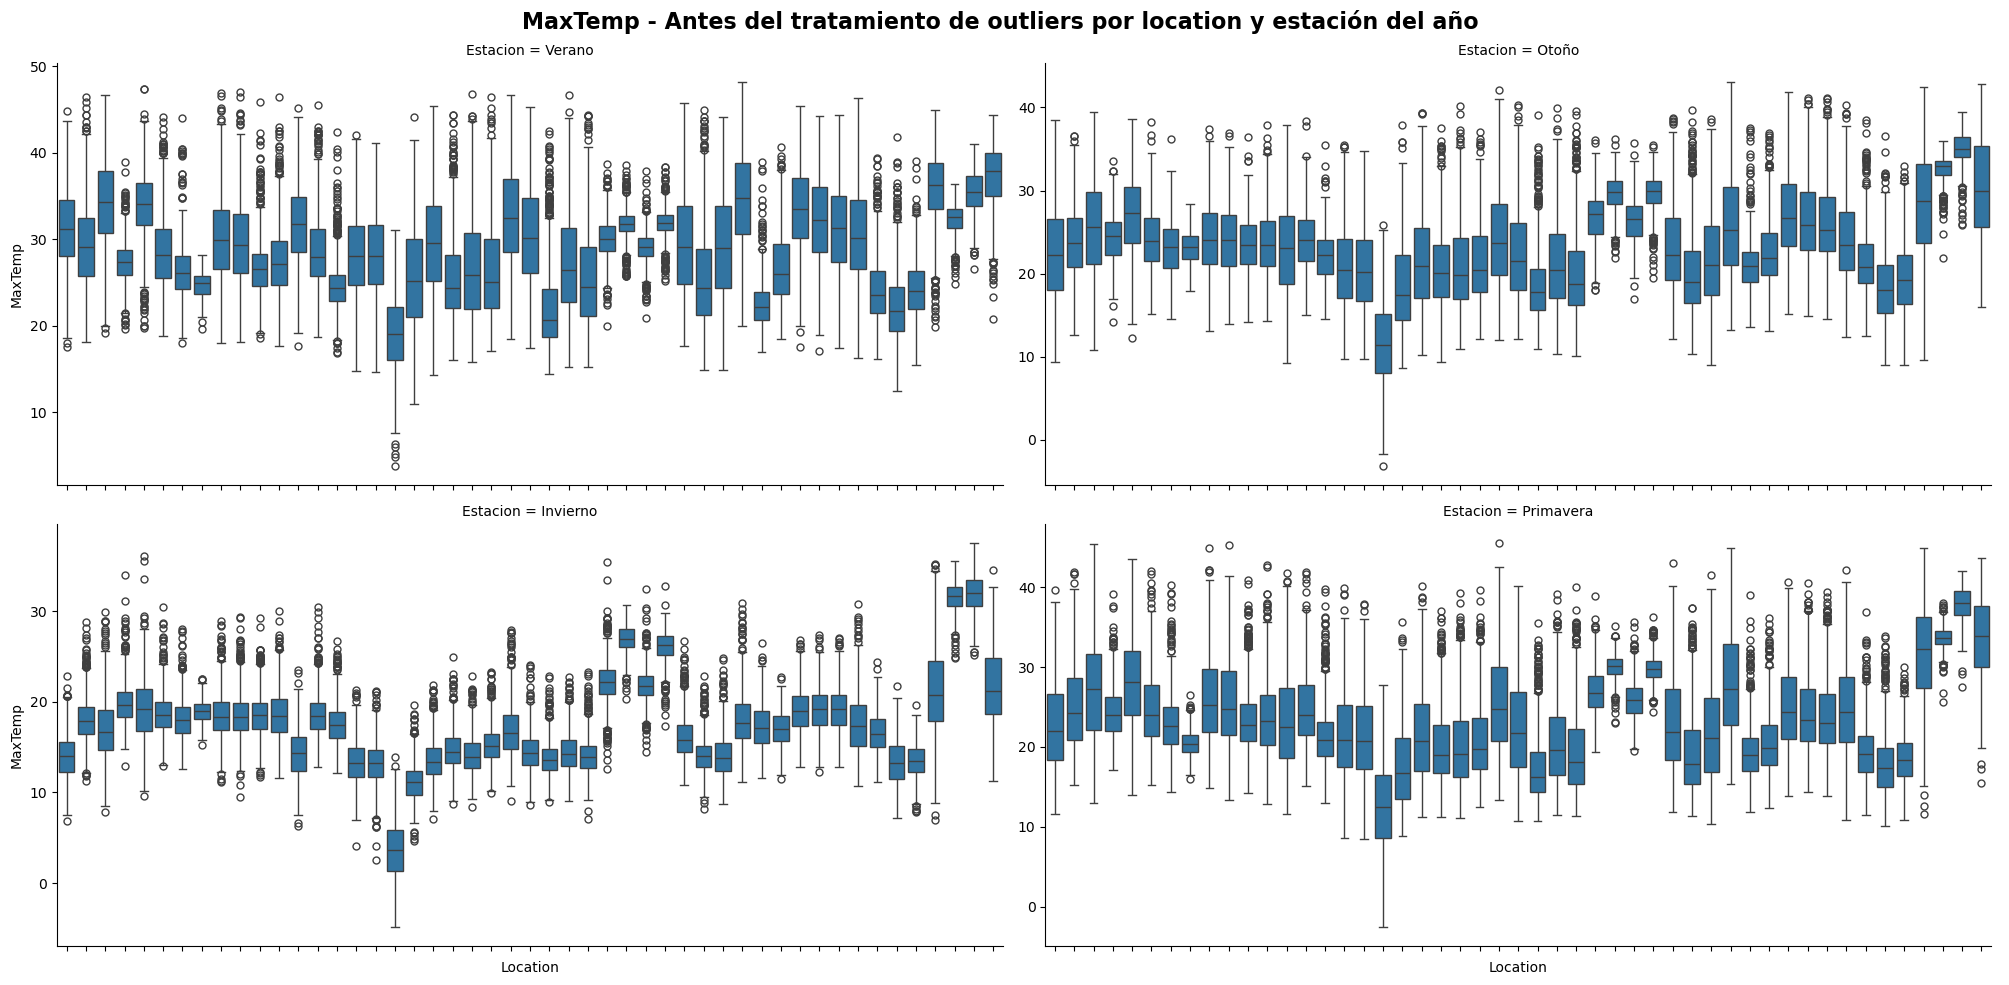

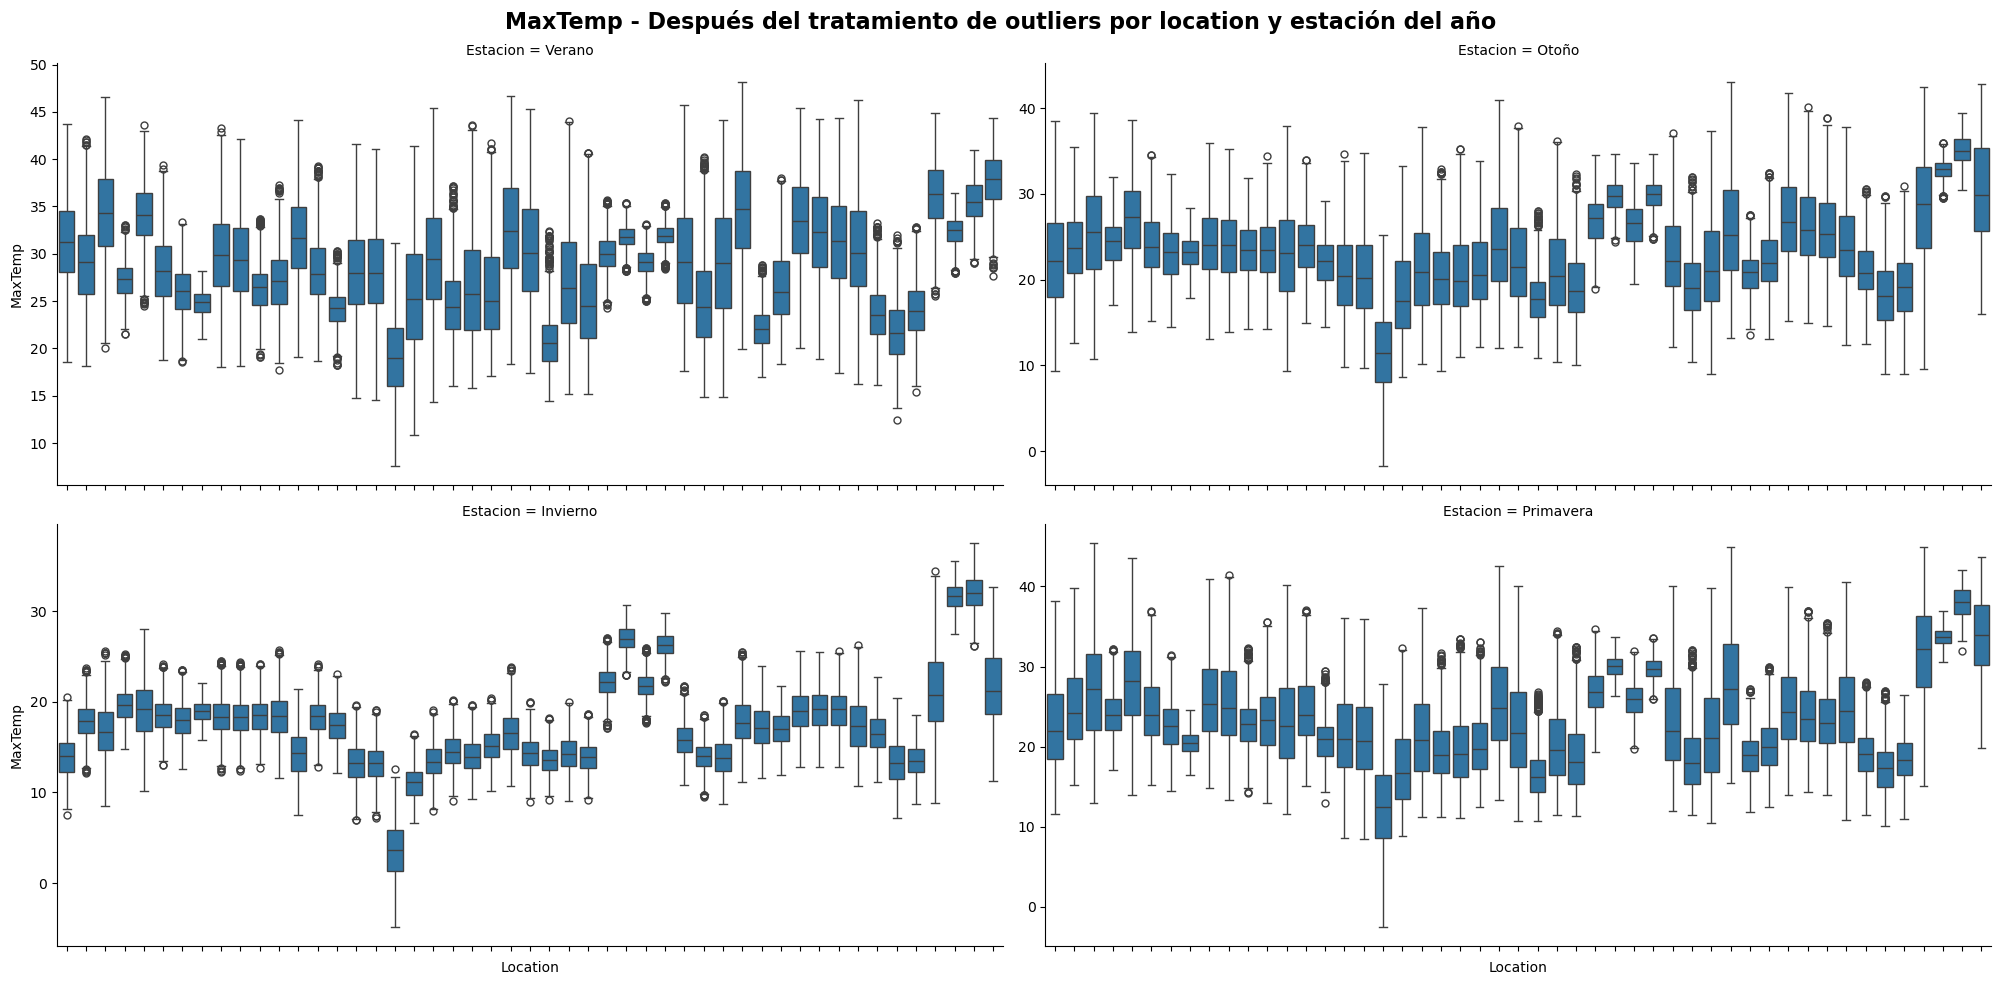

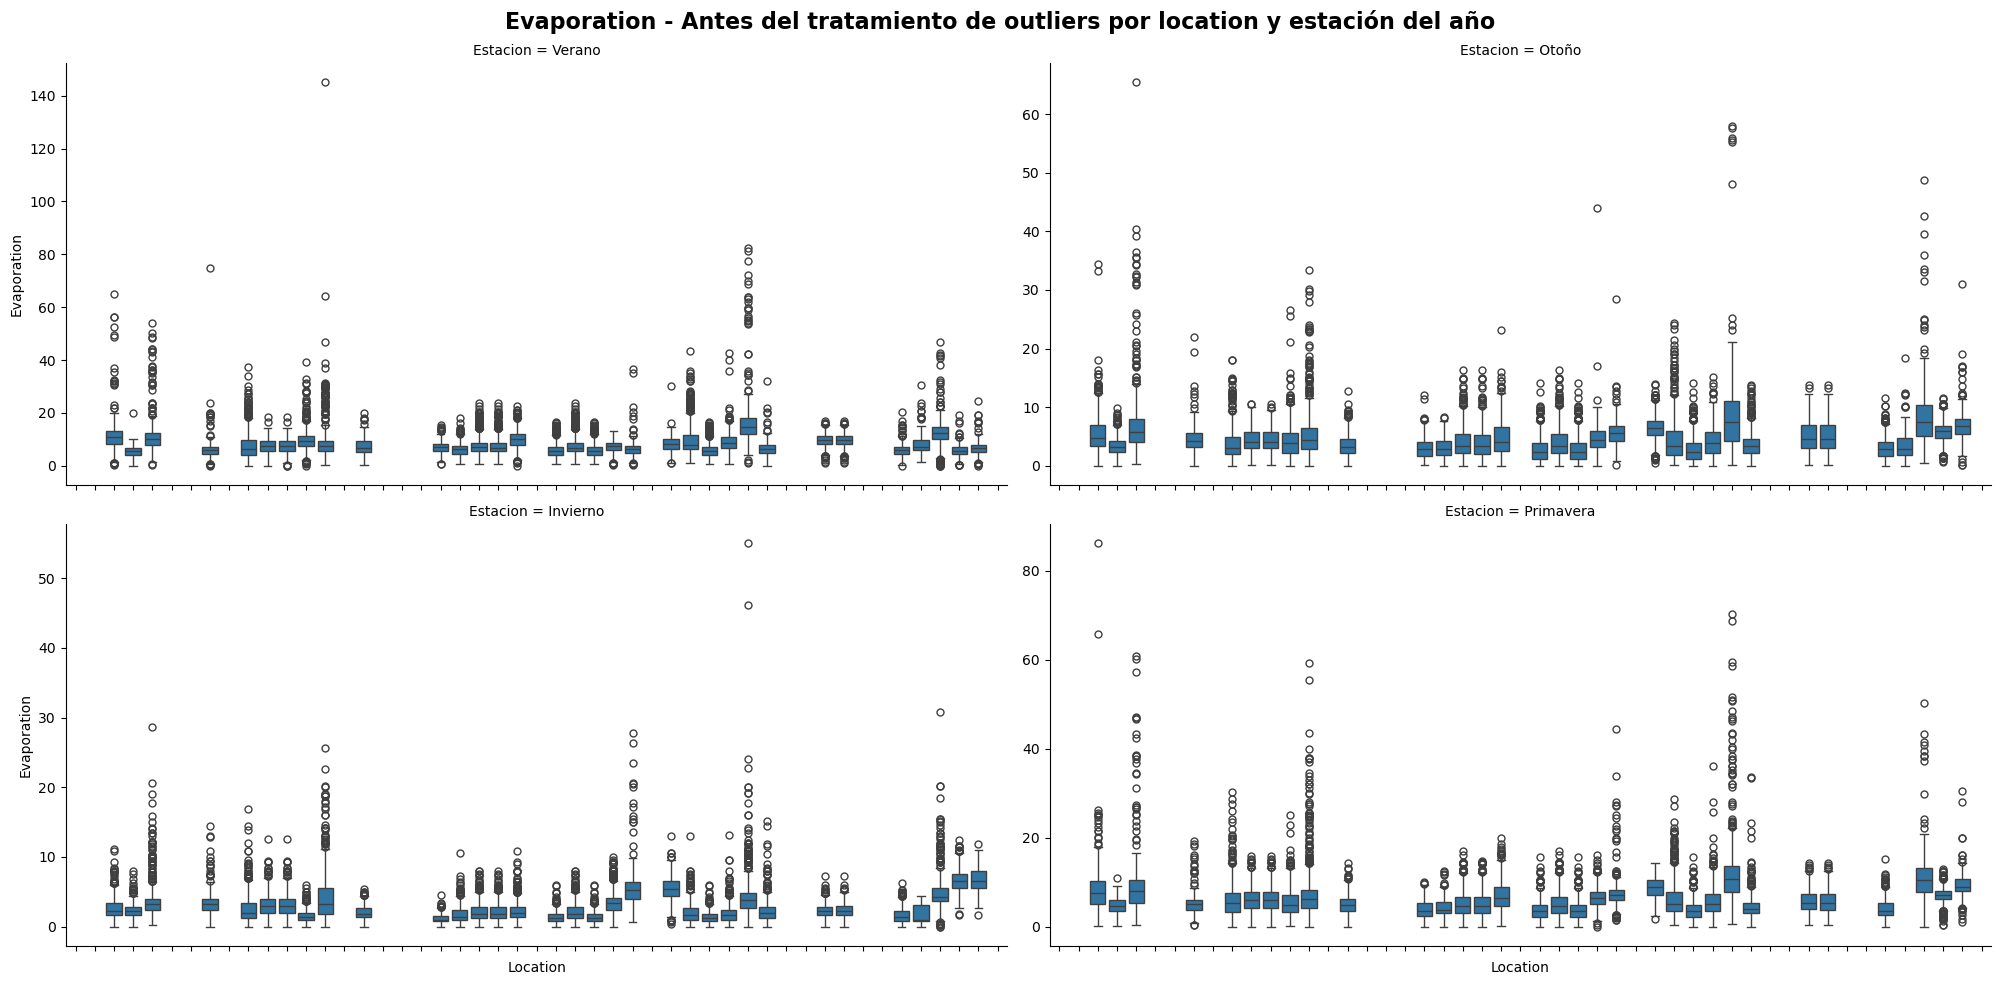

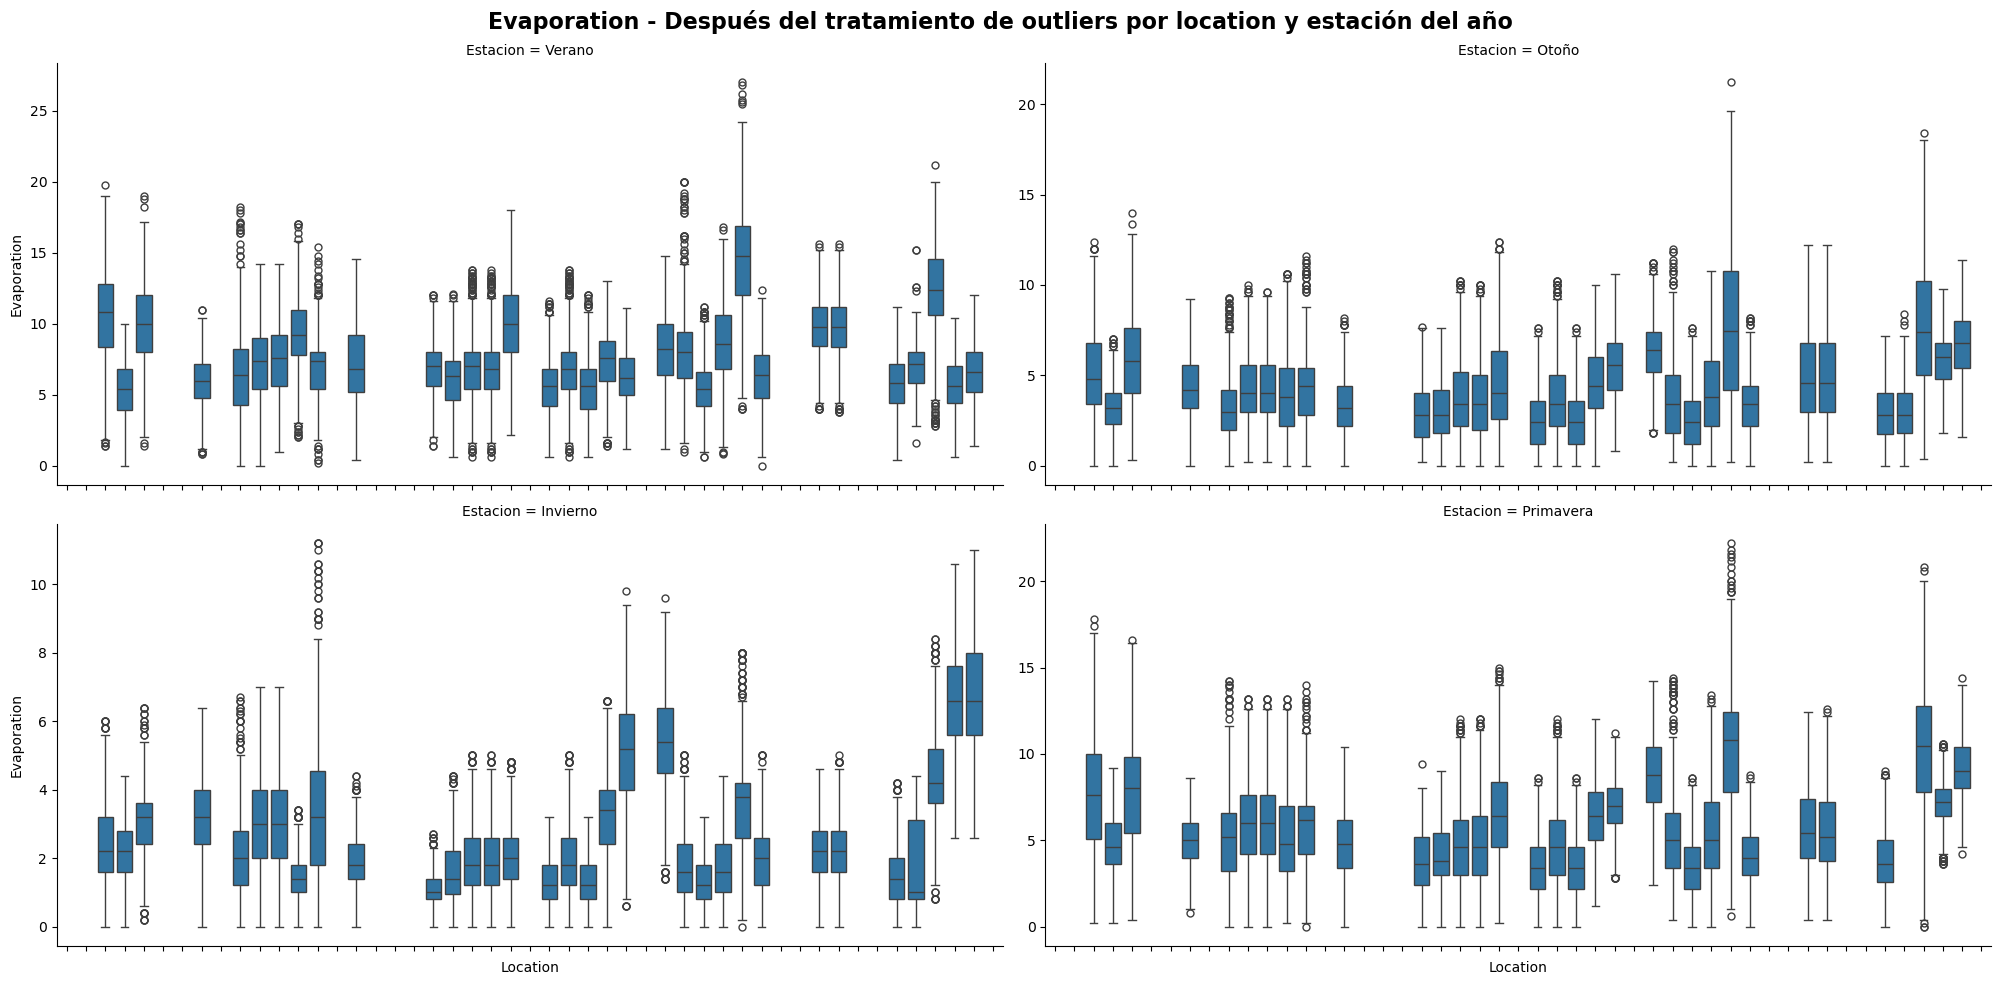

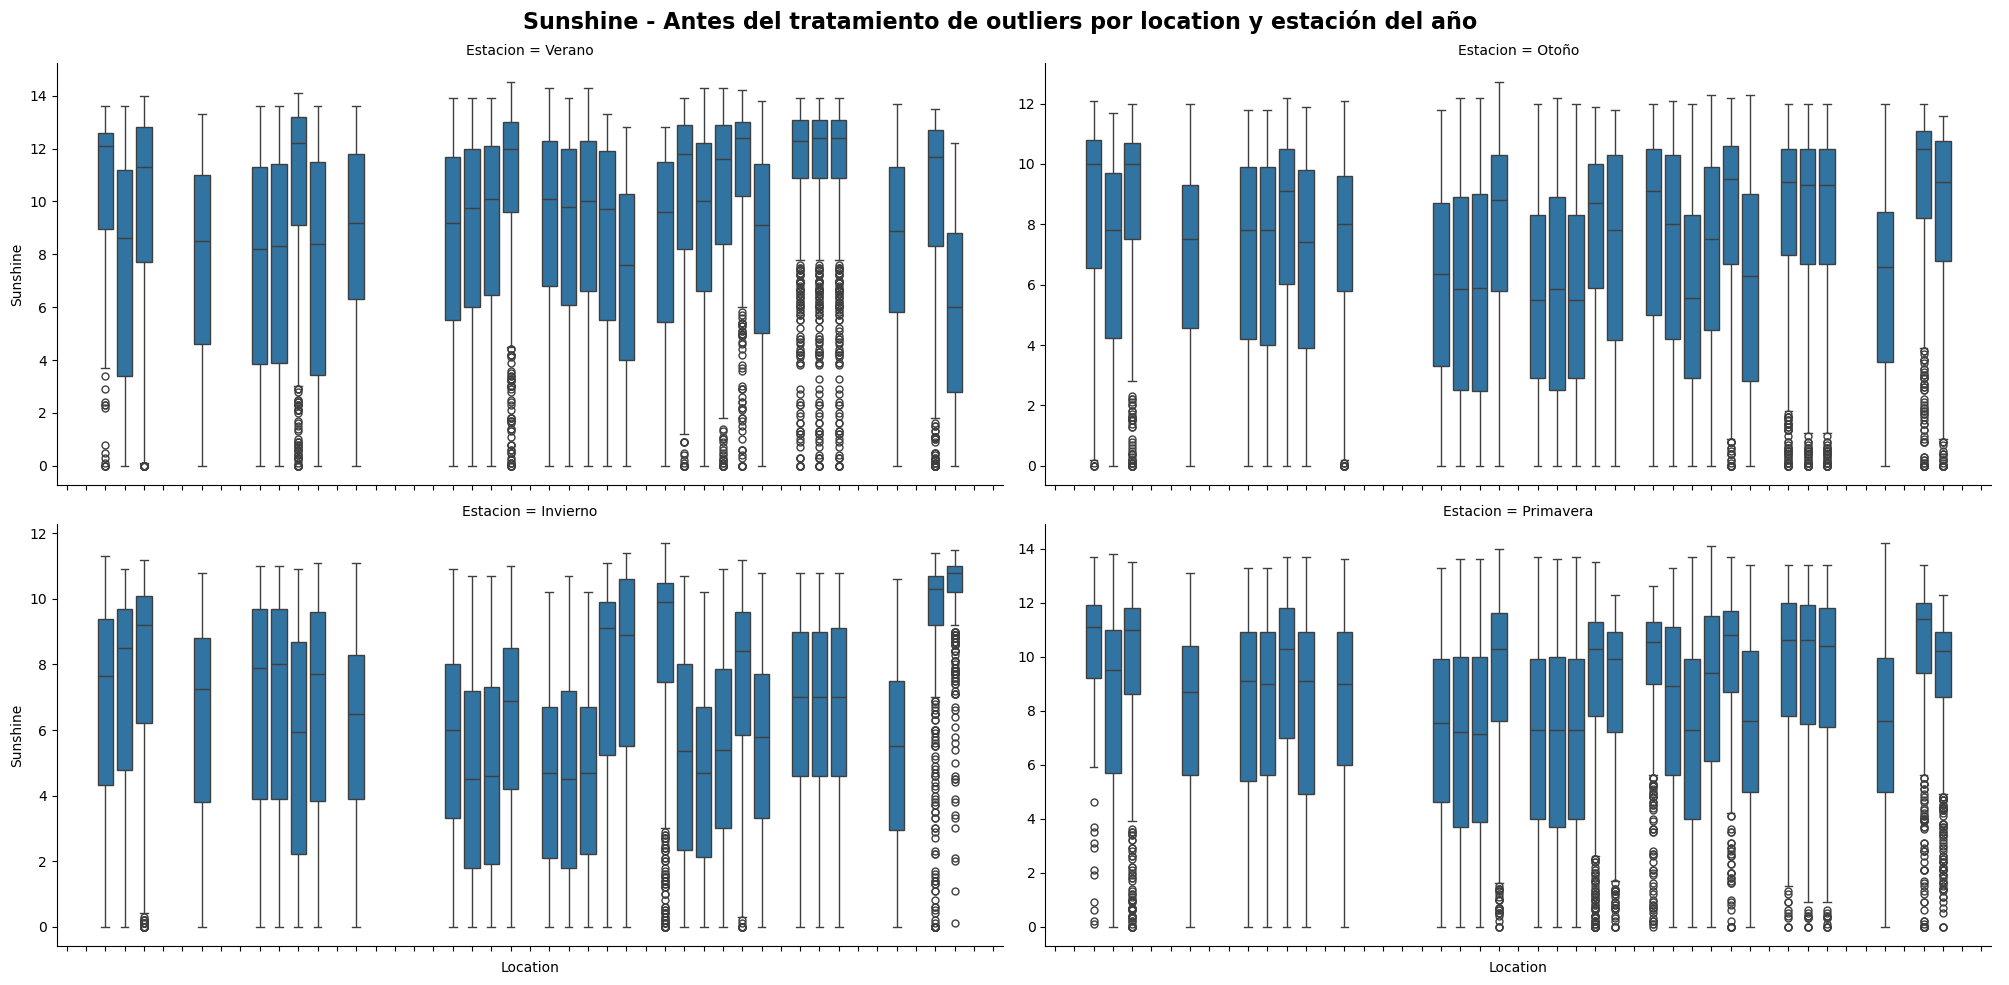

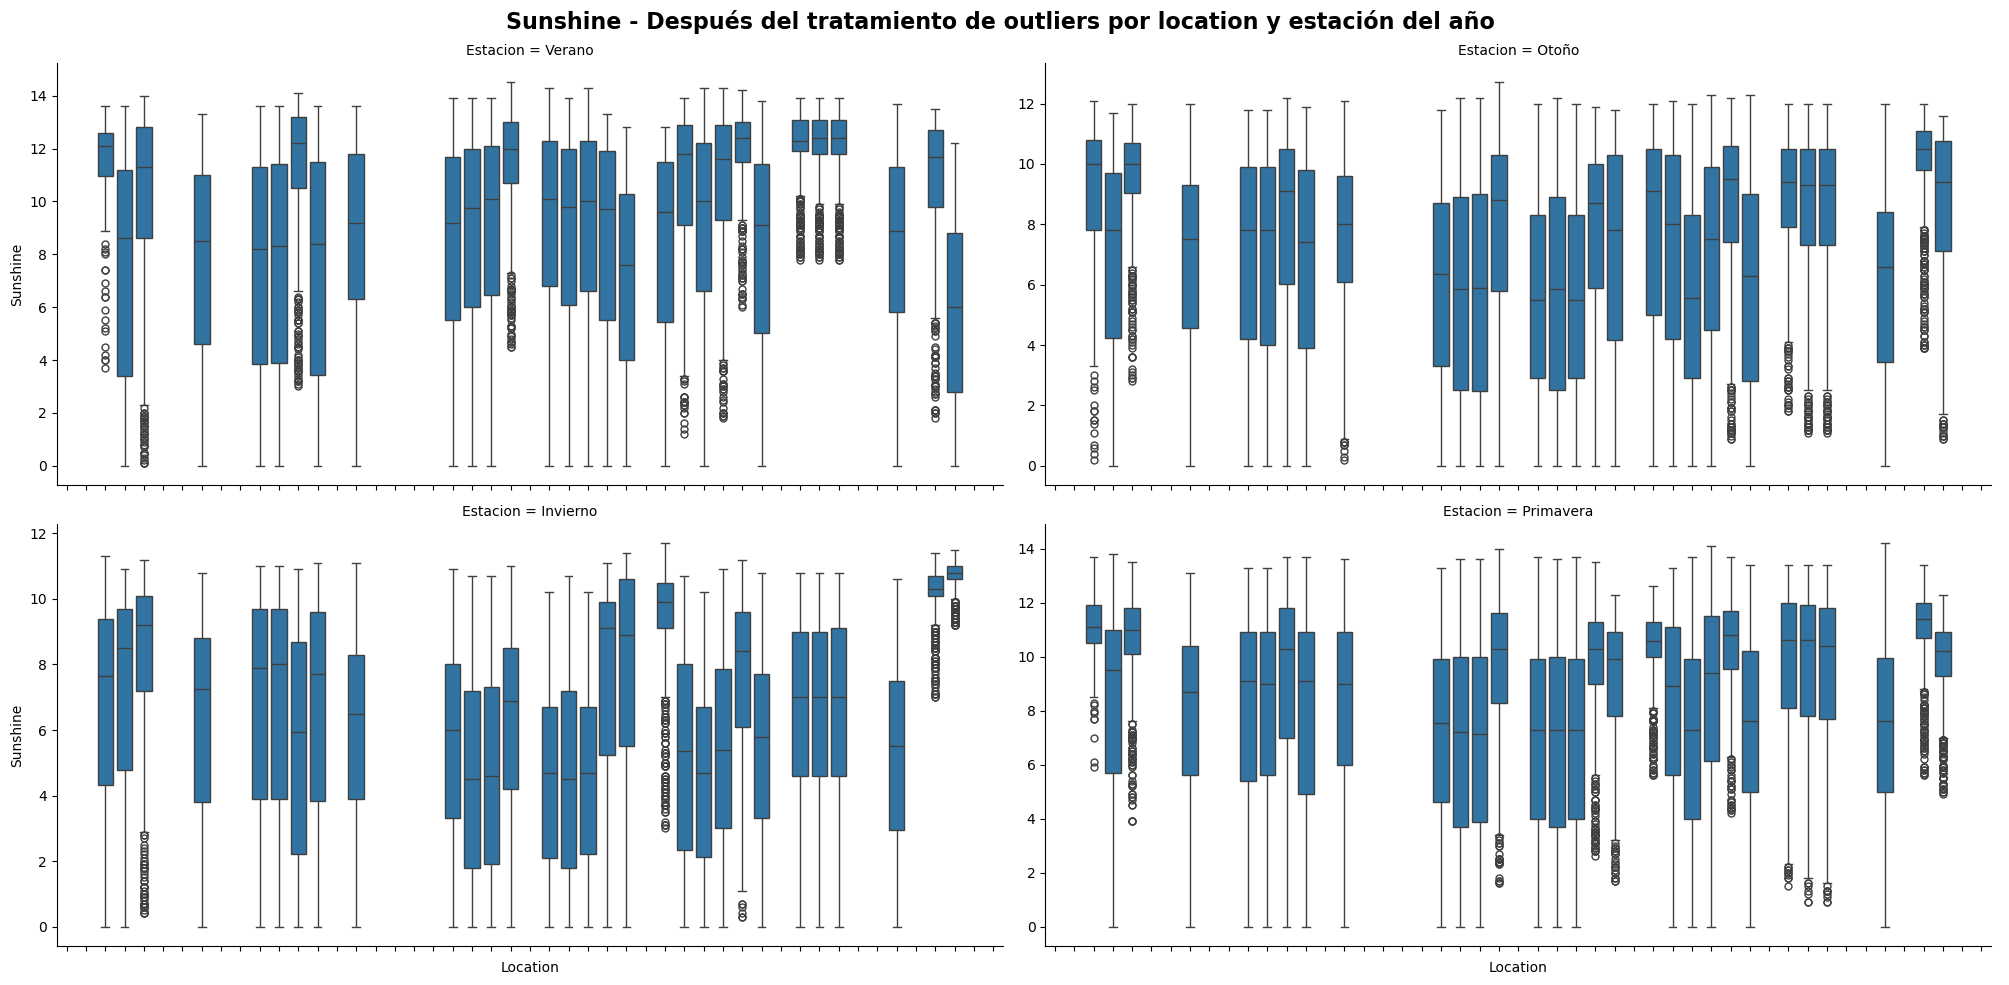

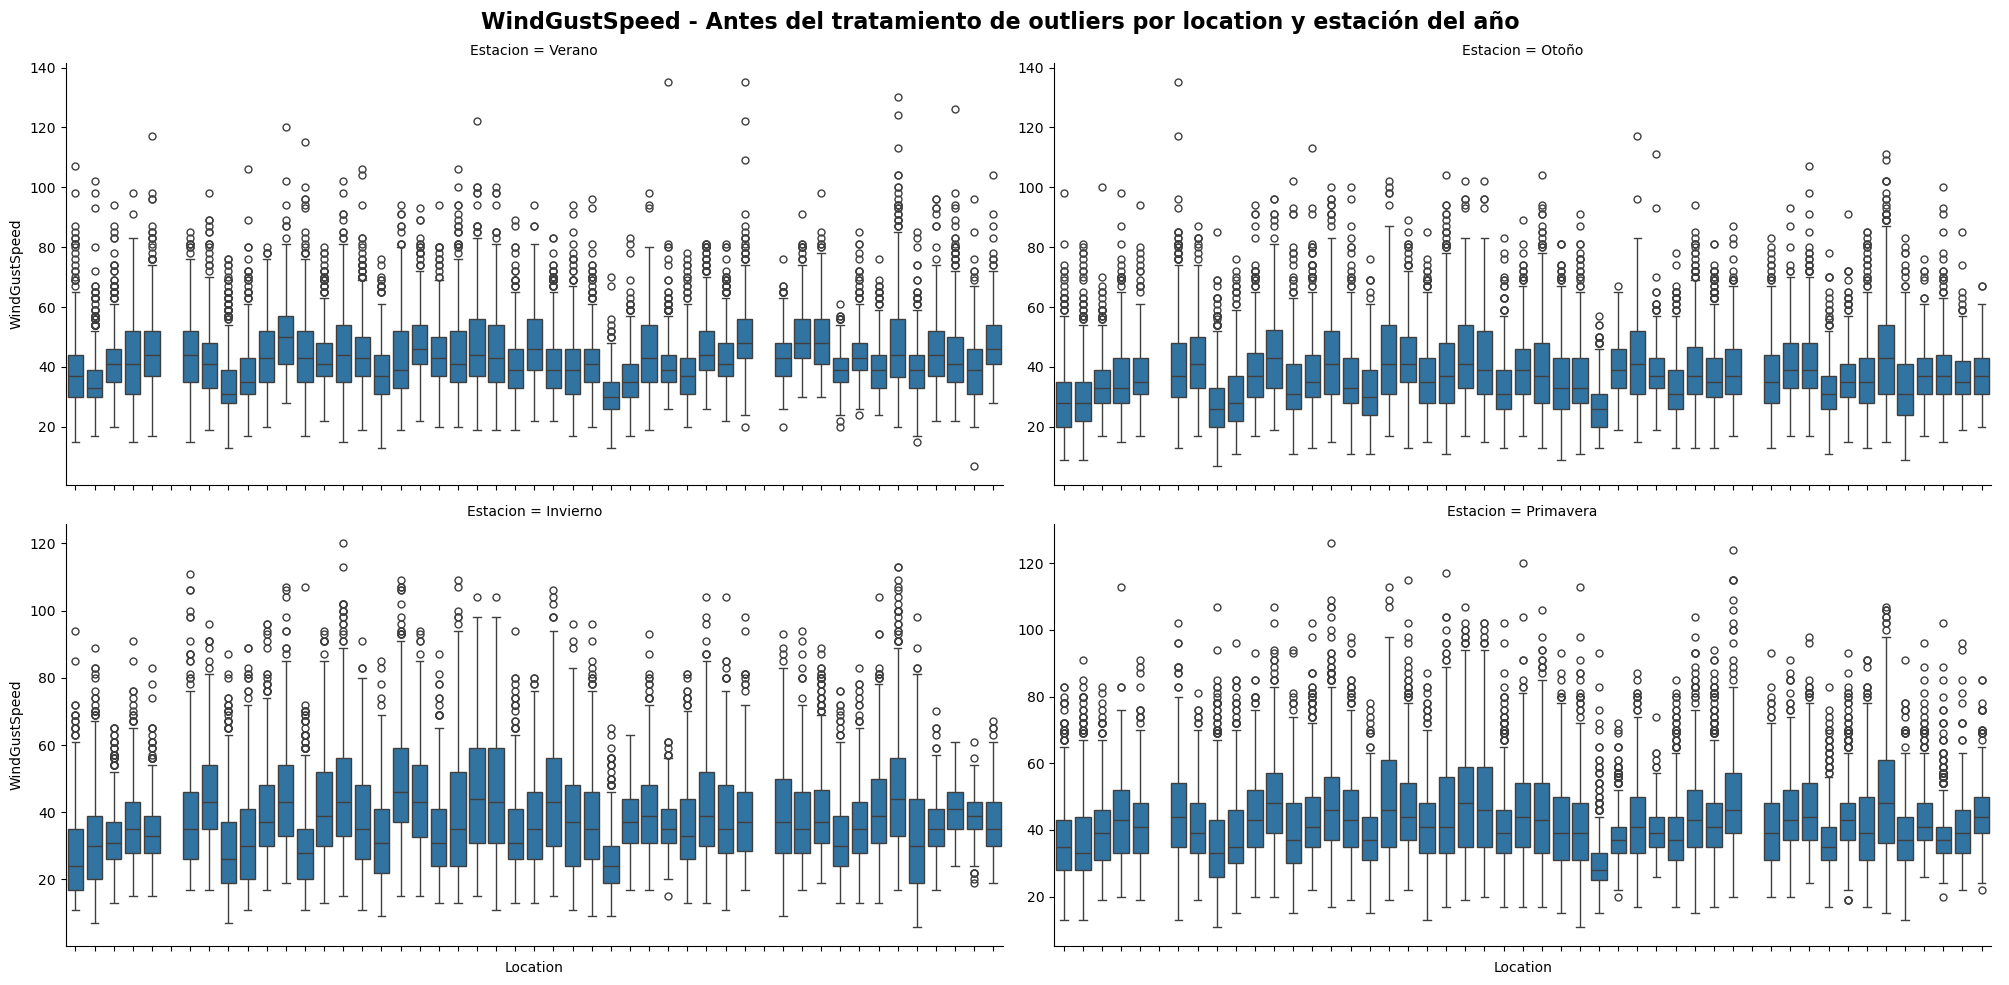

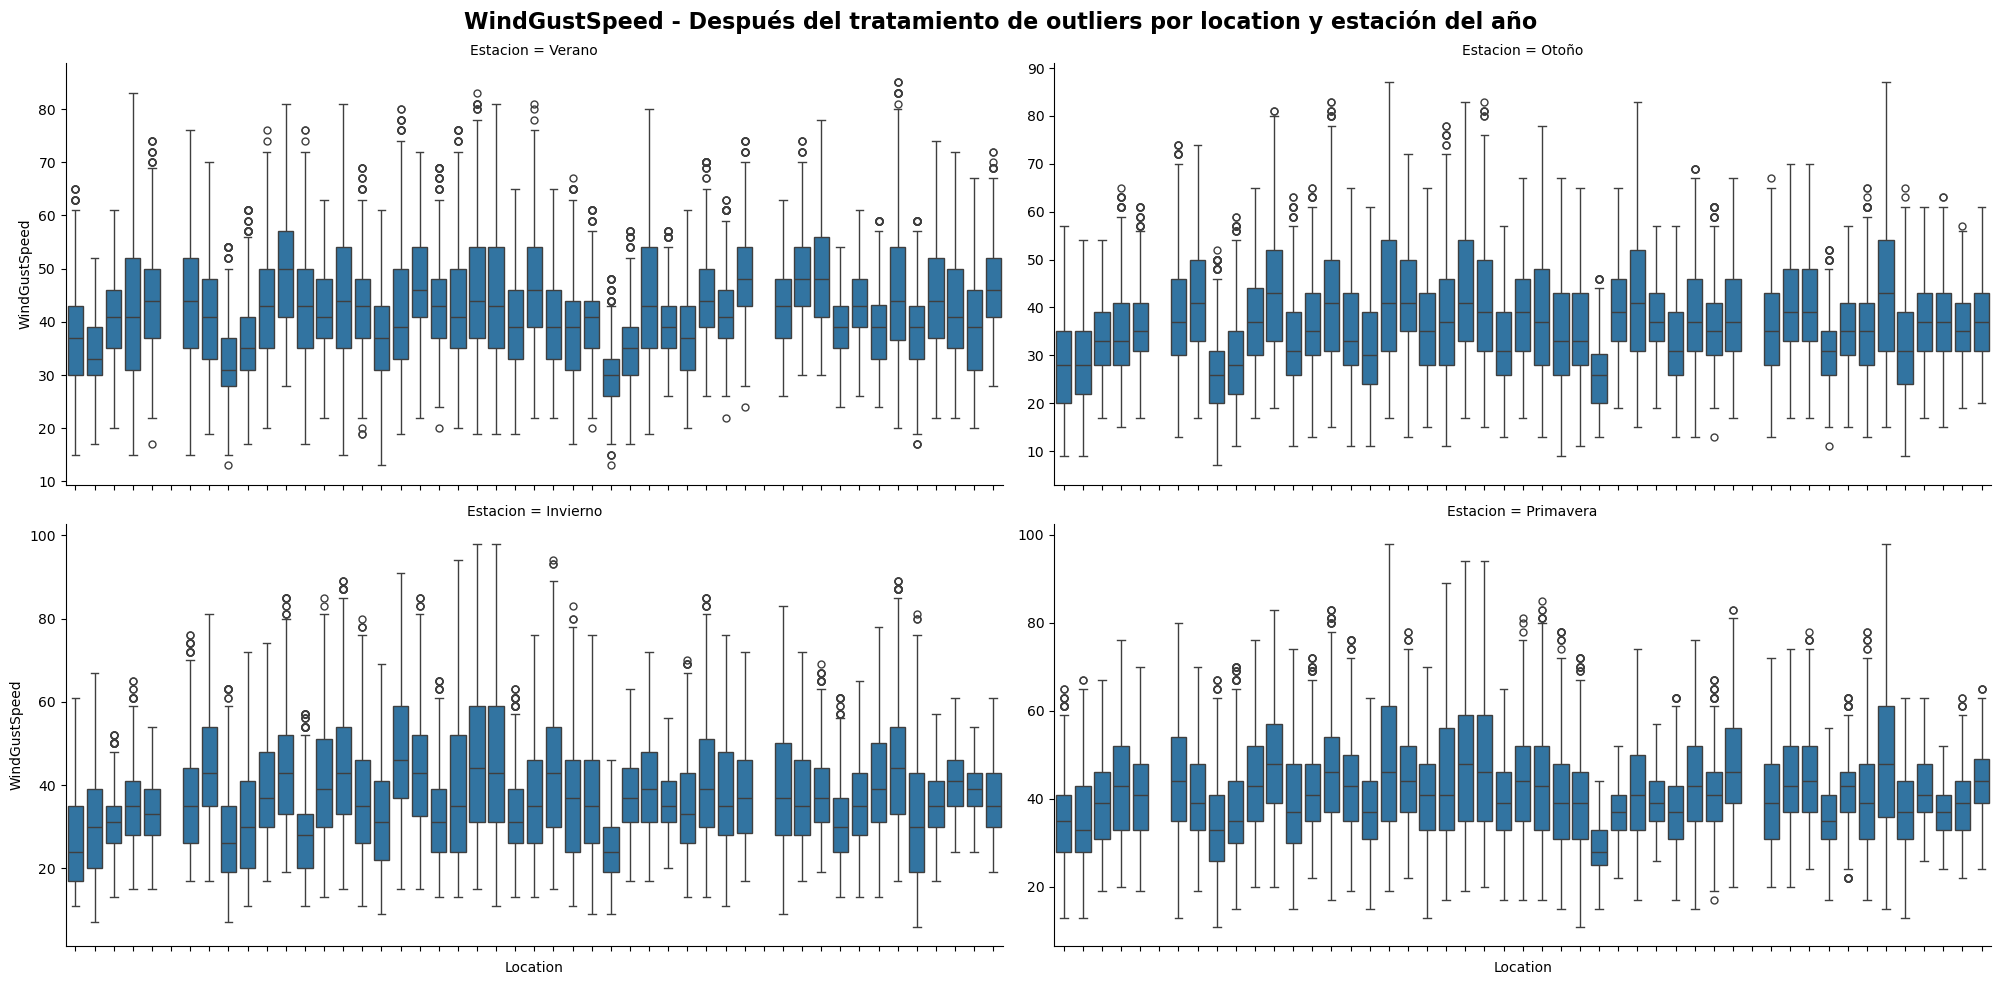

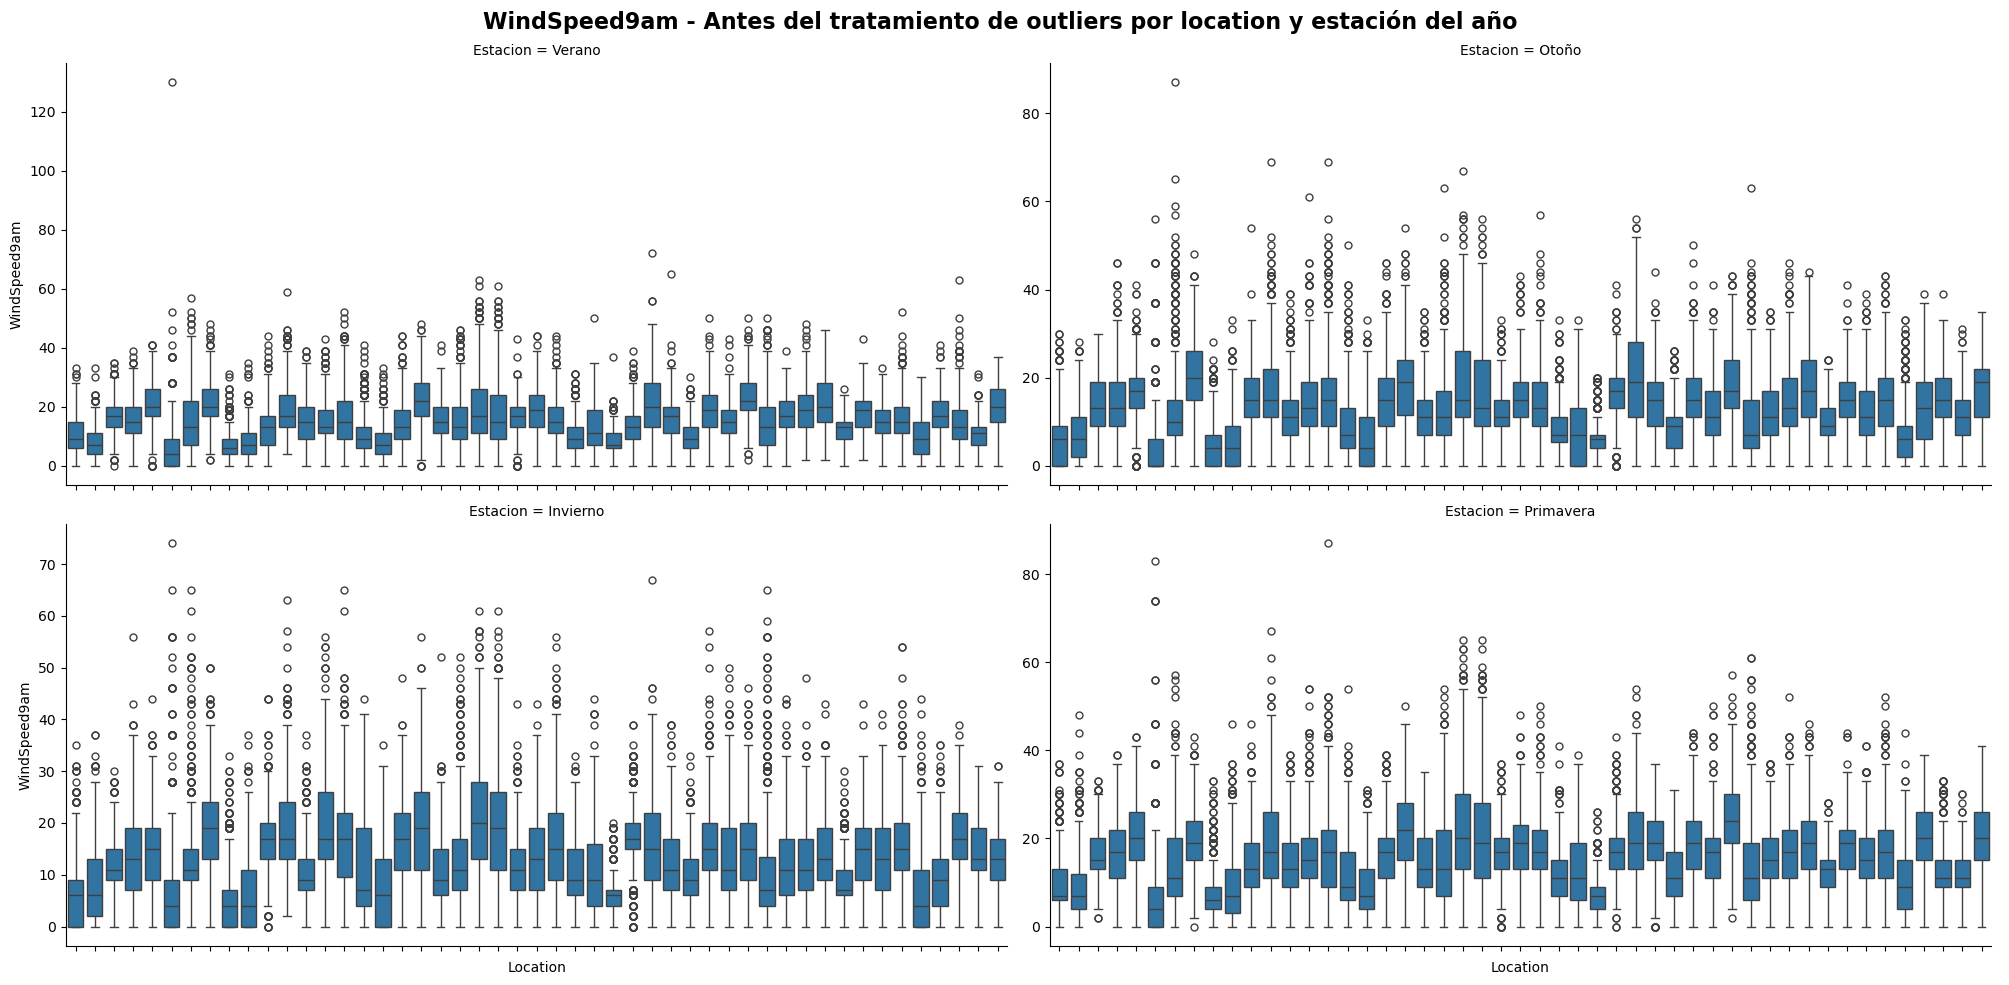

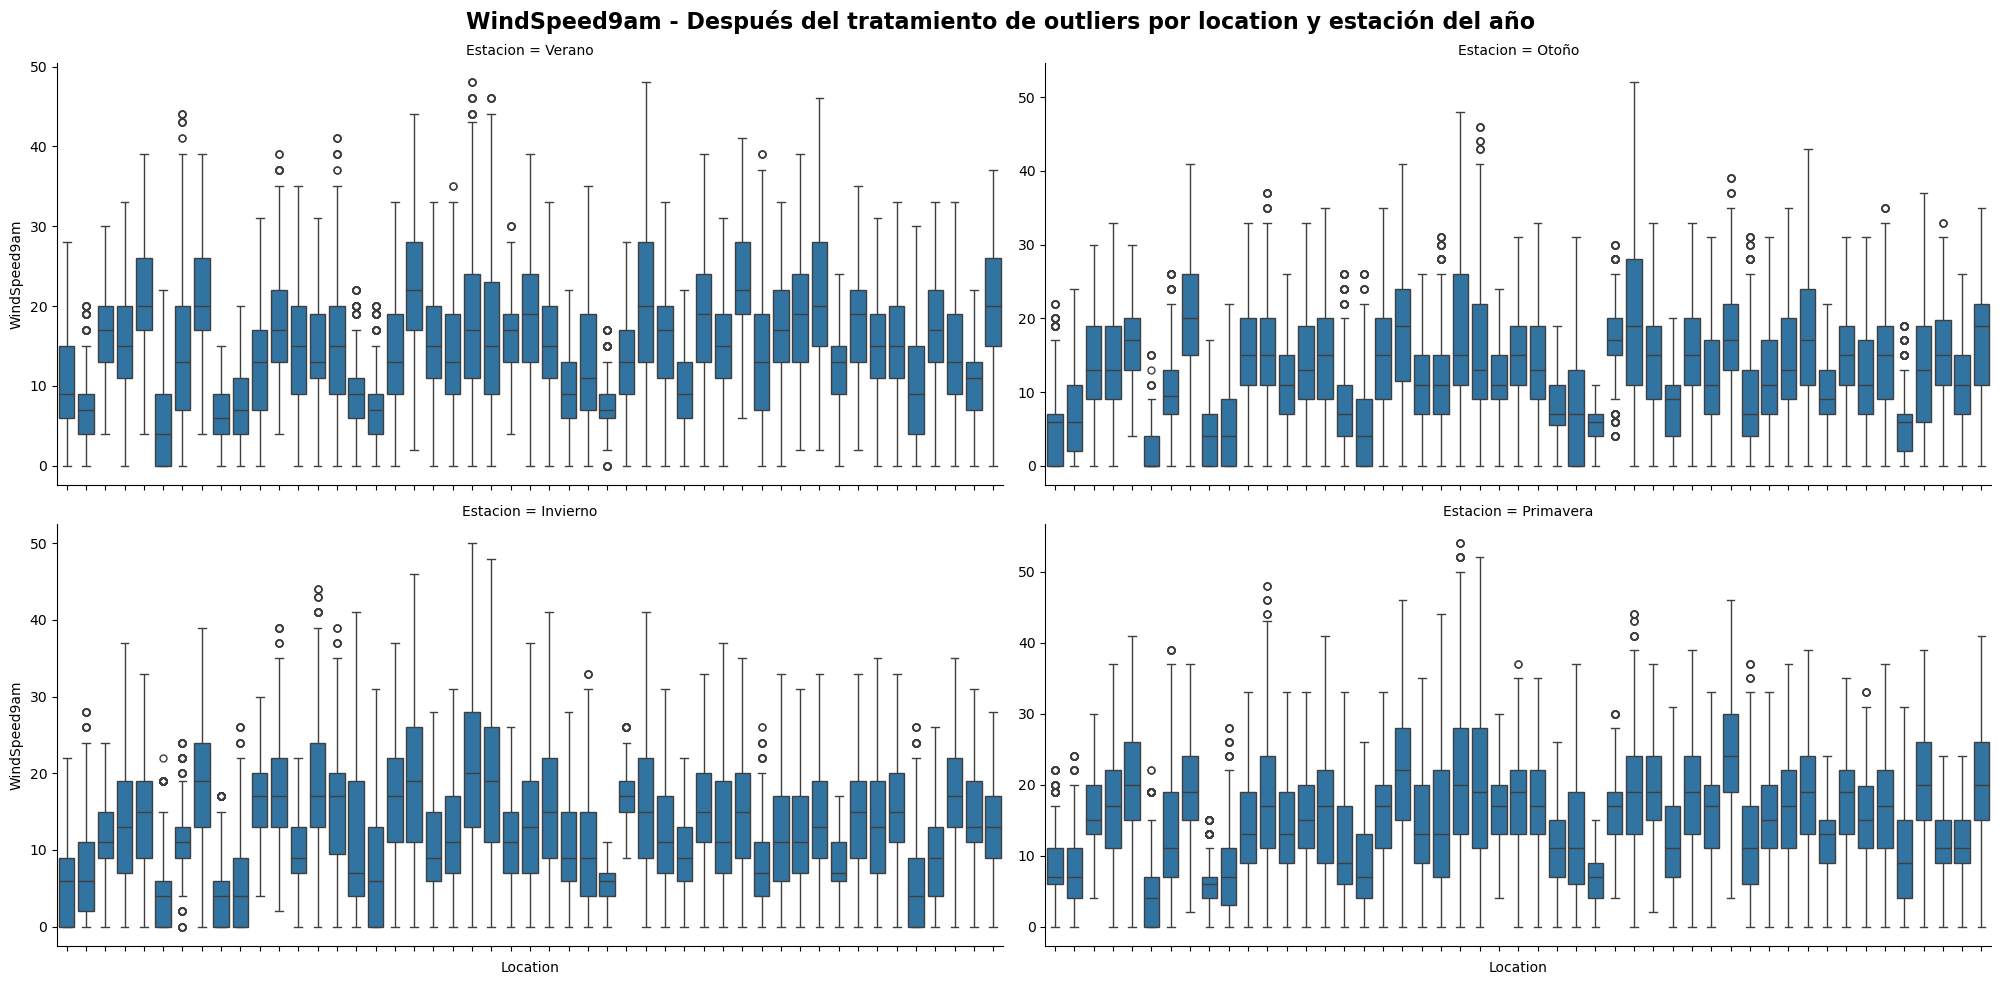

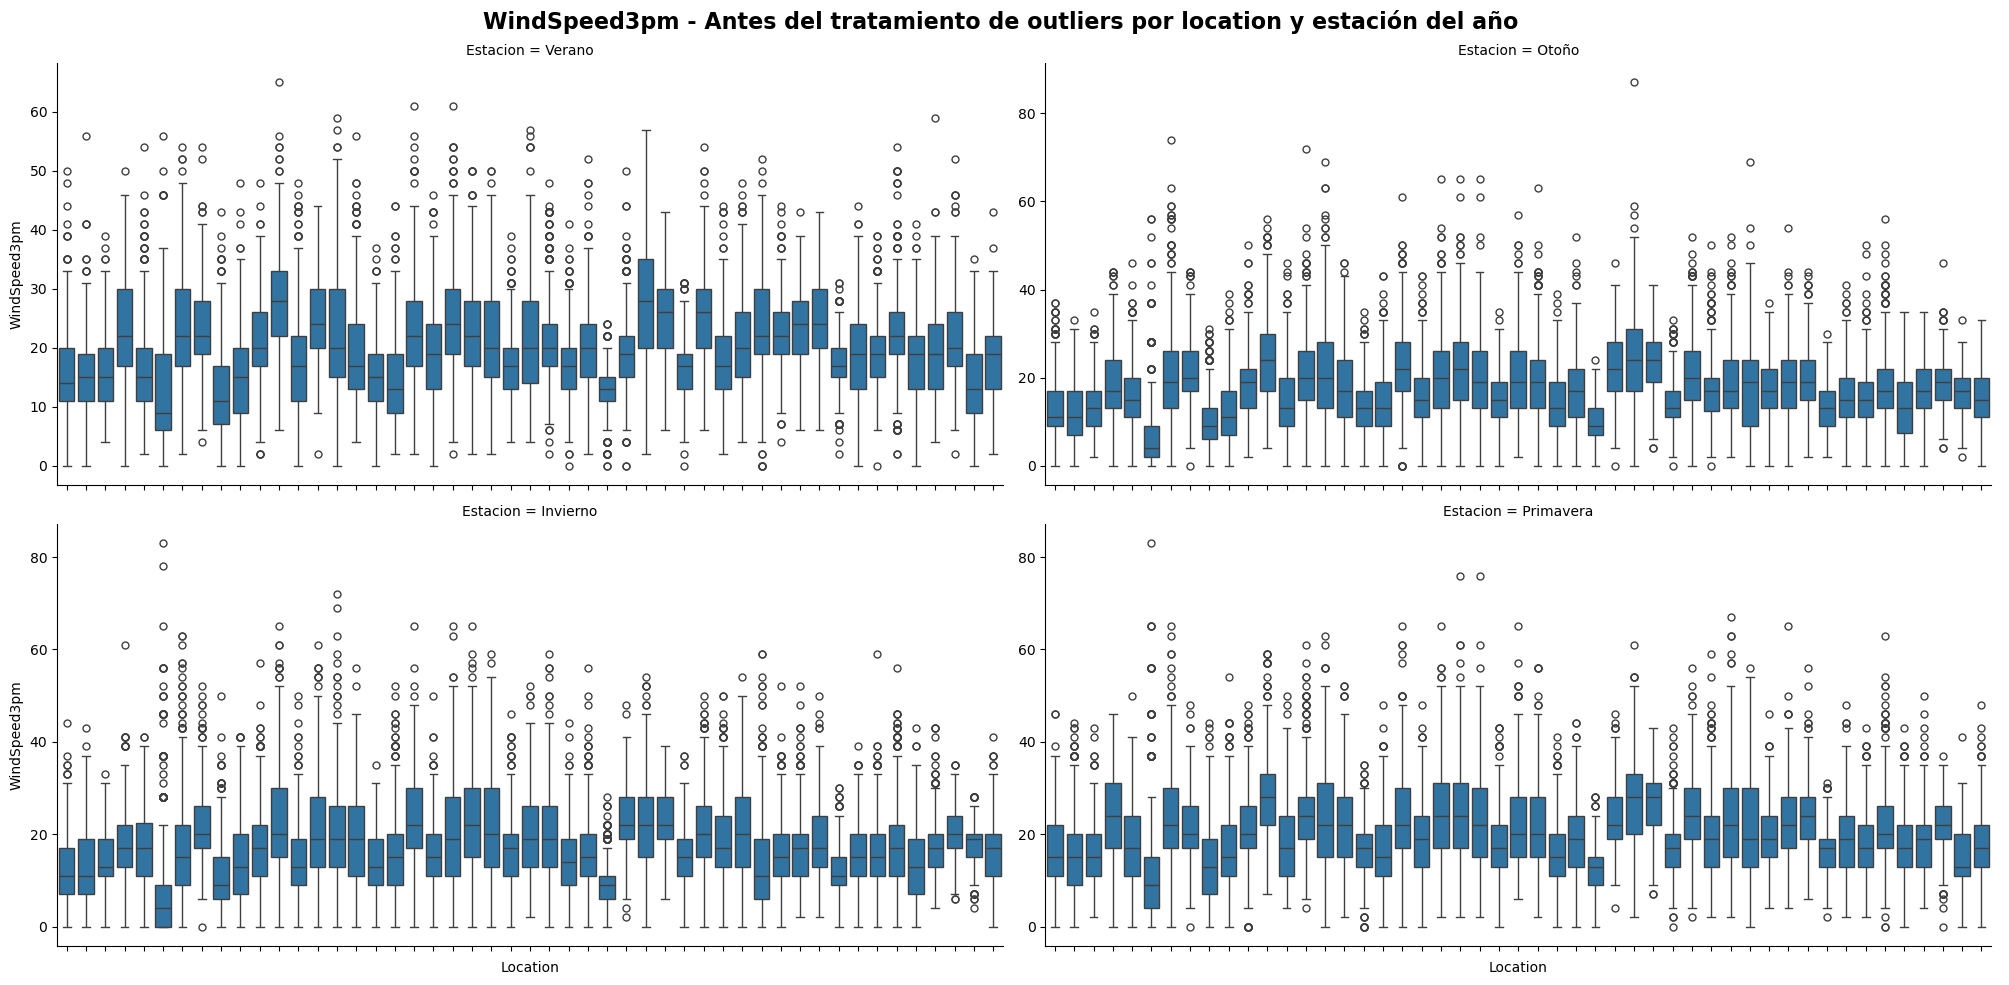

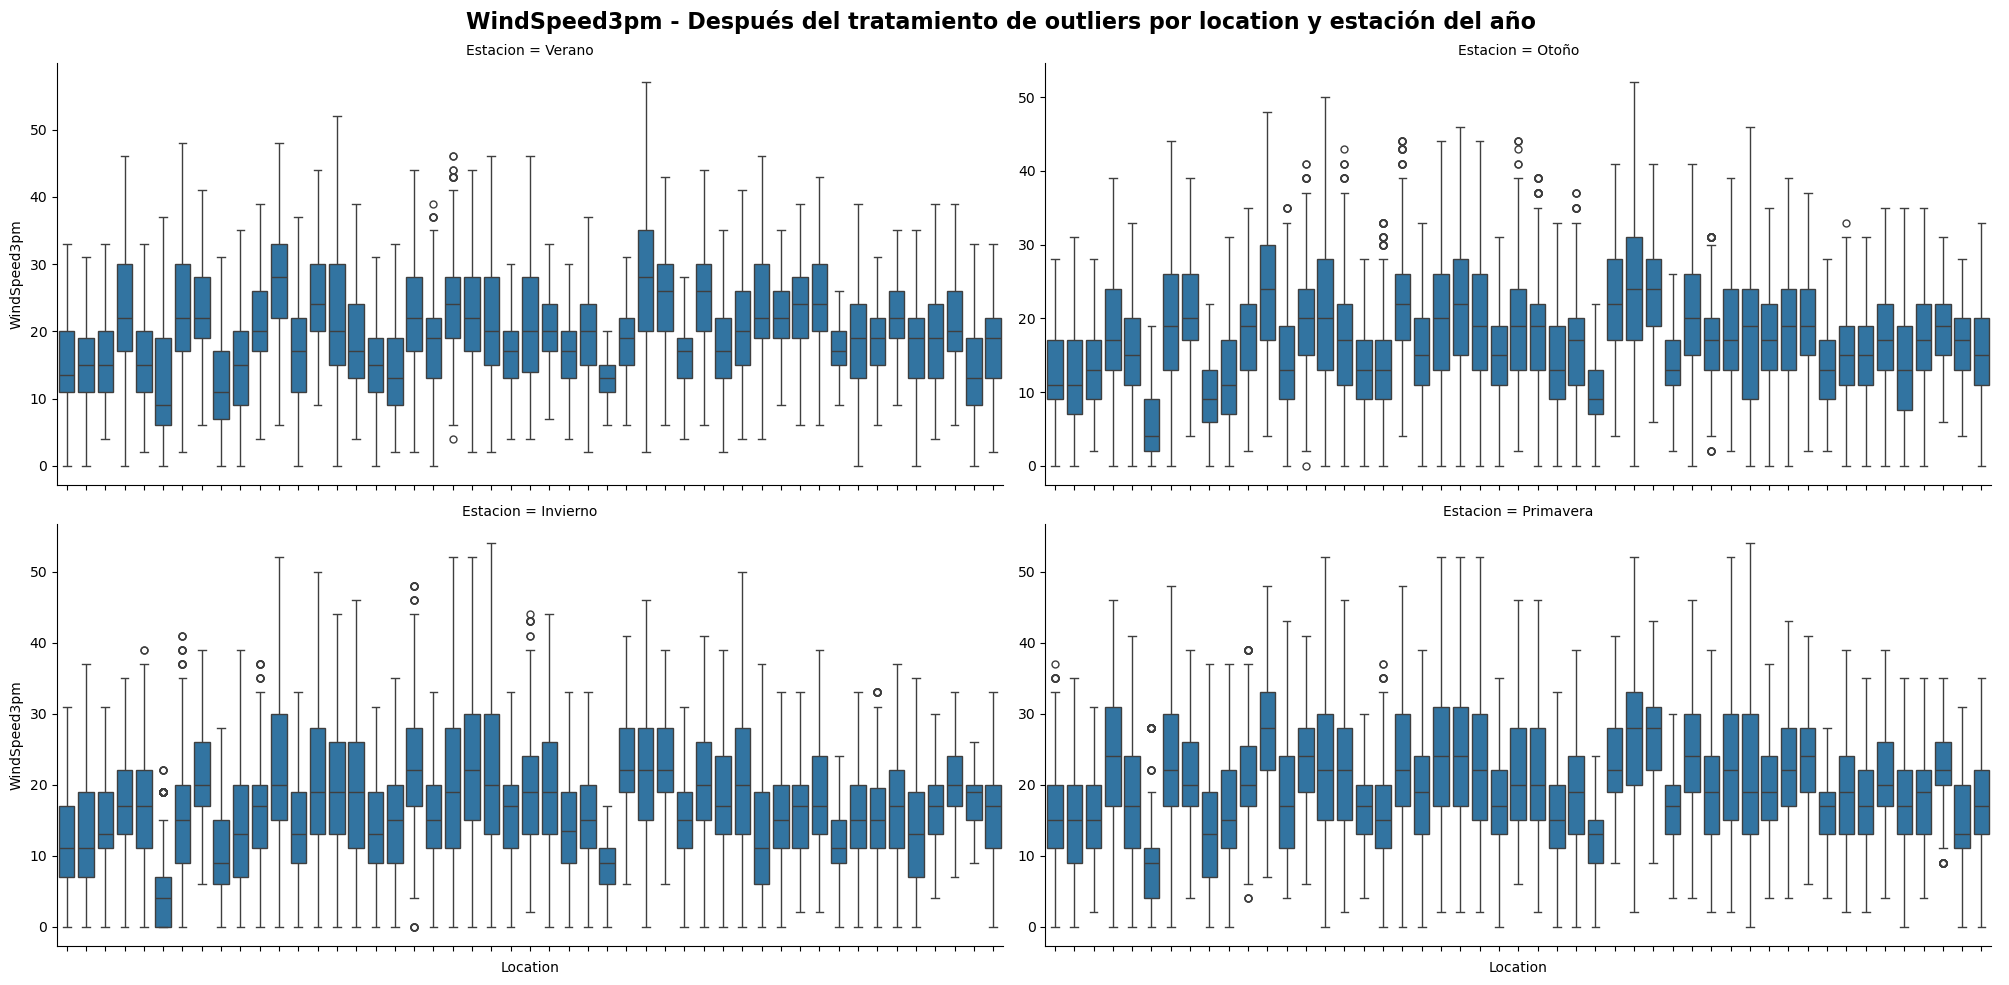

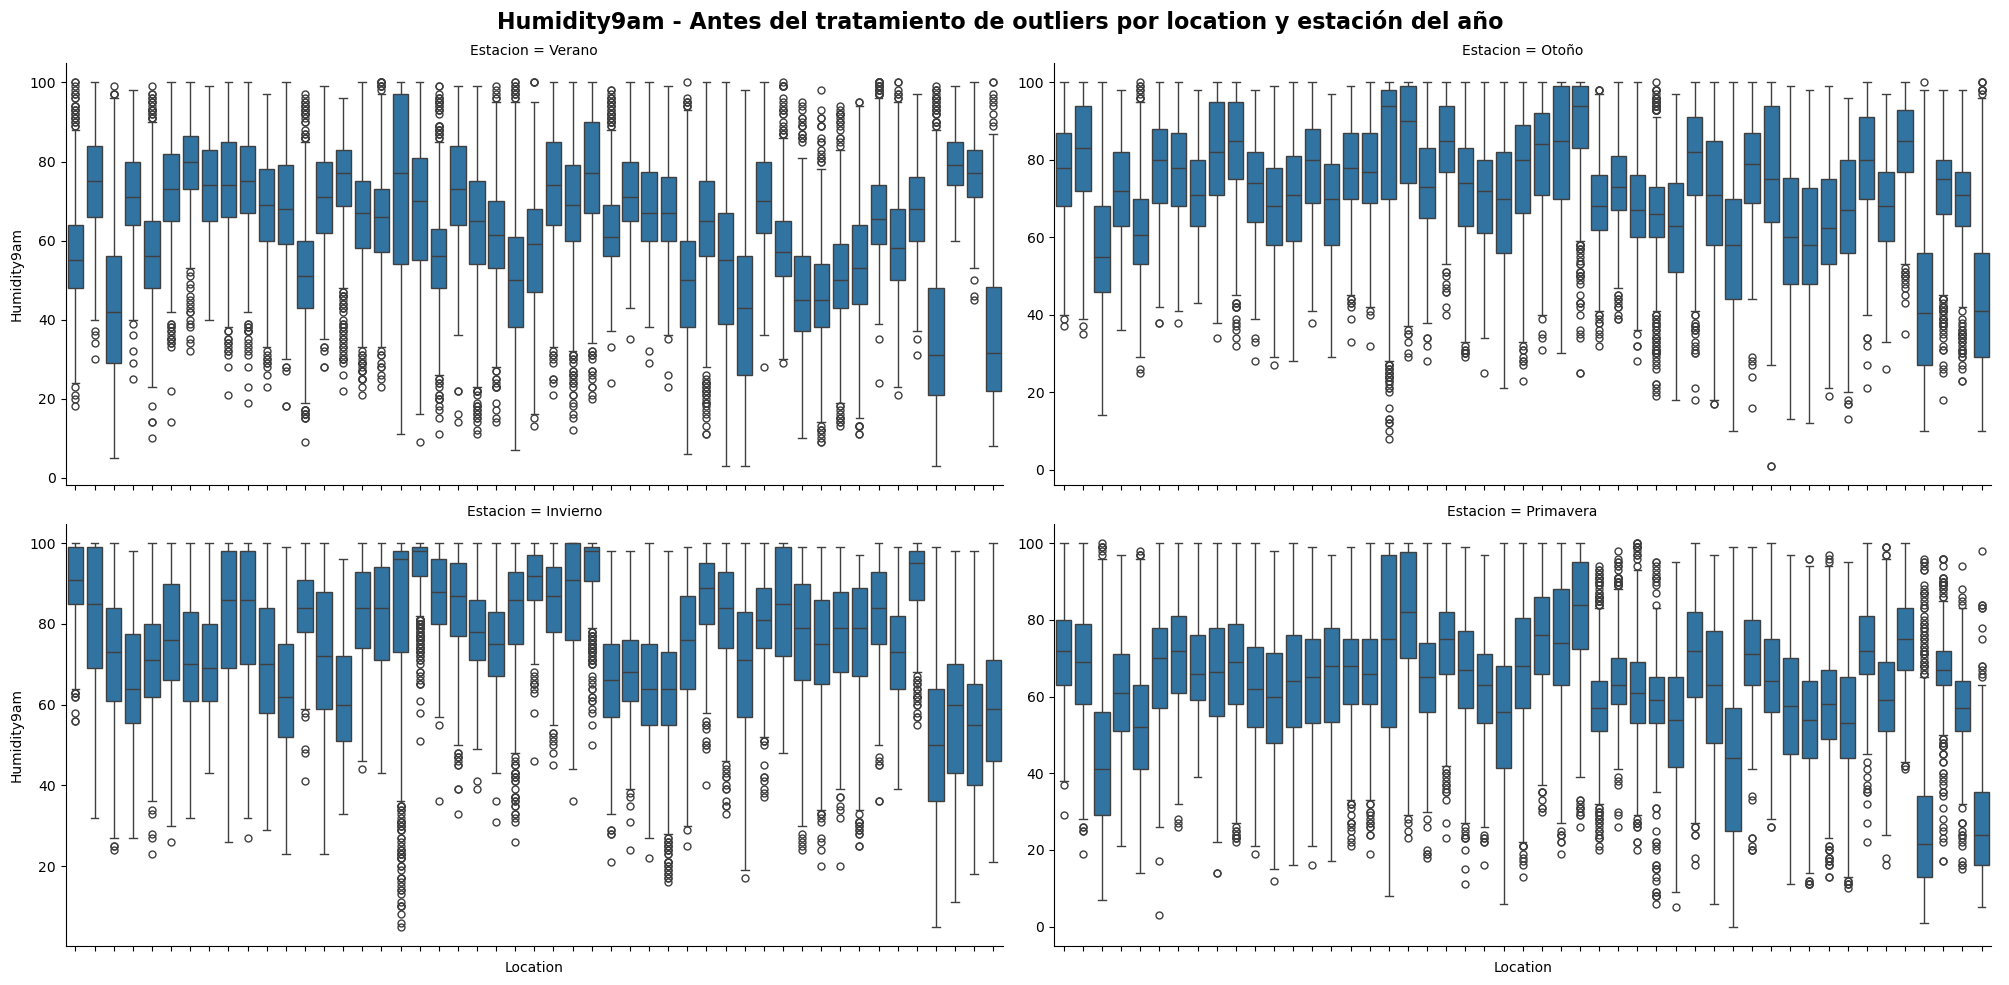

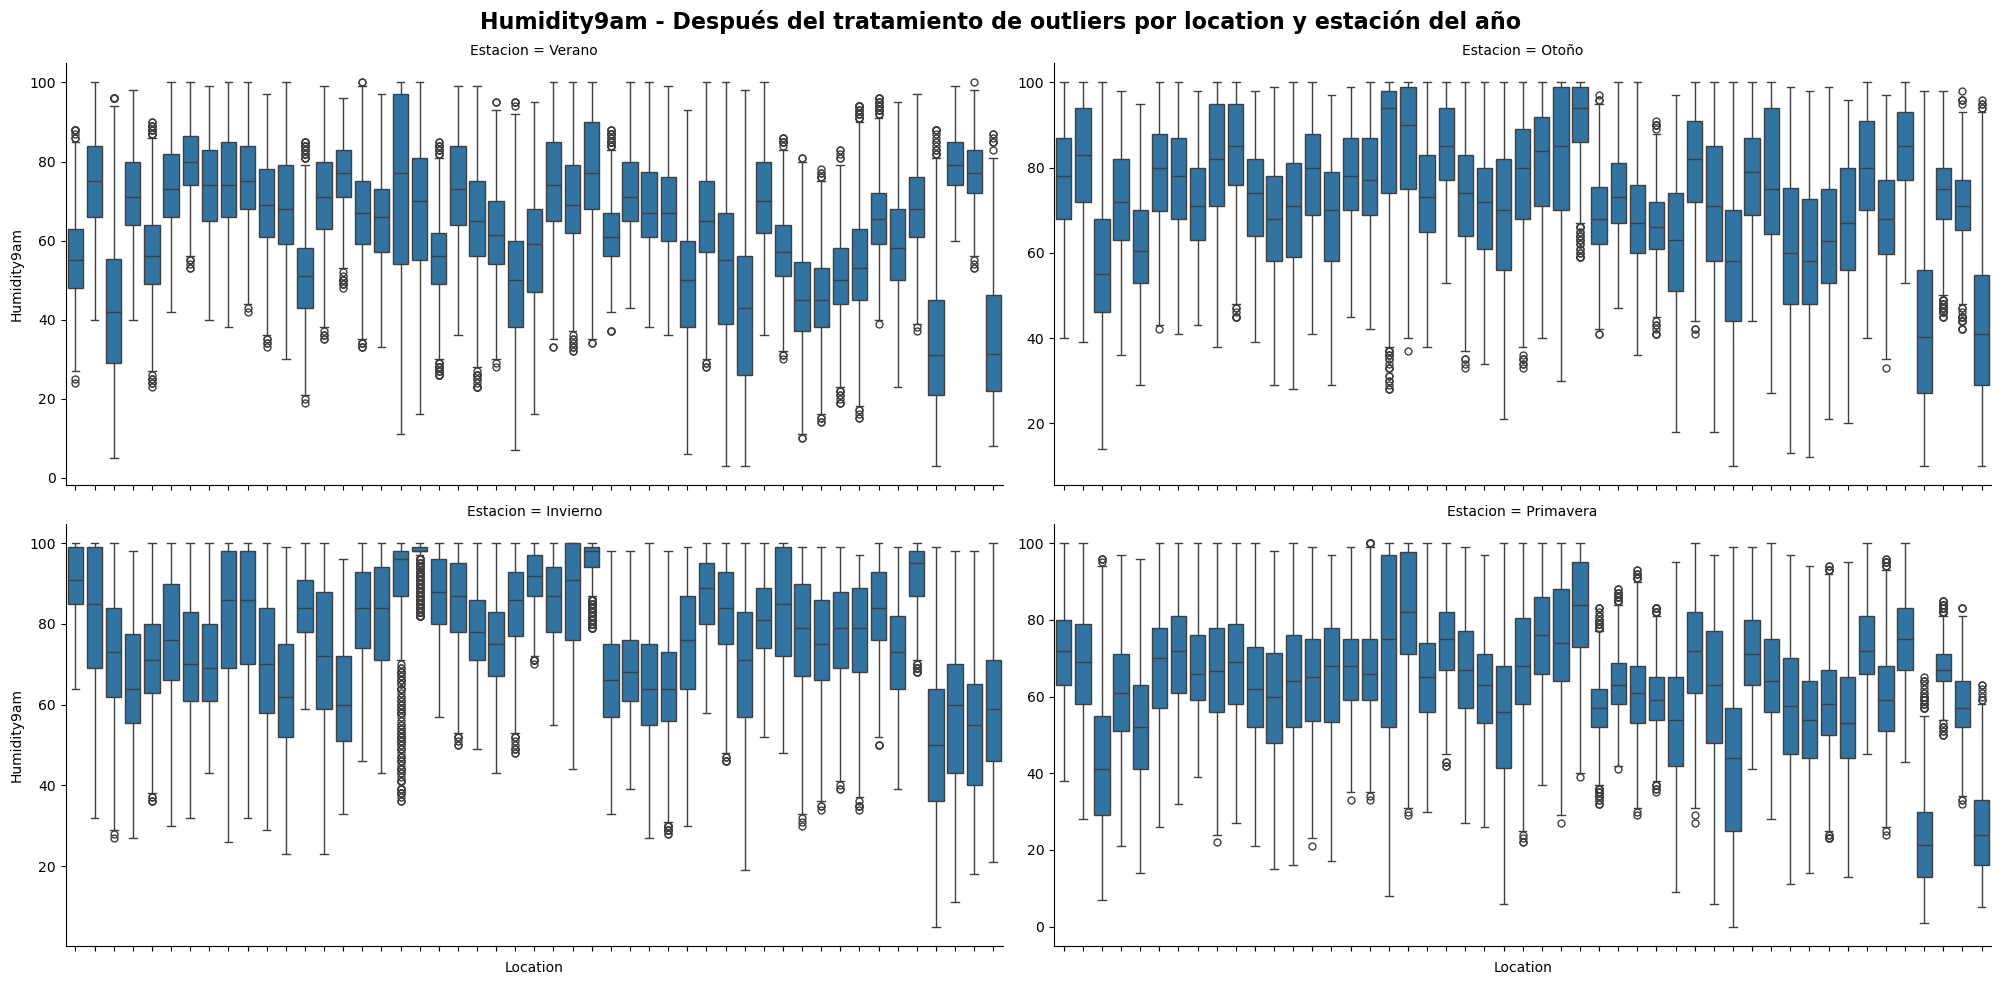

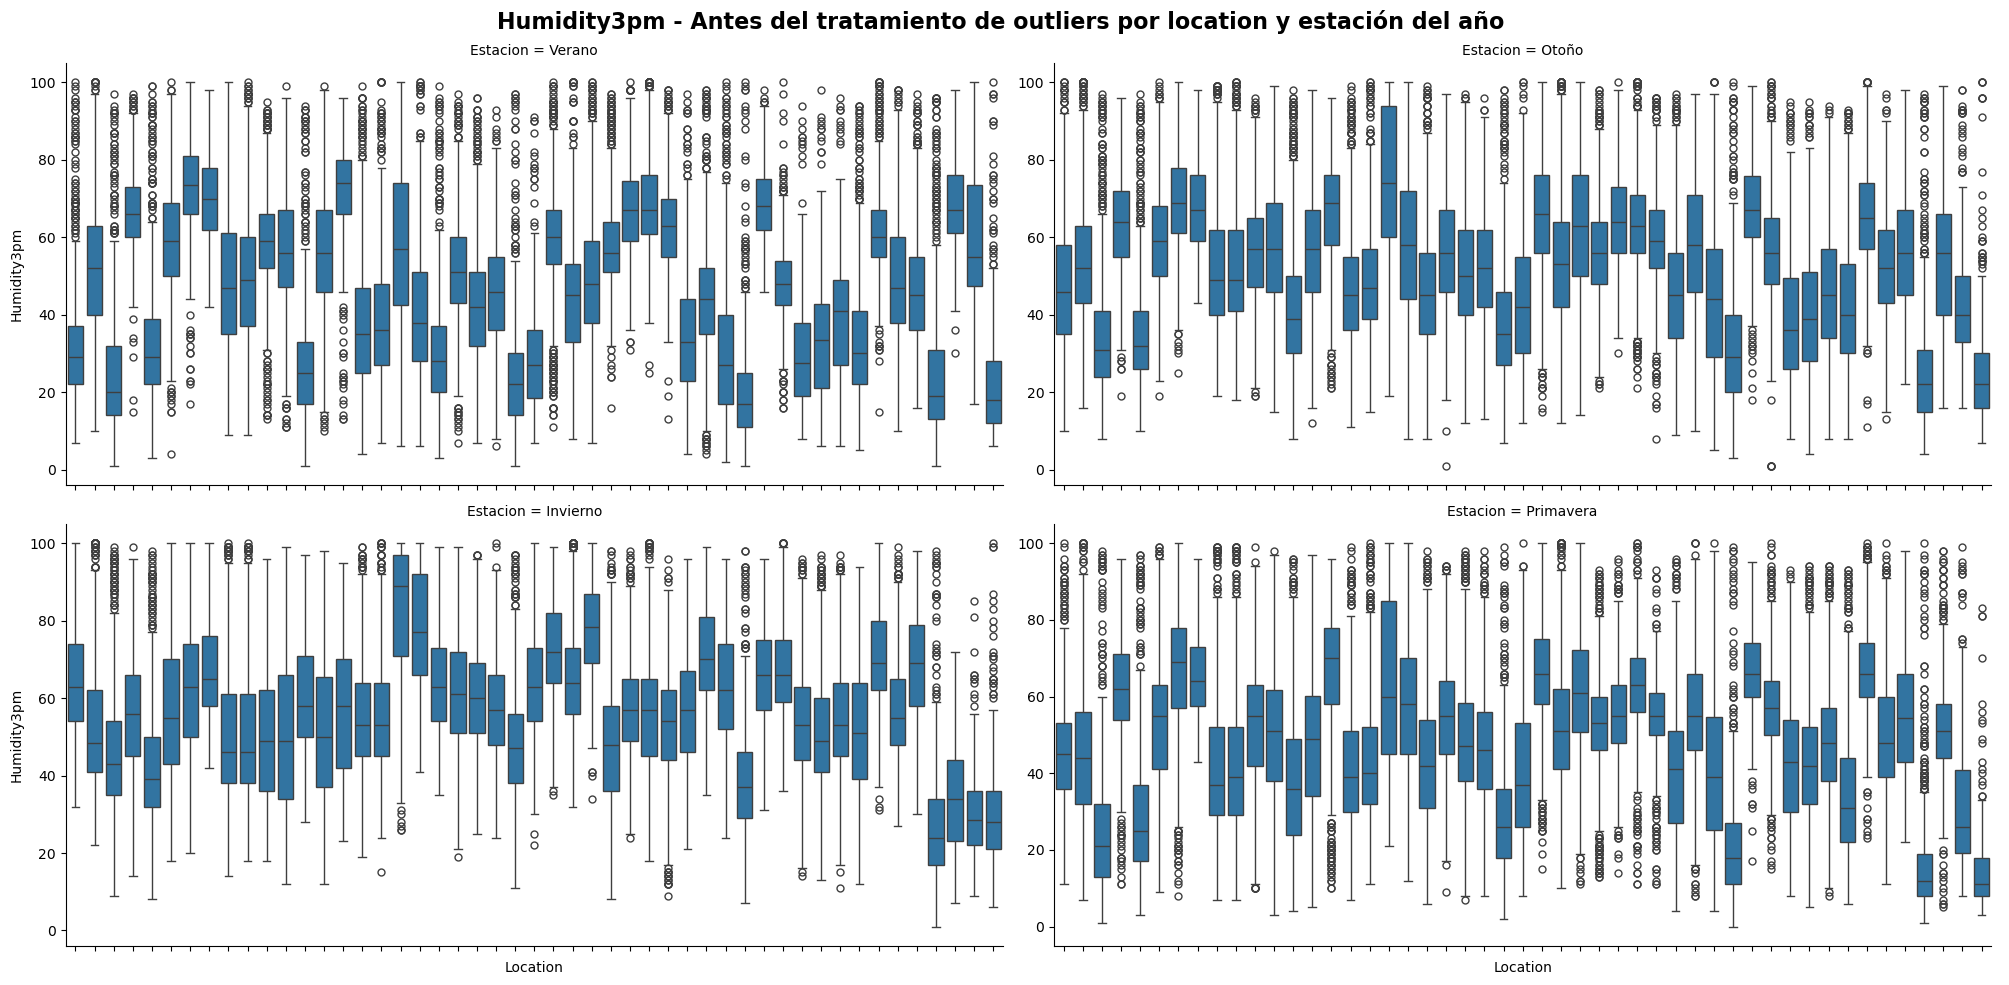

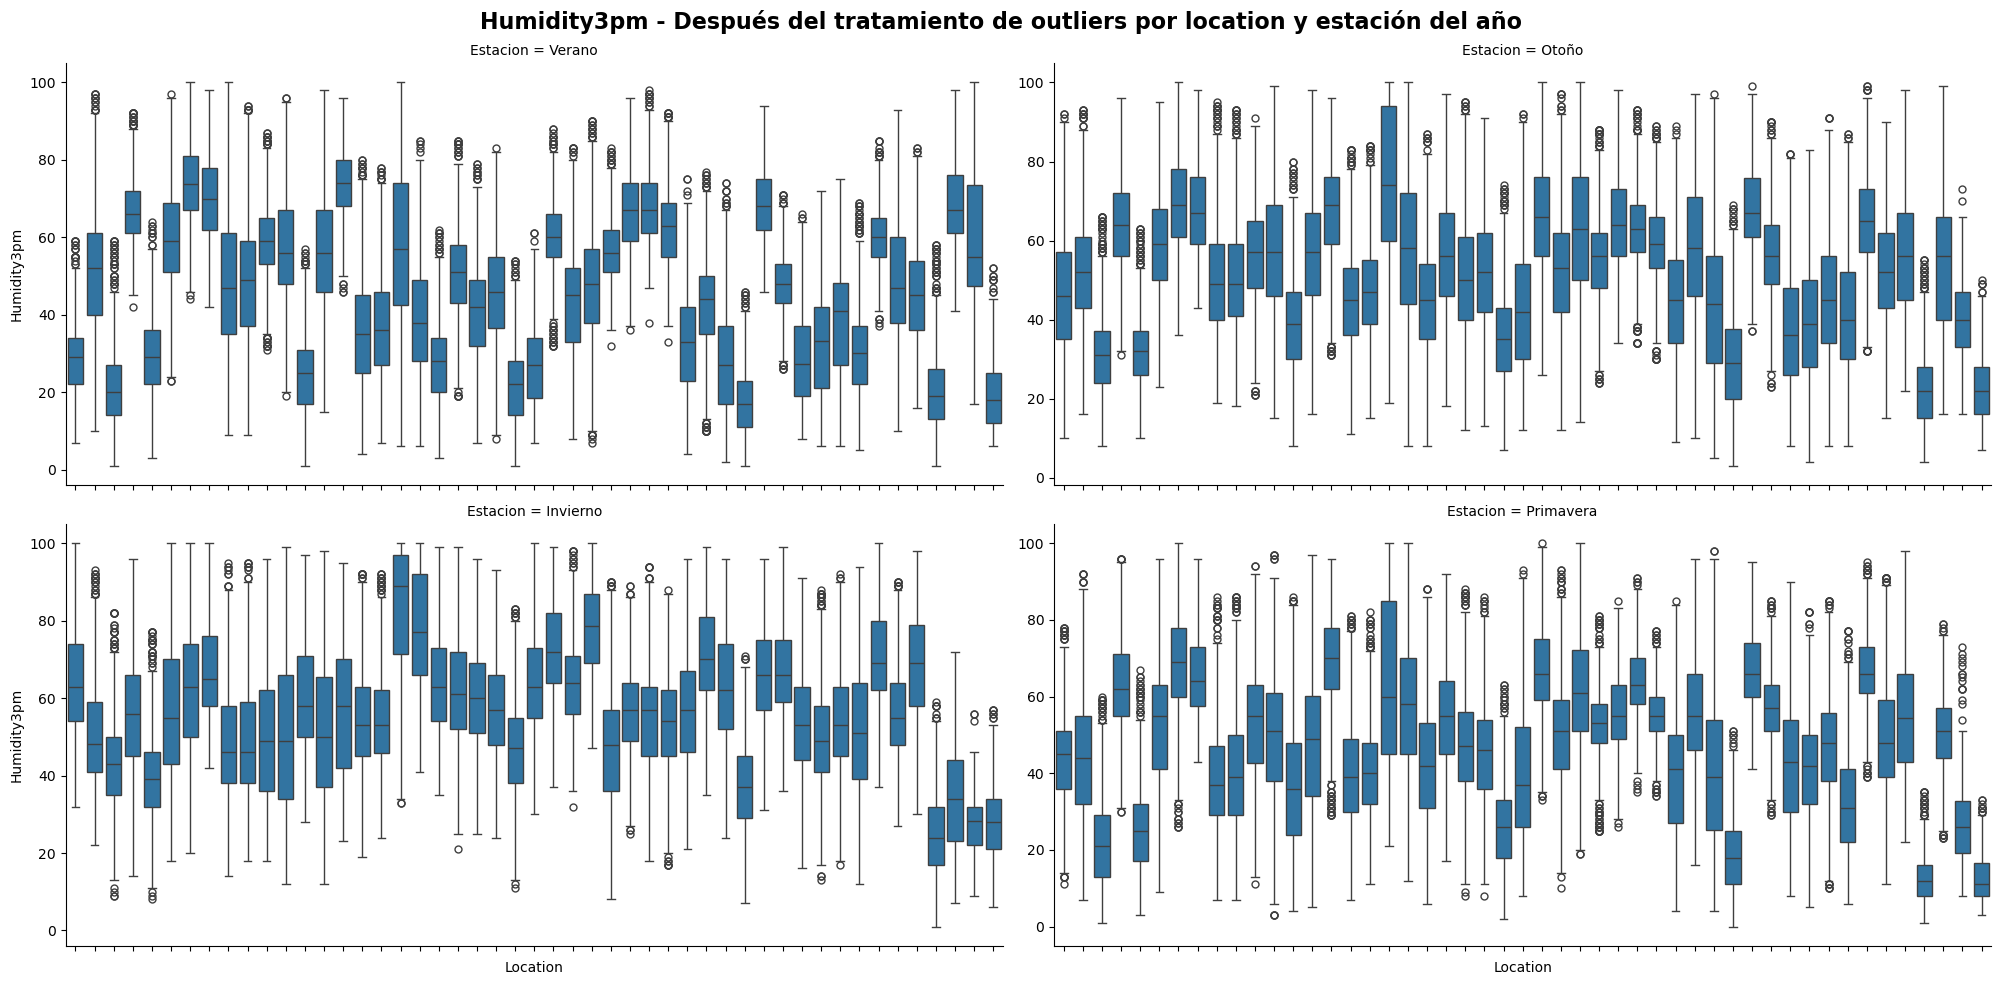

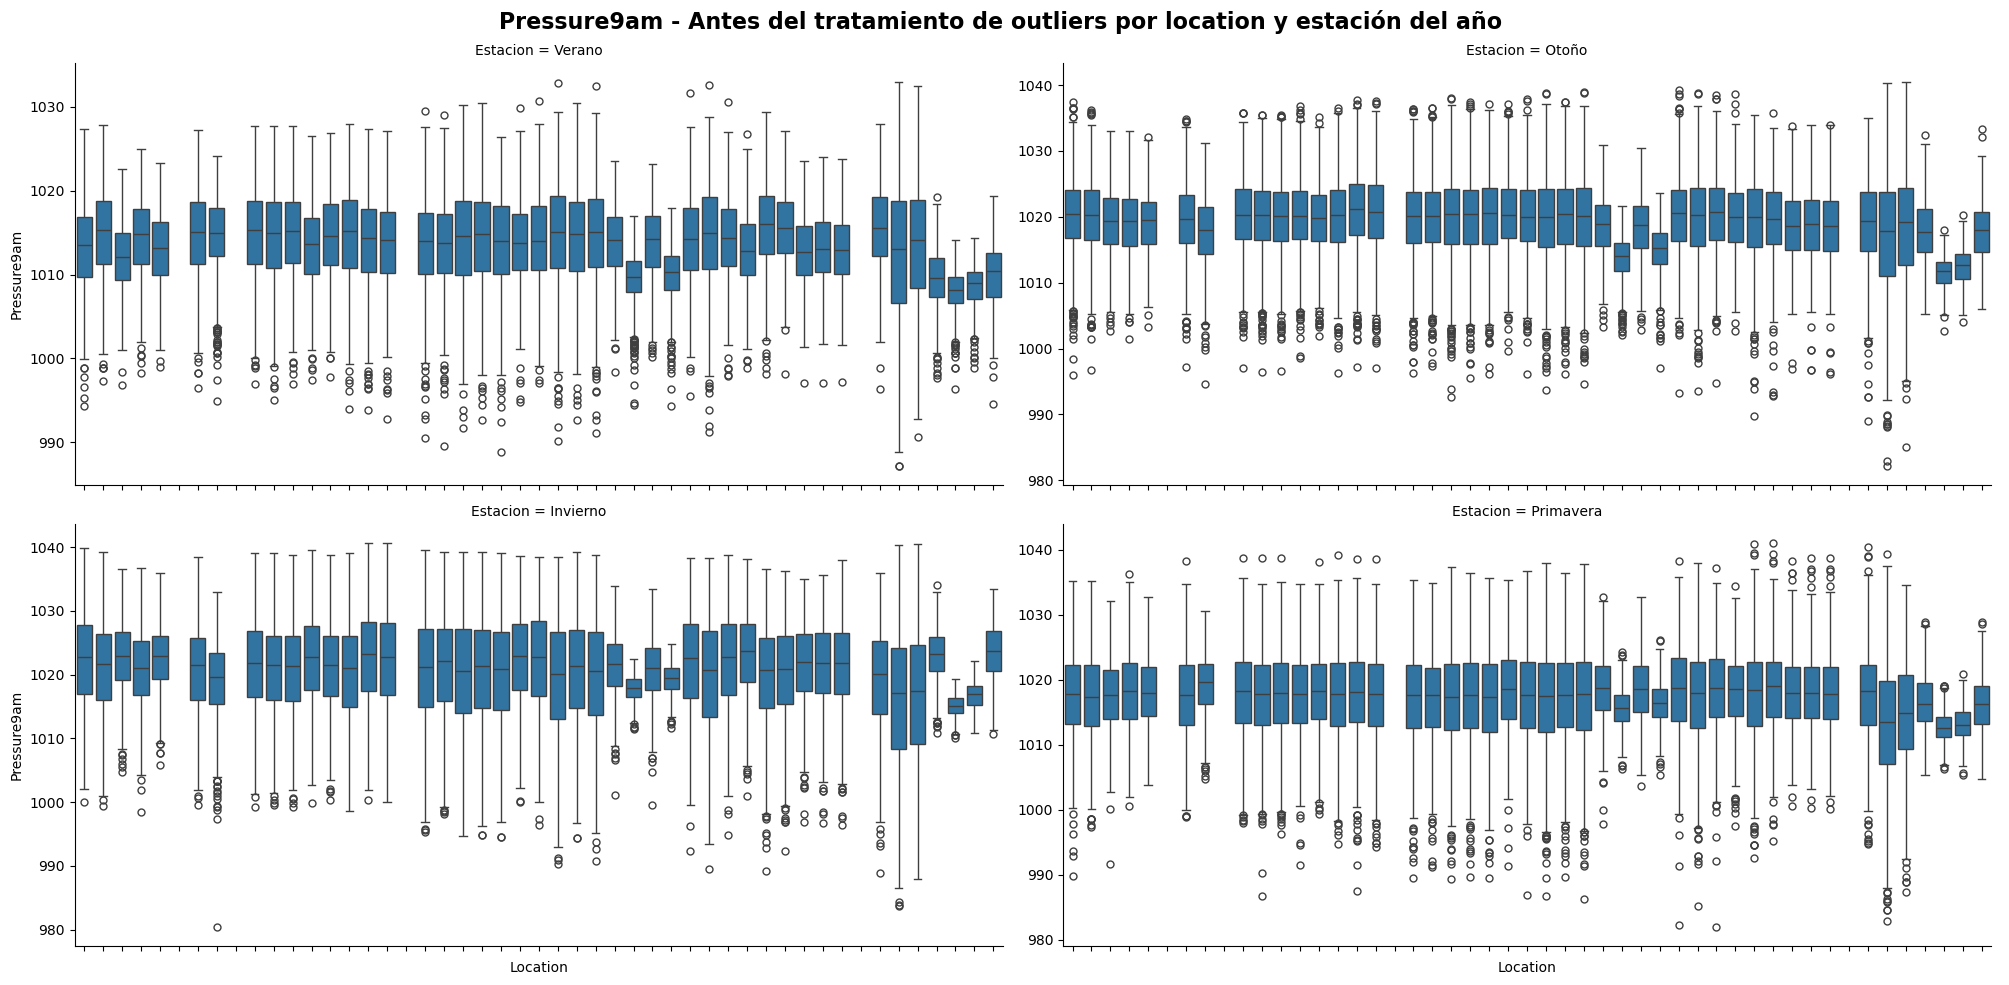

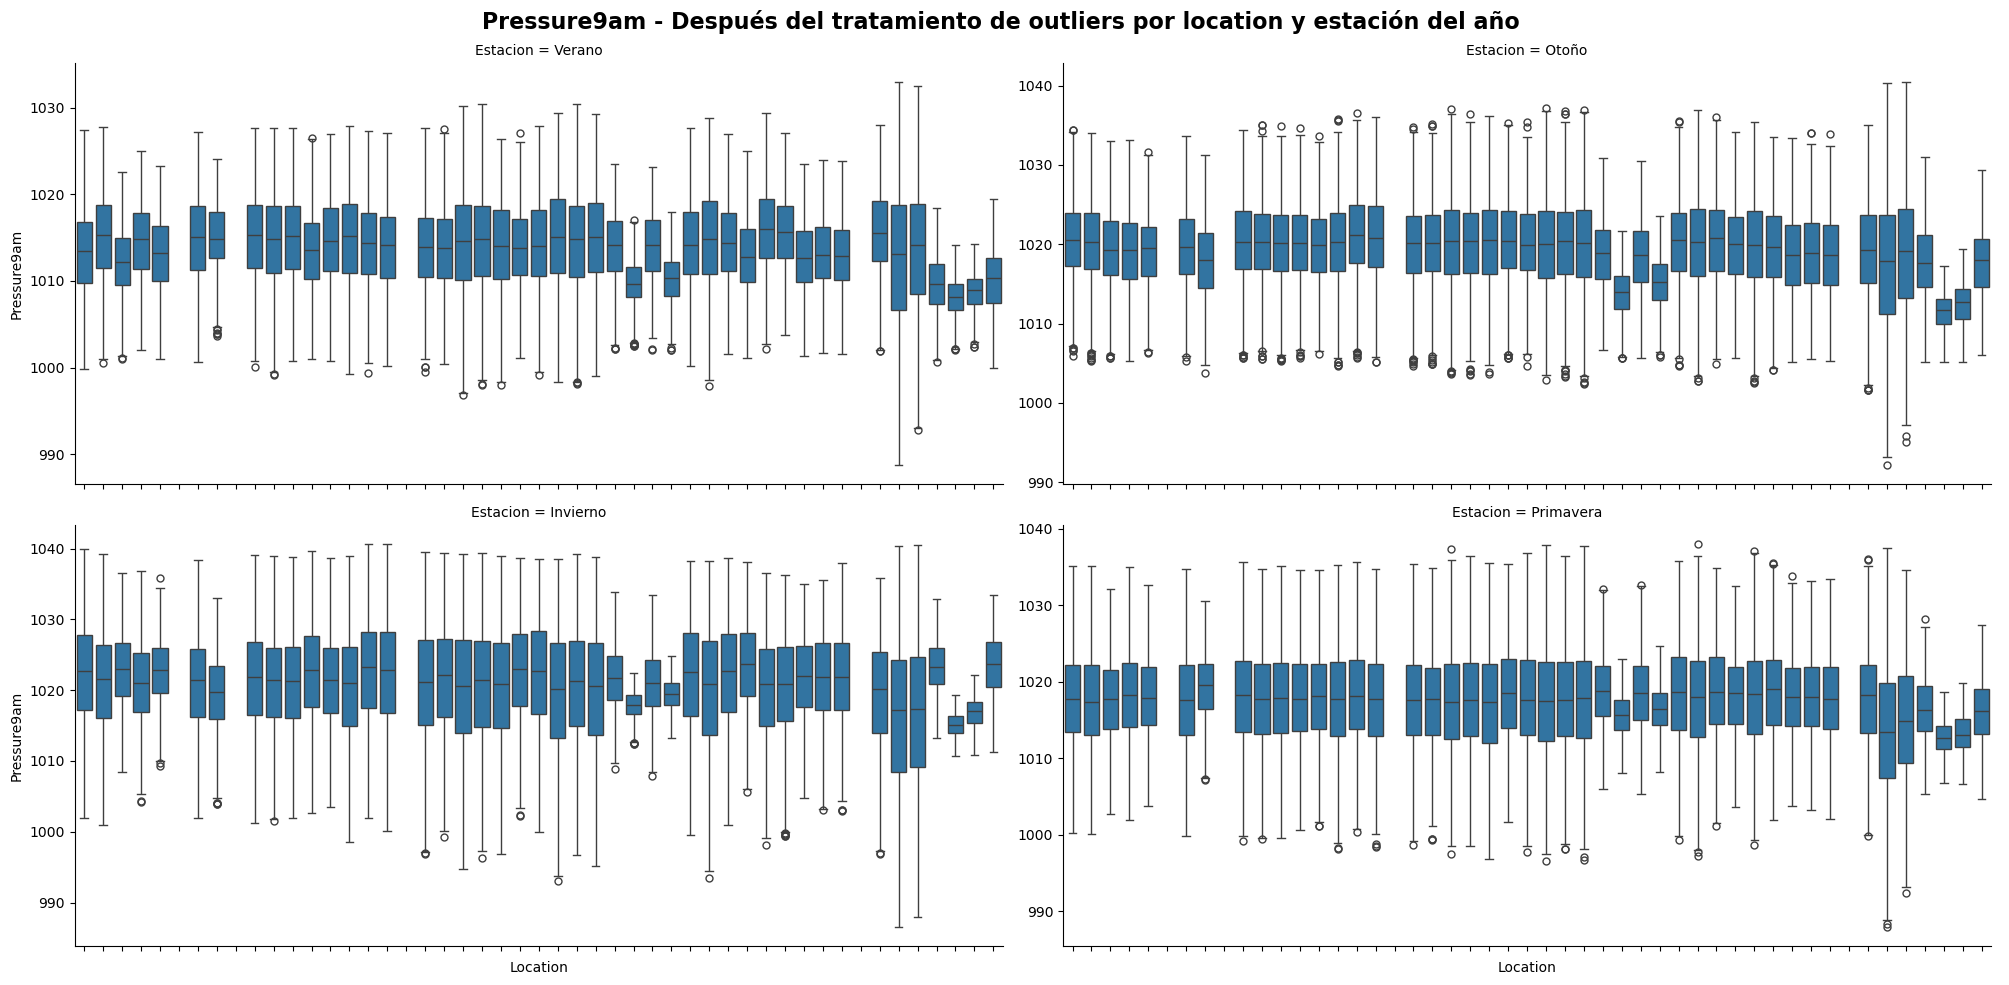

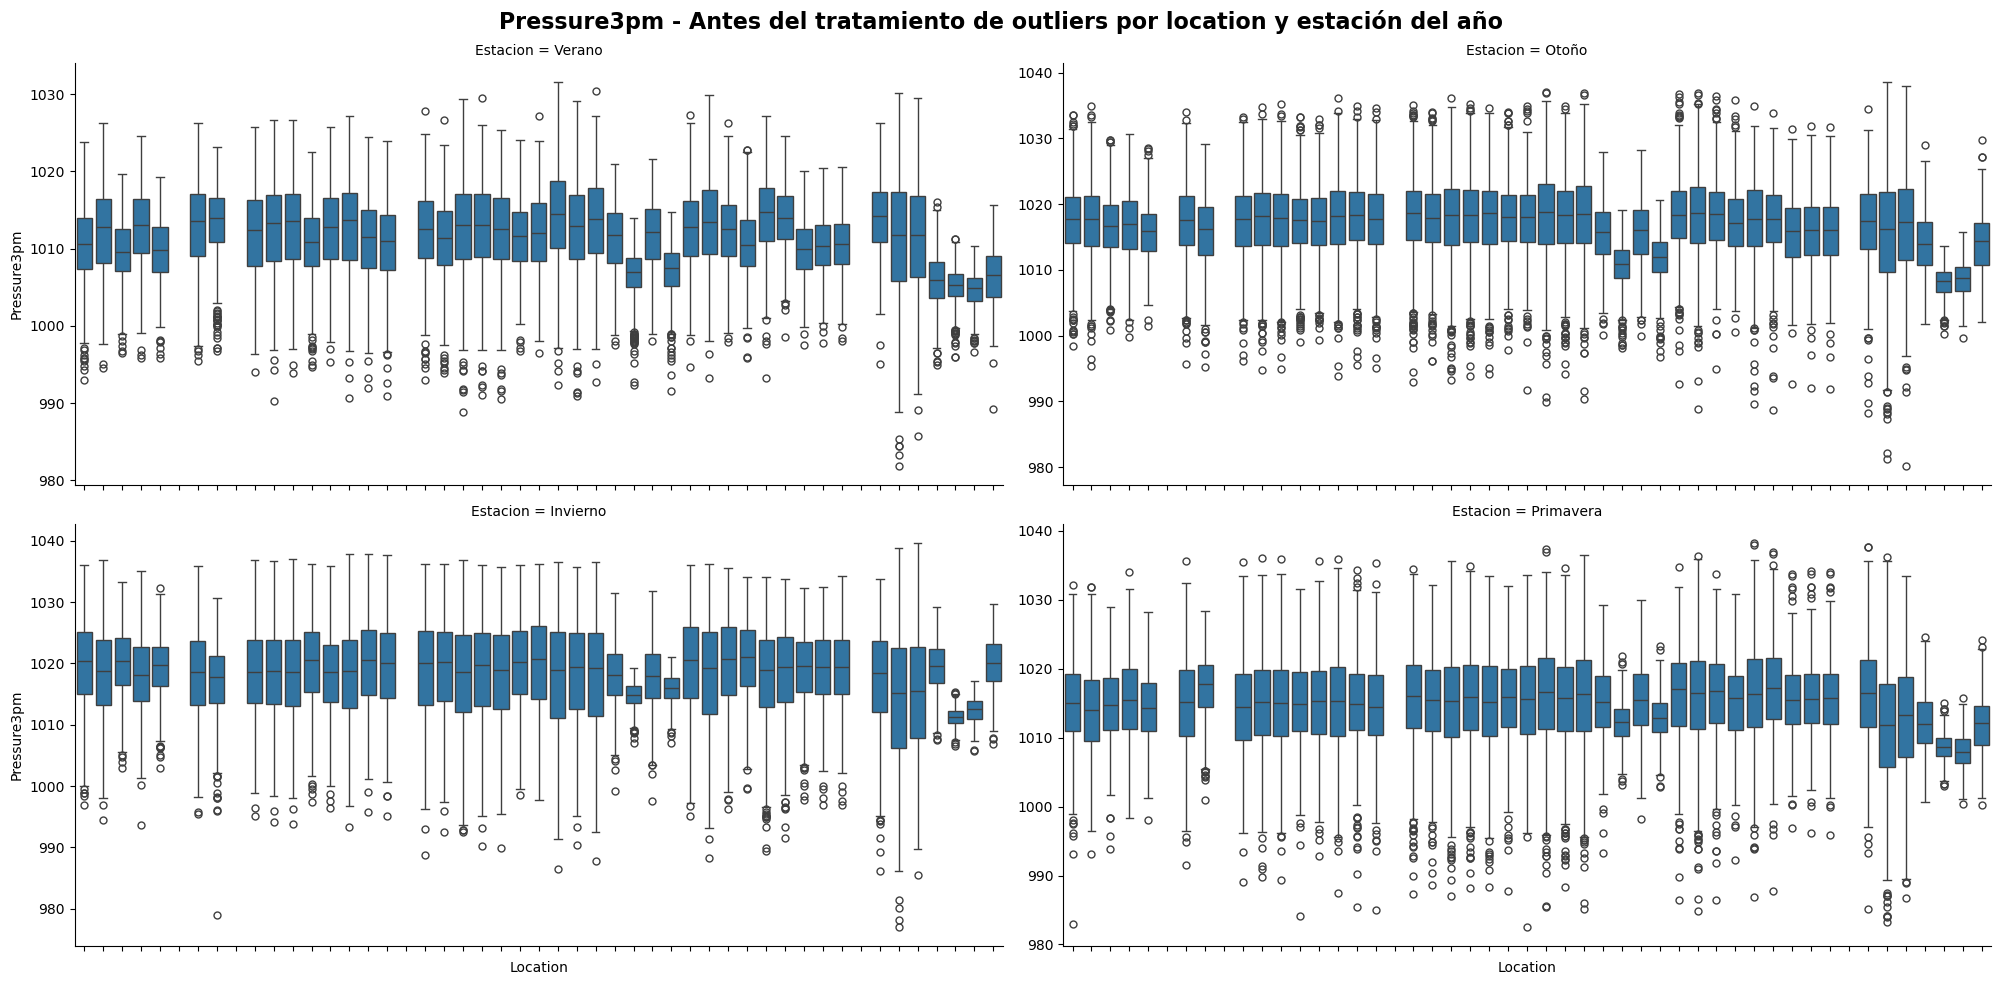

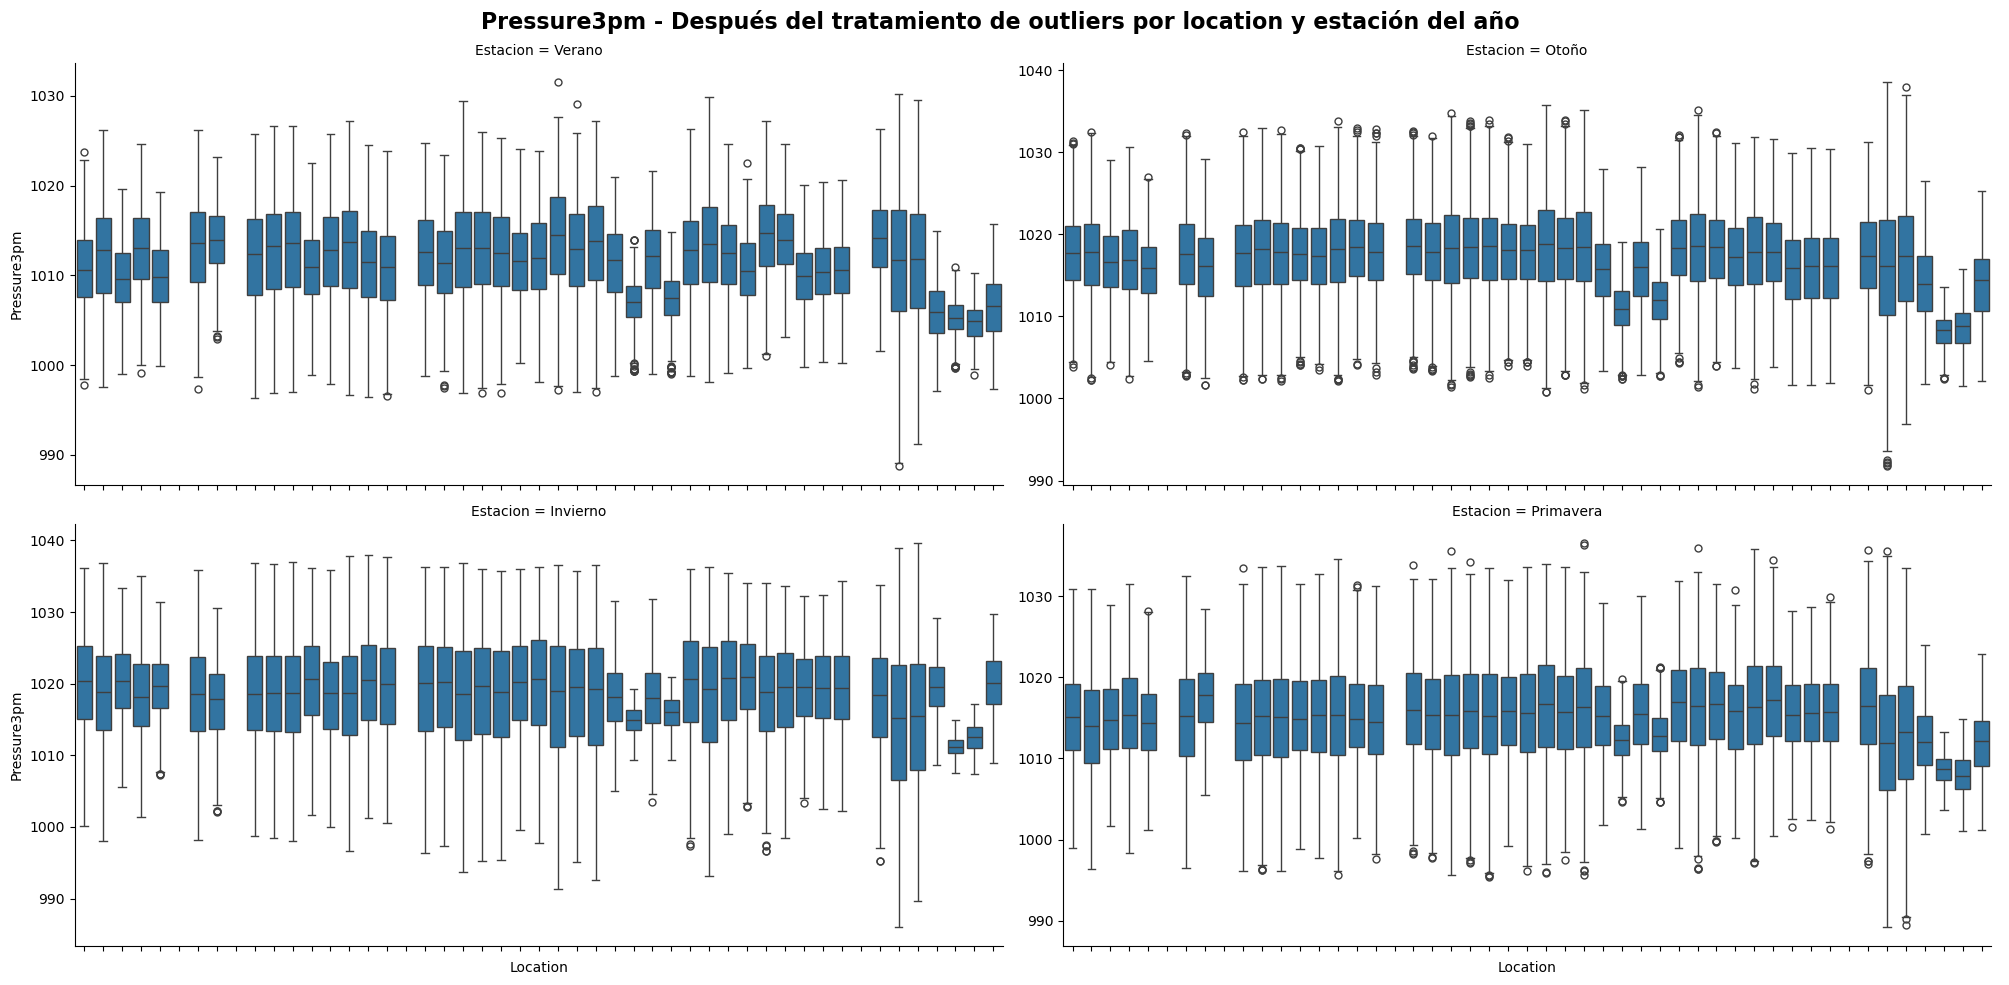

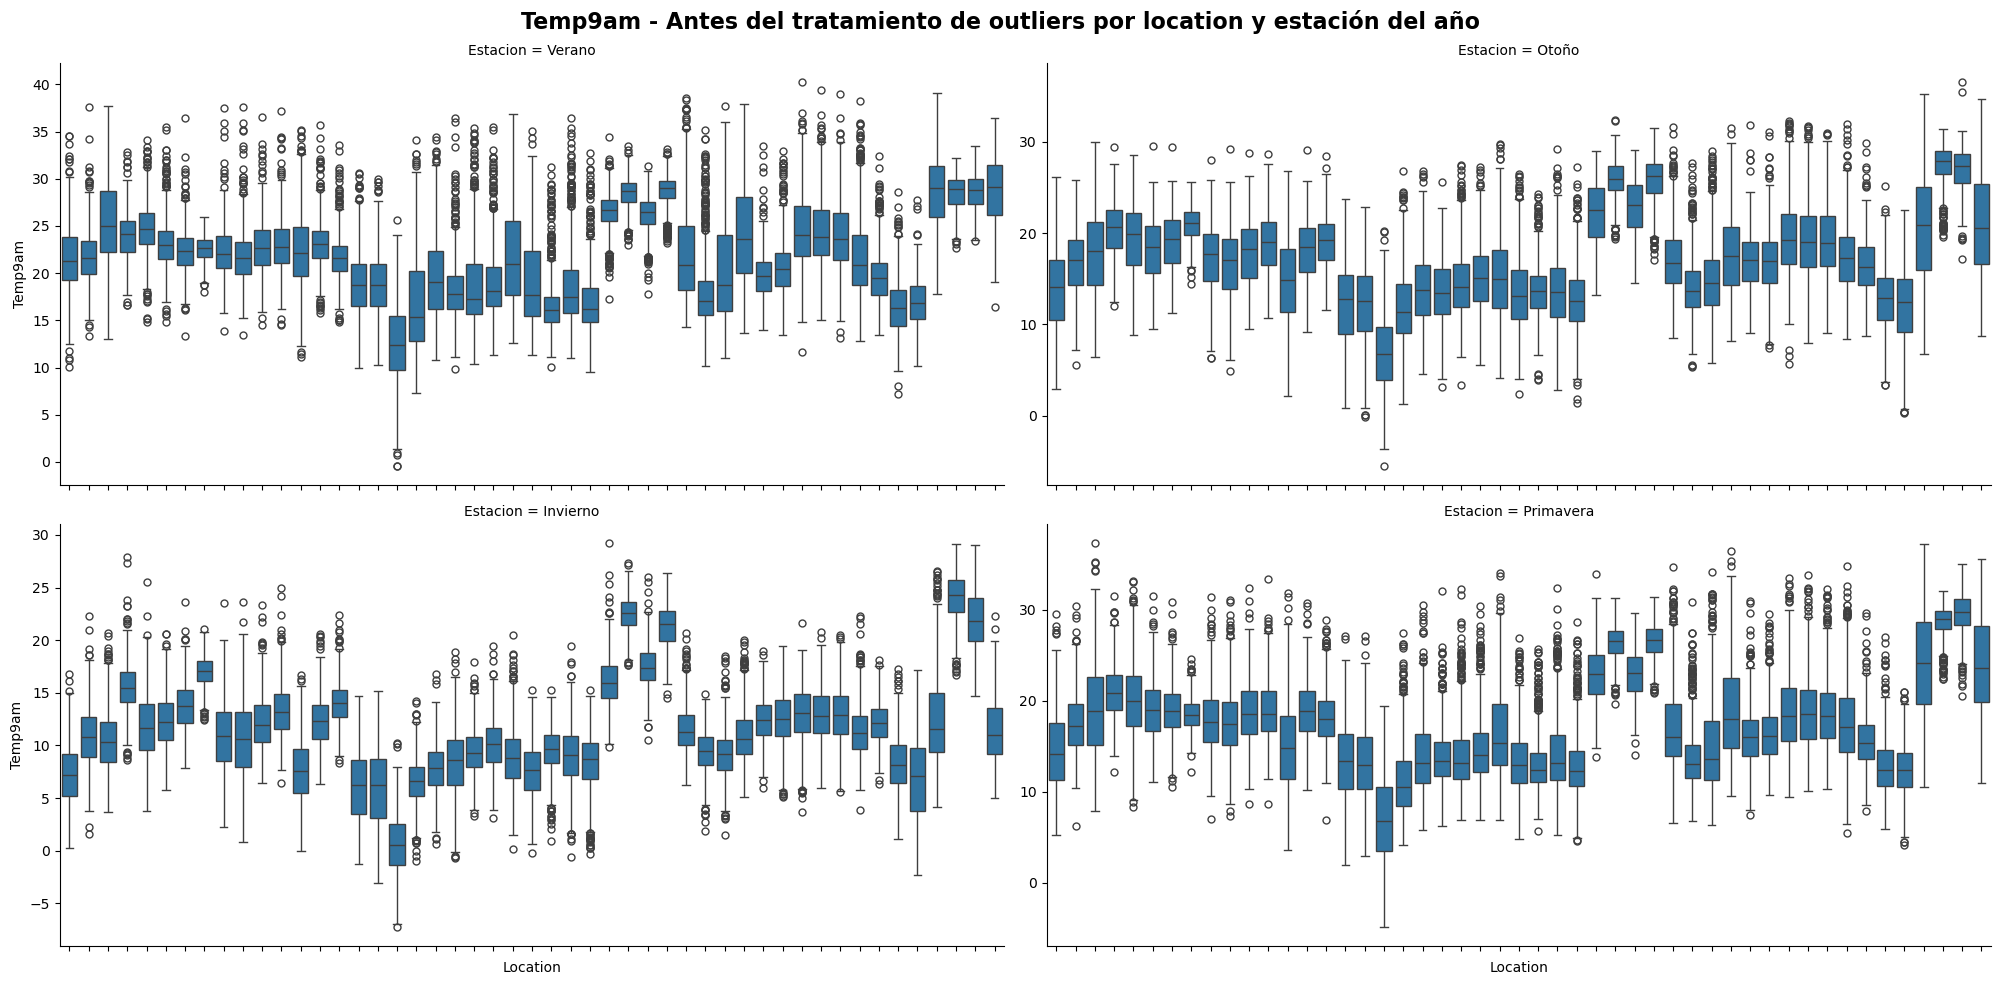

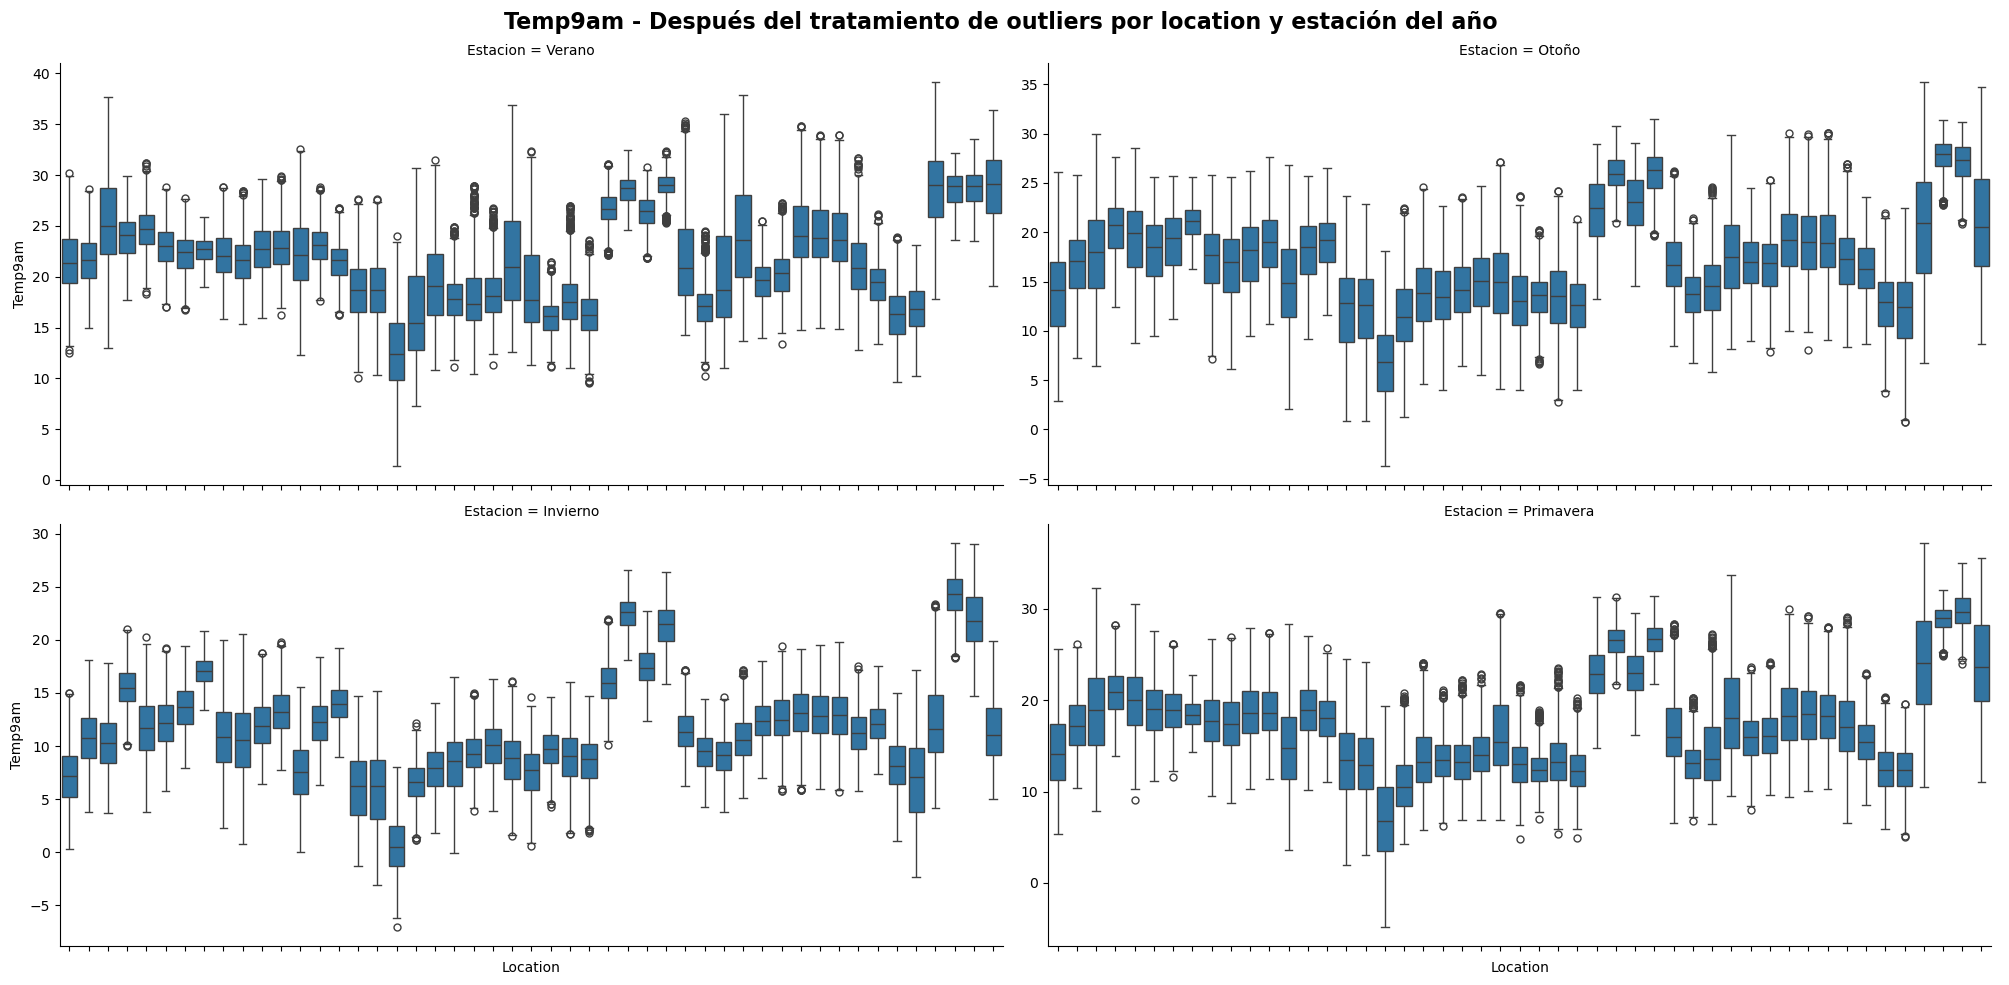

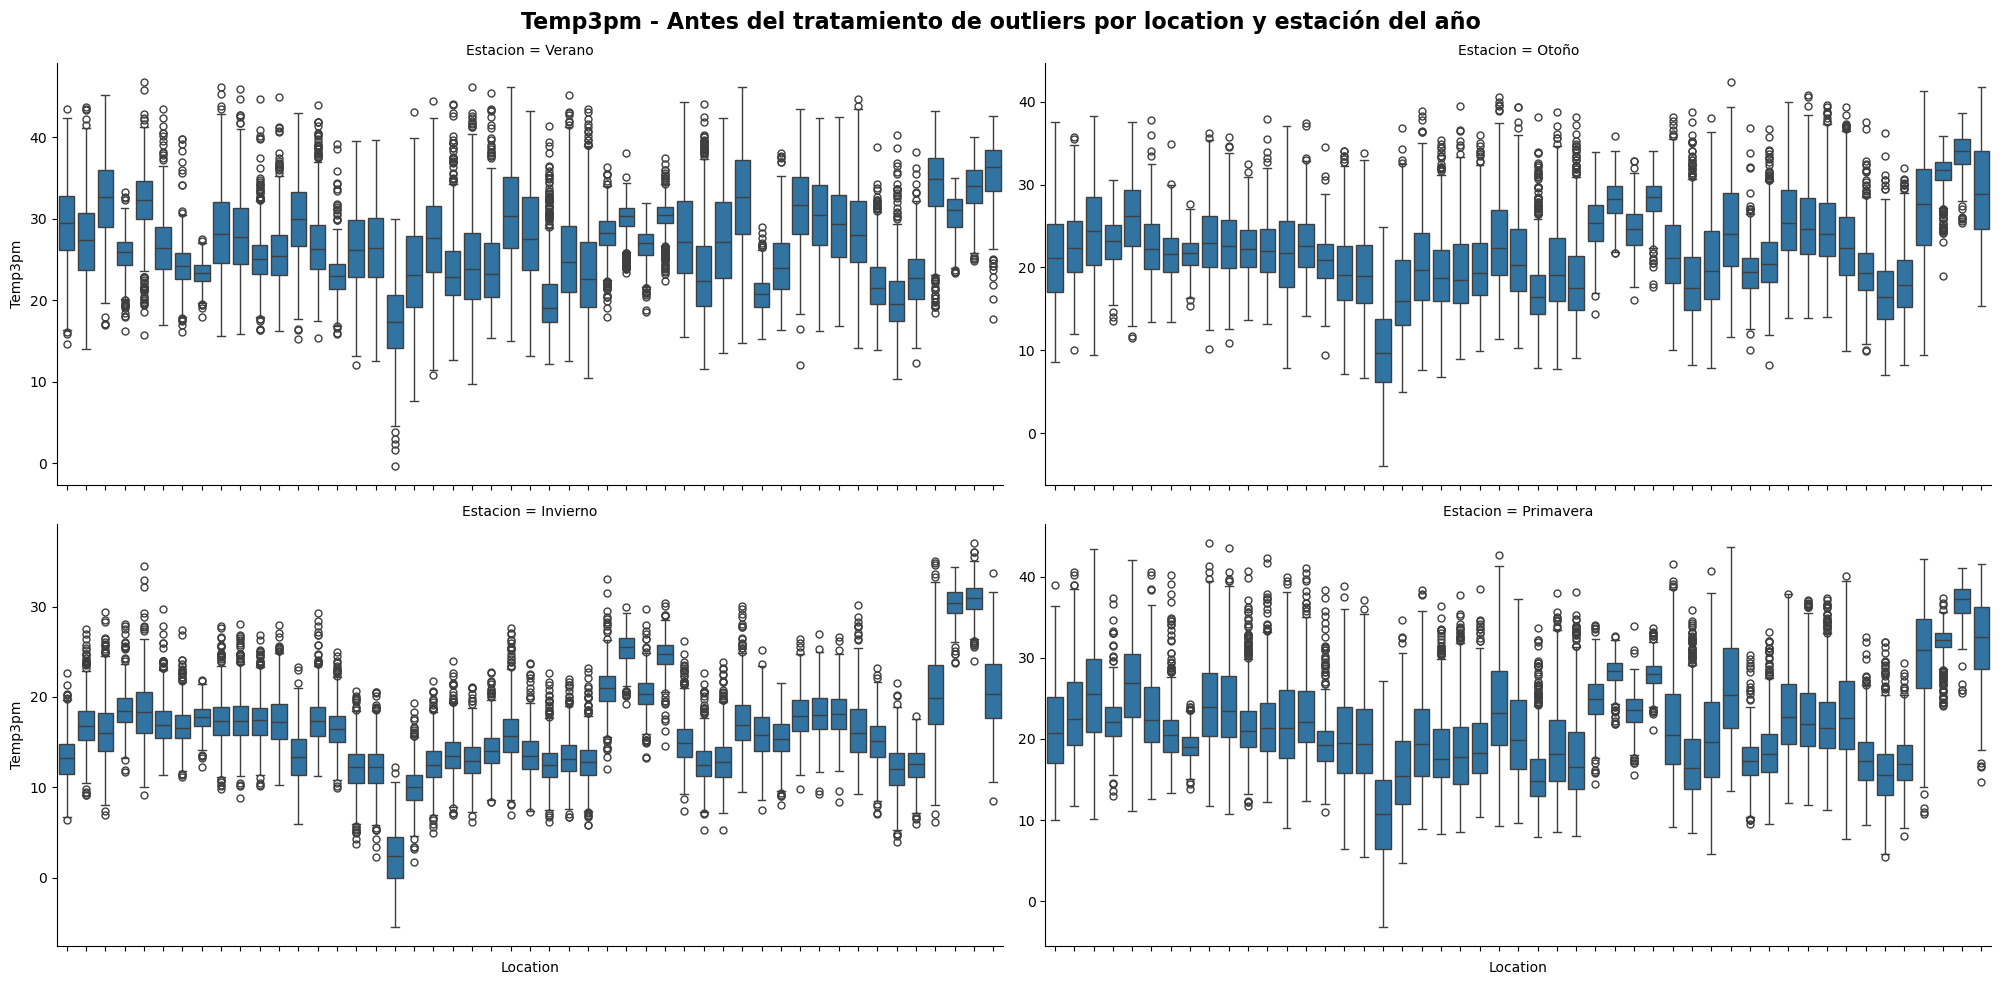

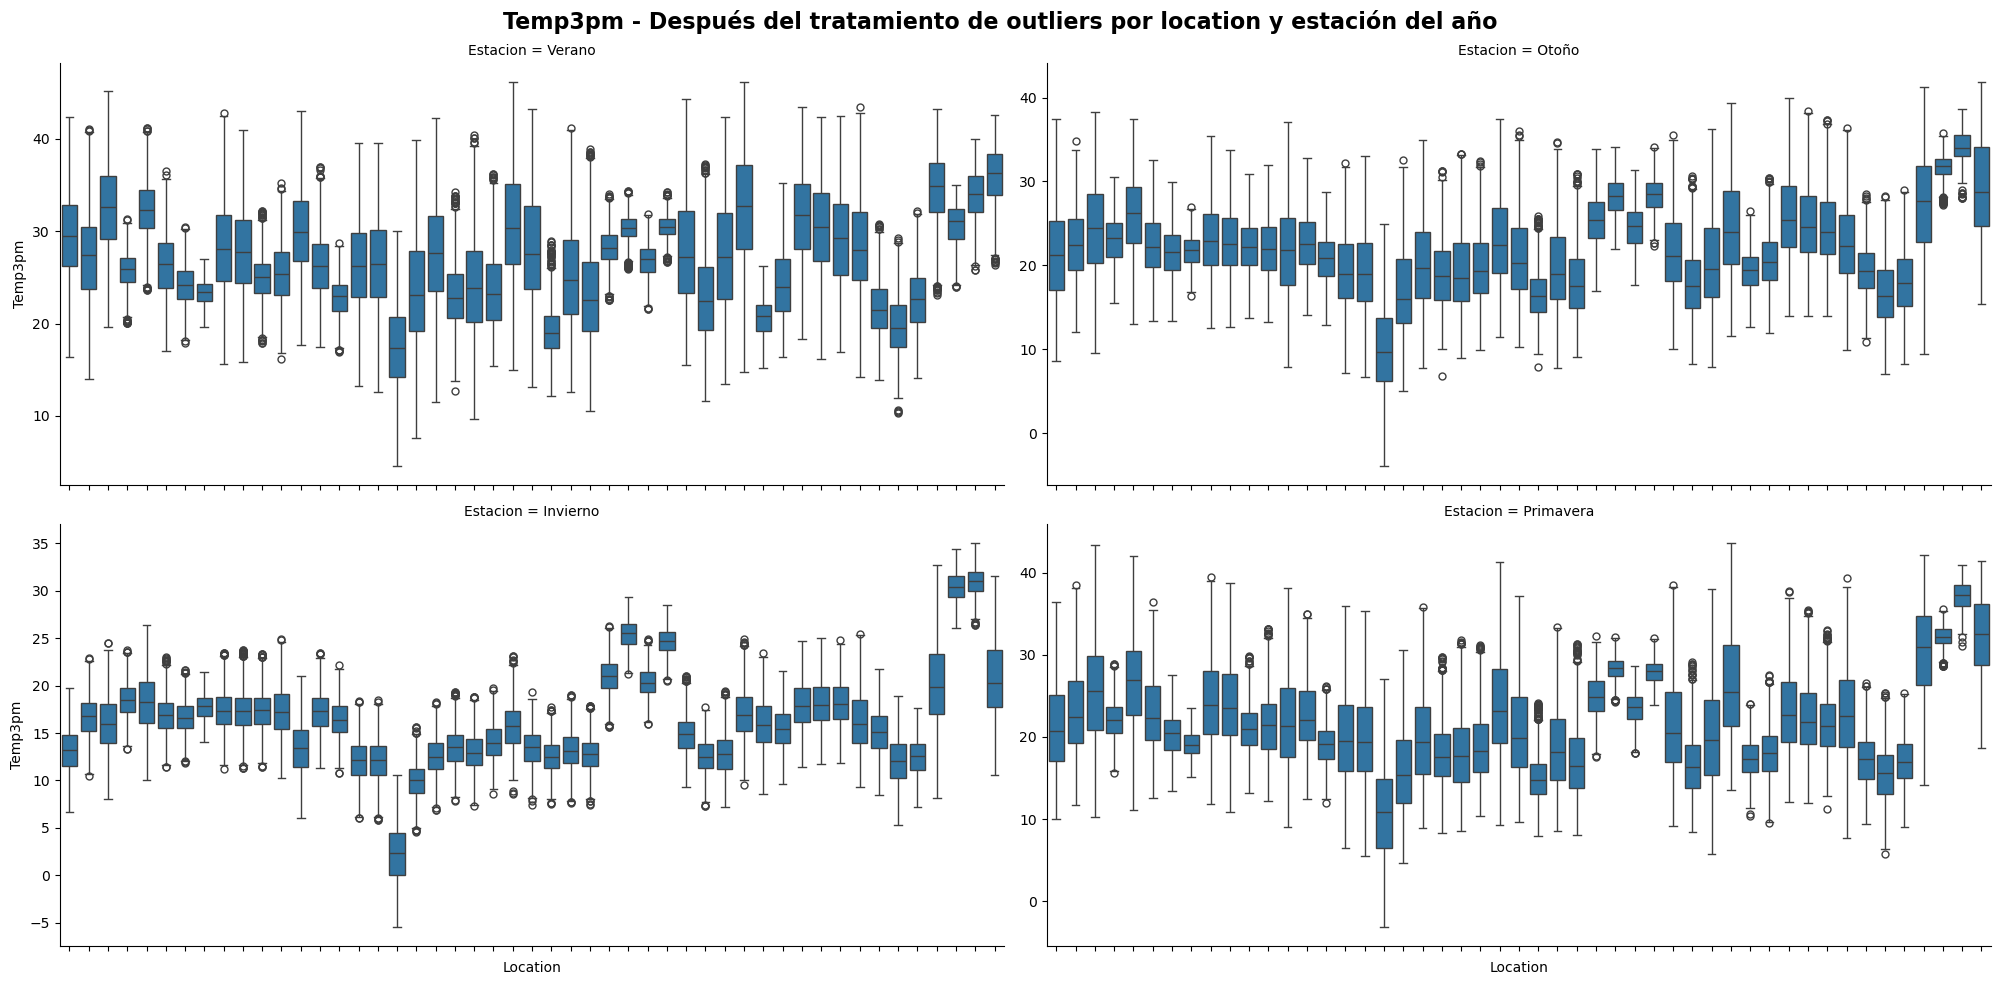

In [25]:
# Creamos una copia para no modificar el original
df_tratado = df.copy()

for col in lista_num:
    # Mostramos los outliers antes de ser tratados
    boxes_facet("Location", col, "Estacion", df=df_tratado, titulo=f"{col} - Antes del tratamiento de outliers por location y estación del año")

    # Tratamos los datos Outliers por zona y Estacion
    df_tratado = tratar_outliers_por_grupo(df_tratado, col, 'Location', 'Estacion')

    # Mostramos los outliers después de ser tratados
    boxes_facet("Location", col, "Estacion", df=df_tratado, titulo=f"{col} - Después del tratamiento de outliers por location y estación del año")

Finalmente hacemos una visualización general del Tratamiento de OUTLIERS.

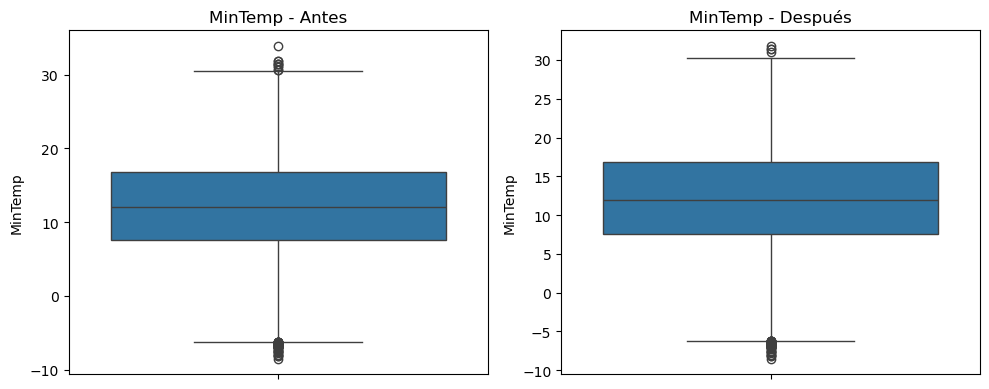

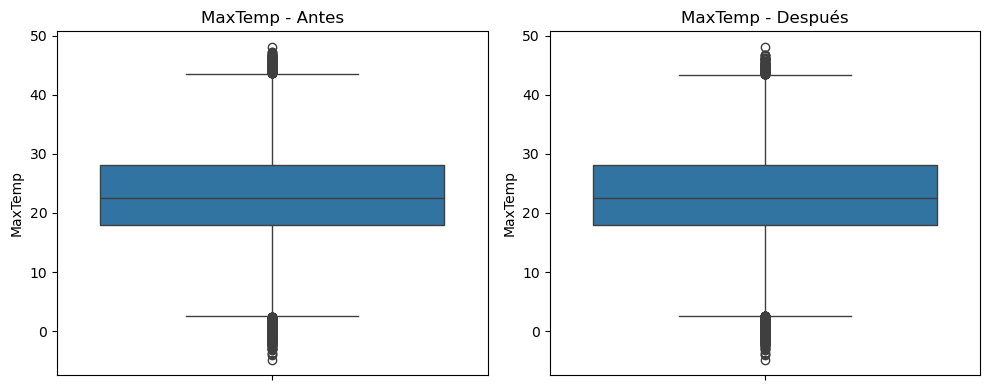

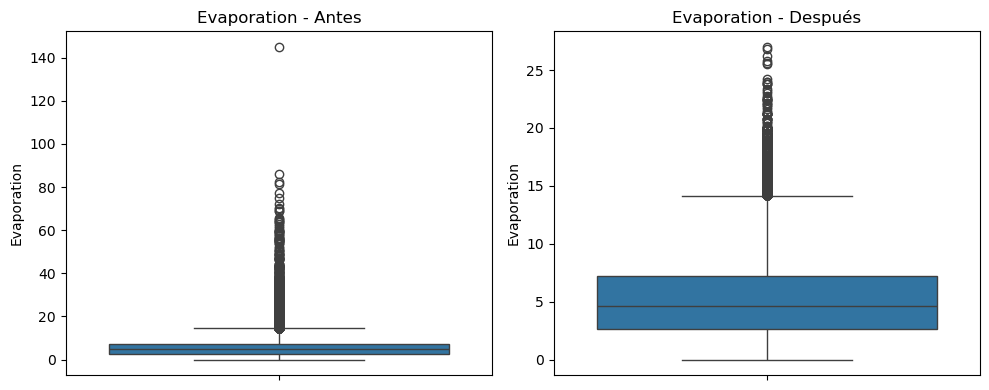

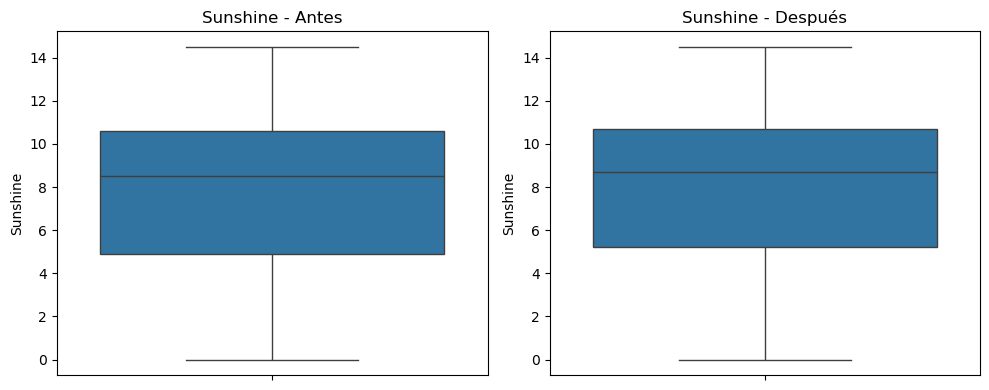

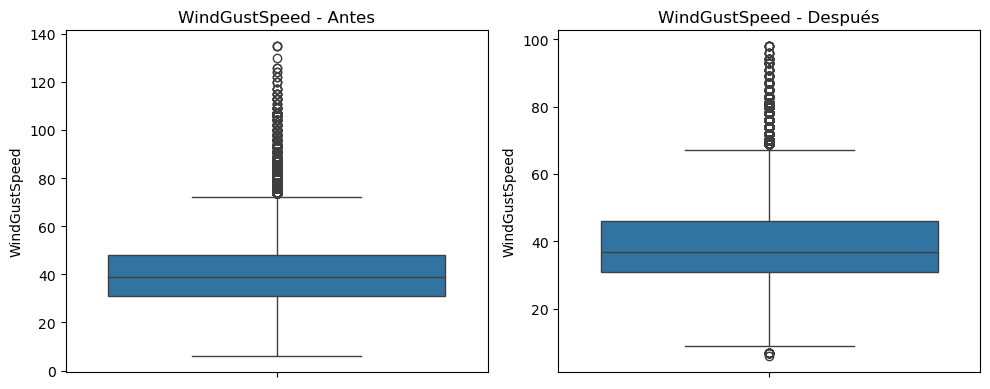

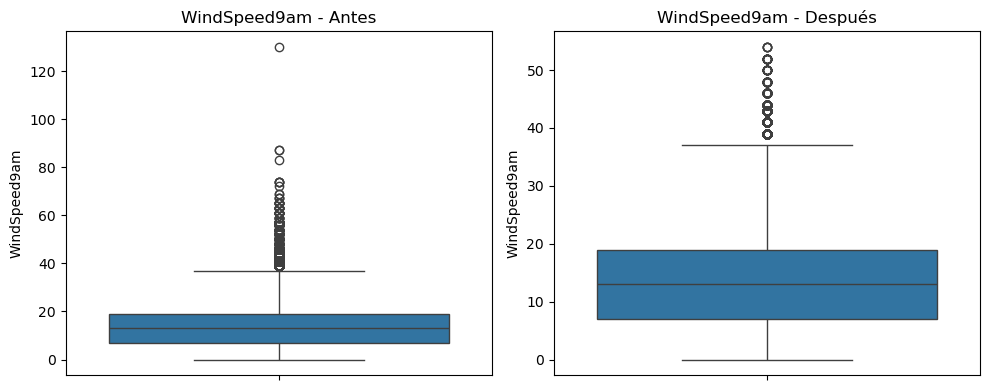

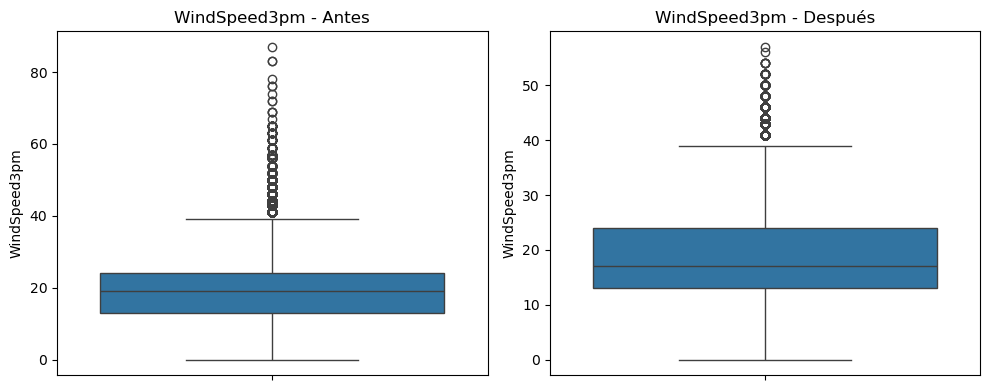

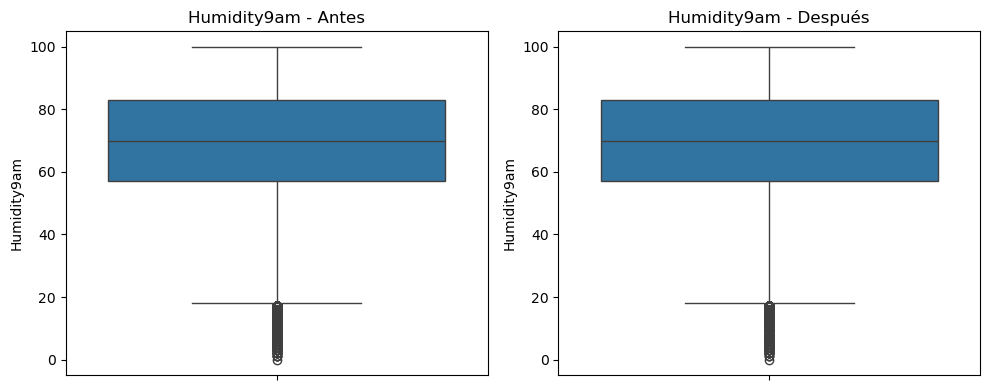

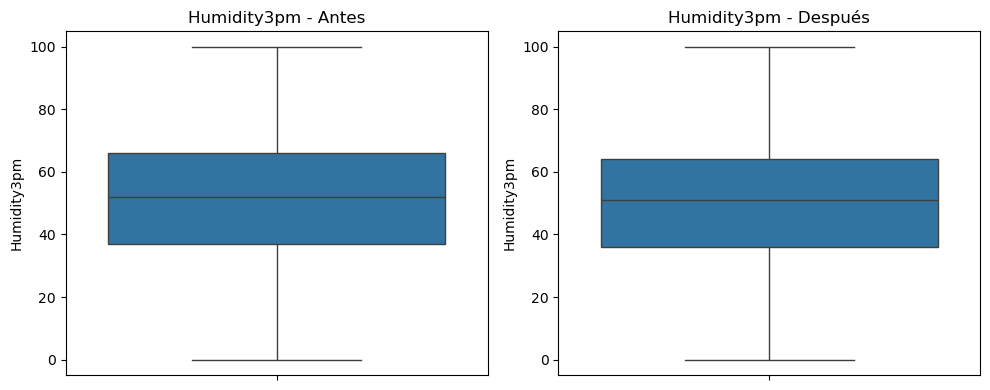

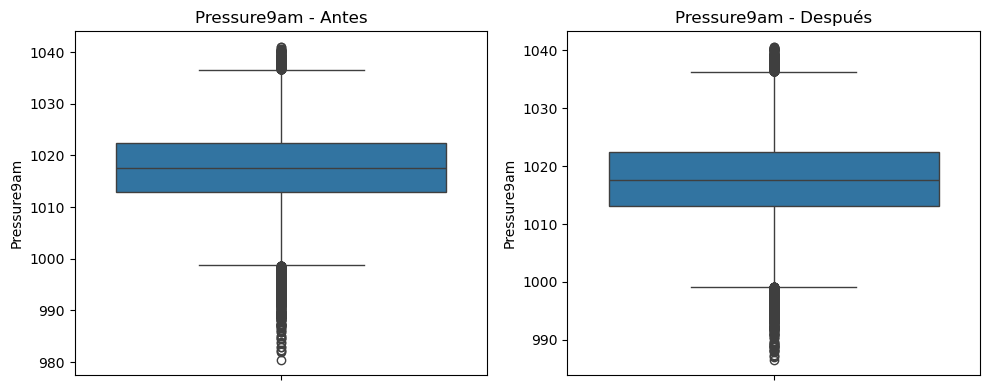

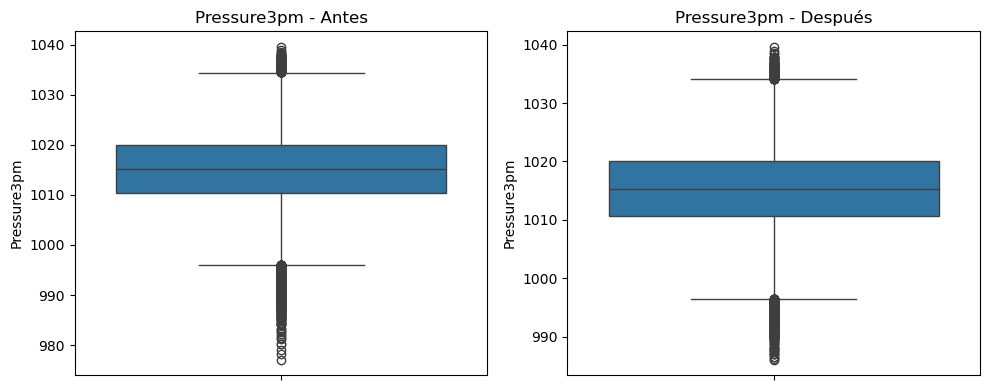

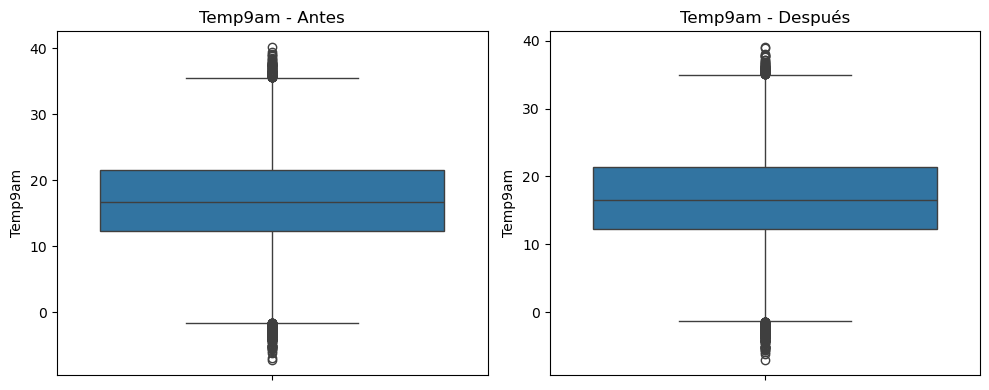

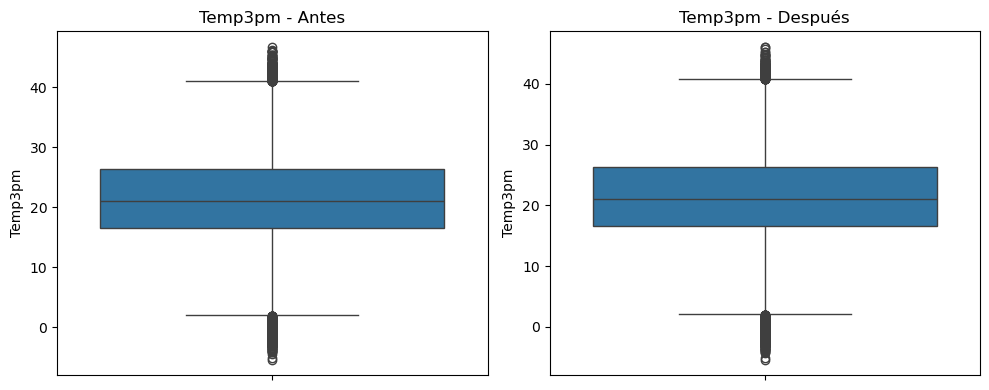

In [27]:
for col in lista_num:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Antes')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_tratado[col])
    plt.title(f'{col} - Después')

    plt.tight_layout()
    plt.show()


## Tratamiento Variables categóricas

### Categorización de las variables RISK_MM y Rainfall

Ahora, procederemos a categorizar las variables de RISK_MM Y RAINFALL para su dicho proceso:
Por consiguiente, generamos un breve resumen estadístico respecto a la variable RISK_MM para evaluar la distribucion general del mismo.

In [29]:
df_tratado['RISK_MM'].describe()

count    142190.000000
mean          2.360731
std           8.478052
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: RISK_MM, dtype: float64

Categorizamos cada registro de lluvia caida y riesgo de lluvia en base a lo siguiente:

- 'Muy Baja' : entre 0.0 y 10.0 mm (inclusive)
- 'Media Baja' : entre 10.0 y 50.0 mm
- 'Media Alta' : entre 50.0 y 100.0 mm
- 'Alta' : mayor a 100.0 mm

In [33]:
def categorizar_lluvia(col):
  """
    Clasifica un valor numérico de precipitación en una categoría cualitativa.

    Parámetro:
    - col: Valor numérico de lluvia (en milímetros).

    Retorna:
    - Una cadena que representa el nivel de precipitación:
        - 'Muy Baja'   : entre 0.0 y 10.0 mm (inclusive)
        - 'Media Baja' : entre 10.0 y 50.0 mm
        - 'Media Alta' : entre 50.0 y 100.0 mm
        - 'Alta'       : mayor a 100.0 mm
  """
  if col >= 0.0 and col <= 10.0:
    return 'Muy Baja'
  elif col > 10.0 and col <= 50.0:
    return 'Media Baja'
  elif col > 50.0 and col <= 100.0:
    return 'Media Alta'
  else:
    return 'Alta'

In [35]:
df_tratado['RISK_MM_cat']  = df_tratado['RISK_MM'].apply(categorizar_lluvia)
df_tratado['Rainfall_cat'] = df_tratado['Rainfall'].apply(categorizar_lluvia)

df_tratado.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Cloud9am  Cloud3pm  Temp9am  \
0           W           44.0          W  ...      8.0       NaN     16.9   
1         WNW           44.0        NNW  ...      NaN       NaN     17.2   
2         WSW           46.0          W  ...      NaN       2.0     21.0   
3          NE           24.0         SE  ...      NaN       NaN     18.1   
4           W           41.0        ENE  ...      7.0       8.0     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow  Estacion  RISK_MM_cat  \
0     21.8         No      0.0            No    Verano     Muy Baja   
1     24.3         No      0.0            No    Verano     Muy Baja   
2     23.2         No      0.0            No    Verano     Muy Baja   
3     26.5         No      1.0            No    Verano     Muy Baja   
4     29.7         No      0.2            No    Verano     Muy Baja   

   Rainfall_cat  
0      Muy Baja  
1      Muy Baja  
2      Muy Baja  
3      Muy Baja  
4      Muy Baja  

[5 rows x 27 columns]

Ordenamos la serie de mayor a menor y verificamos cuántas veces aparece cada categoría en la variable RISK_MM_cat

In [37]:
df_tratado['RISK_MM_cat'].value_counts()

RISK_MM_cat
Muy Baja      132919
Media Baja      8472
Media Alta       648
Alta             151
Name: count, dtype: int64

In [39]:
df_tratado['Rainfall_cat'].value_counts()

Rainfall_cat
Muy Baja      131649
Media Baja      8349
Alta            1556
Media Alta       636
Name: count, dtype: int64

Verificamos por Location, Estacion y la categoria de lluvia caída

In [41]:
df_tratado.groupby(['Location', 'Estacion'])['Rainfall_cat'].value_counts().unstack()

Rainfall_cat          Alta  Media Alta  Media Baja  Muy Baja
Location   Estacion                                         
Adelaide   Invierno   22.0         NaN        59.0     708.0
           Otoño      21.0         NaN        41.0     703.0
           Primavera  15.0         NaN        21.0     763.0
           Verano     12.0         3.0        12.0     710.0
Albany     Invierno    3.0         NaN        94.0     661.0
...                    ...         ...         ...       ...
Wollongong Verano     10.0         4.0        72.0     657.0
Woomera    Invierno    NaN         NaN         8.0     752.0
           Otoño       1.0         NaN        11.0     784.0
           Primavera   NaN         NaN         9.0     718.0
           Verano      5.0         2.0        11.0     688.0

[196 rows x 4 columns]

### Transformaciones de variables categóricos

Seguimos con las variables categóricas. Visualizamos todas las que tenemos que tratar

In [43]:
df_tratado.select_dtypes(include='object').head()

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0  2008-12-01   Albury           W          W        WNW        No   
1  2008-12-02   Albury         WNW        NNW        WSW        No   
2  2008-12-03   Albury         WSW          W        WSW        No   
3  2008-12-04   Albury          NE         SE          E        No   
4  2008-12-05   Albury           W        ENE         NW        No   

  RainTomorrow Estacion RISK_MM_cat Rainfall_cat  
0           No   Verano    Muy Baja     Muy Baja  
1           No   Verano    Muy Baja     Muy Baja  
2           No   Verano    Muy Baja     Muy Baja  
3           No   Verano    Muy Baja     Muy Baja  
4           No   Verano    Muy Baja     Muy Baja

Eliminamos la variable Date

In [45]:
del df_tratado['Date']

Ahora, transformamos las variables binarias de YES y NO a numeros 0 y 1

In [47]:
df_tratado['RainToday']    = df_tratado['RainToday'].map({'Yes': 1, 'No': 0})
df_tratado['RainTomorrow'] = df_tratado['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [49]:
print(df_tratado['RainToday'].value_counts())
print(df_tratado['RainTomorrow'].value_counts())

RainToday
0.0    109330
1.0     31454
Name: count, dtype: int64
RainTomorrow
0    110313
1     31877
Name: count, dtype: int64


Finalmente, aplicaremos label encoder para las demás variables.

In [7]:
# import joblib
# from sklearn.preprocessing import LabelEncoder

# le_estacion = LabelEncoder()
# df['Estacion_le'] = le_estacion.fit_transform(df['Estacion'])

# le_location = LabelEncoder()
# df['Location_le'] = le_location.fit_transform(df['Location'])

# # Guardar para usarlos en producción
# joblib.dump(le_estacion, "../models_ML/le_estacion.pkl")
# joblib.dump(le_location, "../models_ML/le_location.pkl")

['../models_ML/le_location.pkl']

In [51]:
from sklearn.preprocessing import LabelEncoder

# Transformación de las columnas con Label Encoder
le = LabelEncoder()
df_tratado['Location_le'] = le.fit_transform(df_tratado['Location'])
df_tratado['Risk_MM_cat_le'] = le.fit_transform(df_tratado['RISK_MM_cat'])
df_tratado['Rainfall_cat_le'] = le.fit_transform(df_tratado['Rainfall_cat'])
df_tratado['Estacion_le'] = le.fit_transform(df_tratado['Estacion'])
df_tratado['WindGustDir_le'] = le.fit_transform(df_tratado['WindGustDir'])
df_tratado['WindDir9am_le'] = le.fit_transform(df_tratado['WindDir9am'])
df_tratado['WindDir3pm_le'] = le.fit_transform(df_tratado['WindDir3pm'])

# Eliminación de las columnas originales
df_tratado.drop('Location', axis=1, inplace=True)
df_tratado.drop('RISK_MM_cat', axis=1, inplace=True)
df_tratado.drop('Rainfall_cat', axis=1, inplace=True)
df_tratado.drop('Estacion', axis=1, inplace=True)
df_tratado.drop('WindGustDir', axis=1, inplace=True)
df_tratado.drop('WindDir9am', axis=1, inplace=True)
df_tratado.drop('WindDir3pm', axis=1, inplace=True)

In [53]:
df_tratado.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
0          20.0          24.0         71.0         22.0  ...        0.0   
1           4.0          22.0         44.0         25.0  ...        0.0   
2          19.0          26.0         38.0         30.0  ...        0.0   
3          11.0           9.0         45.0         16.0  ...        0.0   
4           7.0          20.0         82.0         33.0  ...        0.0   

   RISK_MM  RainTomorrow  Location_le  Risk_MM_cat_le  Rainfall_cat_le  \
0      0.0             0            2               3                3   
1      0.0             0            2               3                3   
2      0.0             0            2               3                3   
3      1.0             0            2               3                3   
4      0.2             0            2               3                3   

   Estacion_le  WindGustDir_le  WindDir9am_le  WindDir3pm_le  
0            3              13             13             14  
1            3              14              6             15  
2            3              15             13             15  
3            3               4              9              0  
4            3              13              1              7  

[5 rows x 26 columns]

Corroboramos que esten todas las columnas categoricas tratadas.

In [55]:
df_tratado.dtypes.value_counts()

float64    18
int32       7
int64       1
Name: count, dtype: int64

In [125]:
df_tratado.to_csv('../data/data_cat.csv', index=False)

## Escalamiento de los datos

Ahora procederemos con el escalado de todas las columnas para que esten en un valor entre 0 y 1.

El escalamiento de los Datos, nos ayuda a poner las variables numéricas en una escala común, facilitando el análisis y mejorando el desempeño de muchos algoritmos estadísticos y modelado...

Escalamos los datos entre 0 y 1 con minmaxescaler

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = df_tratado.copy()

for col in df_scaled.columns:
    df_scaled[[col]] = scaler.fit_transform(df_scaled[[col]])

df_scaled.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.543424  0.523629  0.001617          NaN       NaN       0.413043   
1  0.394541  0.565217  0.000000          NaN       NaN       0.413043   
2  0.531017  0.576560  0.000000          NaN       NaN       0.434783   
3  0.439206  0.620038  0.000000          NaN       NaN       0.195652   
4  0.645161  0.701323  0.002695          NaN       NaN       0.380435   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  RainToday  \
0      0.370370      0.421053         0.71         0.22  ...        0.0   
1      0.074074      0.385965         0.44         0.25  ...        0.0   
2      0.351852      0.456140         0.38         0.30  ...        0.0   
3      0.203704      0.157895         0.45         0.16  ...        0.0   
4      0.129630      0.350877         0.82         0.33  ...        0.0   

    RISK_MM  RainTomorrow  Location_le  Risk_MM_cat_le  Rainfall_cat_le  \
0  0.000000           0.0     0.041667             1.0              1.0   
1  0.000000           0.0     0.041667             1.0              1.0   
2  0.000000           0.0     0.041667             1.0              1.0   
3  0.002695           0.0     0.041667             1.0              1.0   
4  0.000539           0.0     0.041667             1.0              1.0   

   Estacion_le  WindGustDir_le  WindDir9am_le  WindDir3pm_le  
0          1.0          0.8125         0.8125         0.8750  
1          1.0          0.8750         0.3750         0.9375  
2          1.0          0.9375         0.8125         0.9375  
3          1.0          0.2500         0.5625         0.0000  
4          1.0          0.8125         0.0625         0.4375  

[5 rows x 26 columns]

In [61]:
import joblib
import os

# Ruta relativa (desde donde se ejecuta el script)
save_path = os.path.join("../models_ML", "scaler.pkl")
joblib.dump(scaler, save_path)

['../models_ML\\scaler.pkl']

## Tratamientos de NANS por Location y Estación del año

El tratamiento de NaNs permite asegurar la consistencia, completitud y calidad de los datos, lo que es esencial para realizar un análisis confiable y construir modelos predictivos.

Revisamos la cantidad de valores Nan por cada columna

In [63]:
list_nans = [[col, df_scaled[col].isna().sum()] for col in df_scaled.columns if df_scaled[col].isna().sum() > 0]
list_nans_df = pd.DataFrame(list_nans, columns=['Columna', 'Cantidad de nans'])
list_nans_df.sort_values(by='Cantidad de nans', ascending=False)

Columna  Cantidad de nans
4        Sunshine             67816
3     Evaporation             60842
13       Cloud3pm             57093
12       Cloud9am             53657
10    Pressure9am             14014
11    Pressure3pm             13981
5   WindGustSpeed              9269
9     Humidity3pm              3610
15        Temp3pm              2726
7    WindSpeed3pm              2630
8     Humidity9am              1774
16      RainToday              1406
2        Rainfall              1406
6    WindSpeed9am              1348
14        Temp9am               904
0         MinTemp               637
1         MaxTemp               322

Eliminaremos las columnas Sunshine y Evaporation, dado que más del 40% de los datos son NANS.

In [65]:
print(df_scaled['Sunshine'].isna().sum() > len(df_scaled) * 0.4)
print(df_scaled['Evaporation'].isna().sum() > len(df_scaled) * 0.4)

True
True


In [67]:
del df_scaled['Sunshine']
del df_scaled['Evaporation']

Ahora, actualizamos las columnas del DataFrame que contienen valores nulos, y los ordenamos de mayor cantidad a menor cantidad.

In [69]:
list_nans = [[col, df_scaled[col].isna().sum()] for col in df_scaled.columns if df_scaled[col].isna().sum() > 0]
list_nans_df = pd.DataFrame(list_nans, columns=['Columna', 'Cantidad de nans'])
list_nans_df.sort_values(by='Cantidad de nans', ascending=False)

Columna  Cantidad de nans
11       Cloud3pm             57093
10       Cloud9am             53657
8     Pressure9am             14014
9     Pressure3pm             13981
3   WindGustSpeed              9269
7     Humidity3pm              3610
13        Temp3pm              2726
5    WindSpeed3pm              2630
6     Humidity9am              1774
2        Rainfall              1406
14      RainToday              1406
4    WindSpeed9am              1348
12        Temp9am               904
0         MinTemp               637
1         MaxTemp               322

Hacemos una lista con el nombre de las columnas a imputar de nans

In [71]:
# Columnas a imputar
columnas_con_nans = list_nans_df['Columna'].tolist()
columnas_con_nans

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

Procedemos a imputar el dataset de los nans segun su Location y Estacion del año con KNN Imputer

In [73]:
from sklearn.impute import KNNImputer

def imputar_knn_por_grupo(df, columnas_imputar, grupo1, grupo2, n_neighbors=5):
    """
    Imputa valores faltantes (NaNs) en columnas numéricas utilizando KNNImputer,
    aplicando el proceso de imputación por grupos definidos por dos columnas categóricas.

    Parámetros:
    - df: DataFrame original.
    - columnas_imputar: Lista de nombres de columnas numéricas a imputar.
    - grupo1: Primera columna categórica para agrupar (por ejemplo, 'Location').
    - grupo2: Segunda columna categórica para agrupar (por ejemplo, 'Estacion').
    - n_neighbors: Número de vecinos a considerar para el algoritmo KNN (por defecto 5).

    Funcionamiento:
    - Divide el DataFrame en subgrupos según las combinaciones únicas de grupo1 y grupo2.
    - Para cada subgrupo, aplica KNNImputer solo si contiene valores faltantes.
    - Reemplaza los valores imputados en el DataFrame original manteniendo los índices.

    Retorna:
    - Una copia del DataFrame con los valores faltantes imputados en las columnas especificadas.
    """

    df_resultado = df.copy()

    for (location, estacion), grupo_df in df.groupby([grupo1, grupo2]):
        # Filtrar solo columnas válidas (no completamente vacías)
        sub_df = grupo_df[columnas_imputar]
        columnas_validas = sub_df.columns[sub_df.notna().any()].tolist()

        # Si hay menos de 2 columnas válidas, no se puede aplicar KNN
        if len(columnas_validas) < 2:
            print(f"Grupo ({location}, {estacion}) omitido por tener < 2 columnas válidas para KNN.")
            continue

        sub_df_valido = sub_df[columnas_validas]

        # Si hay NaNs en el subgrupo
        if sub_df_valido.isnull().any().any():
            try:
                imputer = KNNImputer(n_neighbors=n_neighbors)
                imputados = imputer.fit_transform(sub_df_valido)
                imputados_df = pd.DataFrame(imputados, columns=columnas_validas, index=sub_df_valido.index)

                # Reemplazar los valores imputados
                df_resultado.loc[sub_df_valido.index, columnas_validas] = imputados_df

            except ValueError as e:
                print(f"Error al imputar el grupo ({location}, {estacion}): {e}")

    return df_resultado

In [75]:
df_tratado_nan = imputar_knn_por_grupo(df_scaled, columnas_con_nans, 'Location_le', 'Estacion_le')

Verificamos que se hayan imputado correctamente

In [77]:
df_tratado_nan[columnas_con_nans].isnull().sum()

MinTemp              0
MaxTemp              0
Rainfall             0
WindGustSpeed     5971
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      11781
Pressure3pm      11781
Cloud9am         34034
Cloud3pm         34034
Temp9am              0
Temp3pm              0
RainToday            0
dtype: int64

En algunos casos, existen combinaciones de localidades y estaciones donde ciertas columnas contienen únicamente valores faltantes (NaN). Esto impide que el proceso de imputación basado en KNN por grupo funcione correctamente, ya que este método requiere datos válidos para calcular la similitud entre registros.

Como resultado, aún quedan columnas con datos faltantes incluso después de aplicar la imputación grupal. Para resolver esta situación y evitar eliminar datos potencialmente útiles, se optará por imputar estos valores restantes utilizando la mediana global de cada columna afectada. Esta estrategia es sencilla, robusta frente a valores atípicos y asegura la completitud del conjunto de datos antes de aplicar modelos de análisis o aprendizaje automático.

In [79]:
columnas_faltantes = ['WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']

In [81]:
for col in columnas_faltantes:
    mediana = df_tratado_nan[col].median()
    df_tratado_nan[col] = df_tratado_nan[col].fillna(mediana)

Revisamos que esten todas las columnas limpias de datos faltantes

In [83]:
df_tratado_nan[columnas_con_nans].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [85]:
df_tratado_nan

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.543424  0.523629  0.001617       0.413043      0.370370   
1       0.394541  0.565217  0.000000       0.413043      0.074074   
2       0.531017  0.576560  0.000000       0.434783      0.351852   
3       0.439206  0.620038  0.000000       0.195652      0.203704   
4       0.645161  0.701323  0.002695       0.380435      0.129630   
...          ...       ...       ...            ...           ...   
142188  0.297767  0.502836  0.000000       0.271739      0.277778   
142189  0.280397  0.533081  0.000000       0.271739      0.240741   
142190  0.300248  0.568998  0.000000       0.173913      0.240741   
142191  0.344913  0.599244  0.000000       0.336957      0.166667   
142192  0.404467  0.601134  0.000000       0.239130      0.240741   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0           0.421053         0.71         0.22     0.390741     0.392523  ...   
1           0.385965         0.44         0.25     0.444444     0.405607  ...   
2           0.456140         0.38         0.30     0.388889     0.422430  ...   
3           0.157895         0.45         0.16     0.574074     0.499065  ...   
4           0.350877         0.82         0.33     0.448148     0.371963  ...   
...              ...          ...          ...          ...          ...  ...   
142188      0.228070         0.59         0.27     0.705556     0.656075  ...   
142189      0.192982         0.51         0.24     0.703704     0.639252  ...   
142190      0.157895         0.56         0.21     0.683333     0.616822  ...   
142191      0.157895         0.53         0.24     0.637037     0.573832  ...   
142192      0.122807         0.51         0.24     0.607407     0.568224  ...   

        RainToday   RISK_MM  RainTomorrow  Location_le  Risk_MM_cat_le  \
0             0.0  0.000000           0.0     0.041667             1.0   
1             0.0  0.000000           0.0     0.041667             1.0   
2             0.0  0.000000           0.0     0.041667             1.0   
3             0.0  0.002695           0.0     0.041667             1.0   
4             0.0  0.000539           0.0     0.041667             1.0   
...           ...       ...           ...          ...             ...   
142188        0.0  0.000000           0.0     0.854167             1.0   
142189        0.0  0.000000           0.0     0.854167             1.0   
142190        0.0  0.000000           0.0     0.854167             1.0   
142191        0.0  0.000000           0.0     0.854167             1.0   
142192        0.0  0.000000           0.0     0.854167             1.0   

        Rainfall_cat_le  Estacion_le  WindGustDir_le  WindDir9am_le  \
0                   1.0          1.0          0.8125         0.8125   
1                   1.0          1.0          0.8750         0.3750   
2                   1.0          1.0          0.9375         0.8125   
3                   1.0          1.0          0.2500         0.5625   
4                   1.0          1.0          0.8125         0.0625   
...                 ...          ...             ...            ...   
142188              1.0          0.0          0.0000         0.1250   
142189              1.0          0.0          0.0000         0.5625   
142190              1.0          0.0          0.3750         0.5625   
142191              1.0          0.0          0.1875         0.5625   
142192              1.0          0.0          0.5625         0.6250   

        WindDir3pm_le  
0              0.8750  
1              0.9375  
2              0.9375  
3              0.0000  
4              0.4375  
...               ...  
142188         0.0000  
142189         0.0625  
142190         0.1875  
142191         0.8750  
142192         0.1875  

[142190 rows x 24 columns]

Guardamos nuestro dataset listo para proceder a los modelados

In [87]:
df_tratado_nan.to_csv('../data/data_lista.csv', index=False)

# Análisis de la variable objetivo Regresión

Antes de proceder con la etapa de modelado, realizaremos un análisis exploratorio de los datos con el objetivo de identificar y comprender las variables que tienen mayor relevancia e influencia sobre nuestra variable objetivo de regresión, que en este caso es la temperatura máxima diaria (MaxTemp). Este paso es fundamental para asegurar que los modelos predictivos que desarrollemos más adelante estén construidos sobre una base sólida que puede mejorar significativamente su precisión y capacidad de generalización.

Durante este proceso, evaluaremos tanto la correlación lineal como otras posibles relaciones no lineales entre MaxTemp y las demás variables del conjunto de datos, prestando especial atención a aquellas que puedan aportar información clave para la predicción.

Elegimos utilizar MaxTemp como nuestra variable objetivo principal por varias razones fundamentadas. En primer lugar, se trata de una variable numérica continua, lo que la hace adecuada para aplicar modelos de regresión y facilita el análisis estadístico y predictivo. Esta característica permite no solo predecir valores puntuales, sino también entender la tendencia y variabilidad de la temperatura máxima en diferentes contextos. Además, MaxTemp refleja de manera representativa una condición climática clave que varía de forma significativa entre localidades, regiones y estaciones del año, lo que la convierte en un buen indicador para capturar patrones geográficos y estacionales.








Para visualizar las Localidades en el mapa de Australia nos ayudaremos de un dataset que contienen la Latitud y Longitud de cada Localidad

In [155]:
geo = pd.read_csv("../data/geo_australia.csv", sep=";")
df = pd.read_csv("../data/data_to_preparation.csv")
geo.head()

Location   Latitude   Longitude               Region
0         Albury -36.065196  146.905038  Nueva Gales del Sur
1  BadgerysCreek -33.878056  150.702950  Nueva Gales del Sur
2          Cobar -31.497408  145.802708  Nueva Gales del Sur
3   CoffsHarbour -30.308223  153.024945  Nueva Gales del Sur
4          Moree -29.302457  149.117781  Nueva Gales del Sur

In [157]:
df_geo = df.merge(geo, on='Location', how='left')
df_geo.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... RainToday  RISK_MM  RainTomorrow  \
0           W           44.0          W  ...        No      0.0            No   
1         WNW           44.0        NNW  ...        No      0.0            No   
2         WSW           46.0          W  ...        No      0.0            No   
3          NE           24.0         SE  ...        No      1.0            No   
4           W           41.0        ENE  ...        No      0.2            No   

   year  month  month_name  Estacion   Latitude   Longitude  \
0  2008     12    December    Verano -36.065196  146.905038   
1  2008     12    December    Verano -36.065196  146.905038   
2  2008     12    December    Verano -36.065196  146.905038   
3  2008     12    December    Verano -36.065196  146.905038   
4  2008     12    December    Verano -36.065196  146.905038   

                Region  
0  Nueva Gales del Sur  
1  Nueva Gales del Sur  
2  Nueva Gales del Sur  
3  Nueva Gales del Sur  
4  Nueva Gales del Sur  

[5 rows x 31 columns]

Ahora, analizaremos la temperatura máxima promedio y lo visualizaremos en el mapa.

Vemos que las ciudades más al norte y las más céntricas son las que poseen el promedio de temperatura máxima más alta.
Mientras que las ciudades más al sur del país poseen un promedio de temperatura máxima menor







Agrupamos por Locacion, latitud y longitud y mostramos el promedio de la temperatura máxima por cada locación

In [160]:
datos_temp = df_geo.groupby(['Location', 'Latitude', 'Longitude'])['MaxTemp'].mean().reset_index()

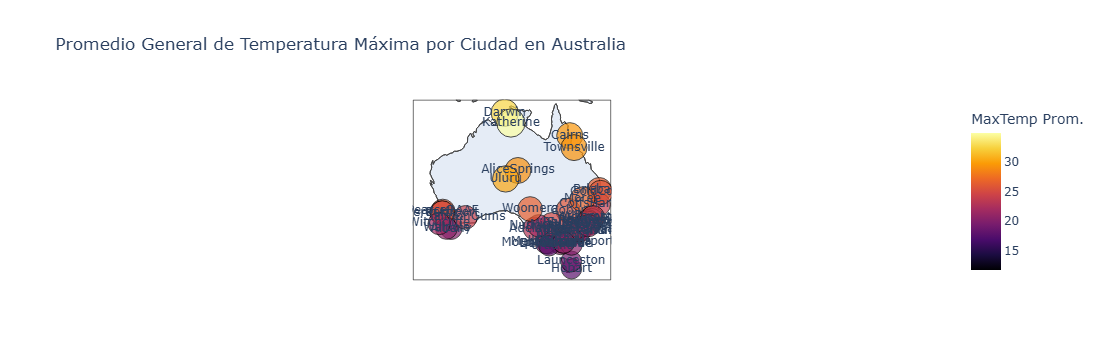

In [162]:
# Crear el mapa
fig = px.scatter_geo(
    datos_temp,
    lat='Latitude',
    lon='Longitude',
    text='Location',
    color='MaxTemp',
    color_continuous_scale='Inferno',
    size='MaxTemp',
    projection='natural earth',
    title='Promedio General de Temperatura Máxima por Ciudad en Australia',
    hover_name='Location',
    hover_data={'MaxTemp': ':.2f', 'Latitude': True, 'Longitude': True}
)

# Mejorar estilo del mapa
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_geos(
    lataxis_range=[-45, -10],
    lonaxis_range=[110, 155],
    visible=True,
    showcountries=True,
    showsubunits=True
)
fig.update_layout(coloraxis_colorbar=dict(title='MaxTemp Prom.'))

fig.show()

## Matriz de correlación sobre la variable objetivo de regresión

Ahora procedemos a buscar las posibles variables predictoras para nustra variable objetivo MaxTemp. Importamos los datos ya tratados

In [89]:
ds = pd.read_csv('../data/data_lista.csv')
ds.head()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.543424  0.523629  0.001617       0.413043      0.370370      0.421053   
1  0.394541  0.565217  0.000000       0.413043      0.074074      0.385965   
2  0.531017  0.576560  0.000000       0.434783      0.351852      0.456140   
3  0.439206  0.620038  0.000000       0.195652      0.203704      0.157895   
4  0.645161  0.701323  0.002695       0.380435      0.129630      0.350877   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  RainToday  \
0         0.71         0.22     0.390741     0.392523  ...        0.0   
1         0.44         0.25     0.444444     0.405607  ...        0.0   
2         0.38         0.30     0.388889     0.422430  ...        0.0   
3         0.45         0.16     0.574074     0.499065  ...        0.0   
4         0.82         0.33     0.448148     0.371963  ...        0.0   

    RISK_MM  RainTomorrow  Location_le  Risk_MM_cat_le  Rainfall_cat_le  \
0  0.000000           0.0     0.041667             1.0              1.0   
1  0.000000           0.0     0.041667             1.0              1.0   
2  0.000000           0.0     0.041667             1.0              1.0   
3  0.002695           0.0     0.041667             1.0              1.0   
4  0.000539           0.0     0.041667             1.0              1.0   

   Estacion_le  WindGustDir_le  WindDir9am_le  WindDir3pm_le  
0          1.0          0.8125         0.8125         0.8750  
1          1.0          0.8750         0.3750         0.9375  
2          1.0          0.9375         0.8125         0.9375  
3          1.0          0.2500         0.5625         0.0000  
4          1.0          0.8125         0.0625         0.4375  

[5 rows x 24 columns]

Calculamos la correlación entre todas las variables

In [91]:
mat_corr = ds.corr()

for i in range(mat_corr.shape[0]):
  mat_corr.iloc[i, i] = 0.0

mat_corr

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp          0.000000  0.734616  0.104341       0.167566      0.178048   
MaxTemp          0.734616  0.000000 -0.064260       0.053986      0.035191   
Rainfall         0.104341 -0.064260  0.000000       0.101512      0.055337   
WindGustSpeed    0.167566  0.053986  0.101512       0.000000      0.554728   
WindSpeed9am     0.178048  0.035191  0.055337       0.554728      0.000000   
WindSpeed3pm     0.180583  0.051585  0.044992       0.633750      0.486052   
Humidity9am     -0.244864 -0.504403  0.206690      -0.211224     -0.270164   
Humidity3pm     -0.020465 -0.498528  0.222651      -0.029241     -0.048256   
Pressure9am     -0.431665 -0.318519 -0.141005      -0.393450     -0.191671   
Pressure3pm     -0.442845 -0.404347 -0.104764      -0.351766     -0.151668   
Cloud9am         0.040576 -0.257134  0.177652       0.026201     -0.023037   
Cloud3pm         0.000210 -0.260505  0.160679       0.063363      0.016764   
Temp9am          0.898940  0.874391  0.018107       0.128850      0.130816   
Temp3pm          0.714064  0.979609 -0.067505       0.022816      0.021818   
RainToday        0.056507 -0.219109  0.501685       0.137473      0.079864   
RISK_MM          0.123431 -0.035637  0.306988       0.121030      0.047415   
RainTomorrow     0.081071 -0.155635  0.238618       0.195426      0.072724   
Location_le     -0.005311 -0.025734 -0.003027       0.080247      0.082526   
Risk_MM_cat_le  -0.117756  0.031054 -0.266729      -0.113831     -0.041984   
Rainfall_cat_le -0.069917  0.049528 -0.605256      -0.075946     -0.042422   
Estacion_le      0.479298  0.529735  0.010982       0.168556      0.123497   
WindGustDir_le  -0.124935 -0.209368  0.044872       0.102786     -0.027150   
WindDir9am_le   -0.122358 -0.239953  0.065142      -0.057445     -0.173937   
WindDir3pm_le   -0.160781 -0.187611  0.048550       0.111188      0.010001   

                 WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp              0.180583    -0.244864    -0.020465    -0.431665   
MaxTemp              0.051585    -0.504403    -0.498528    -0.318519   
Rainfall             0.044992     0.206690     0.222651    -0.141005   
WindGustSpeed        0.633750    -0.211224    -0.029241    -0.393450   
WindSpeed9am         0.486052    -0.270164    -0.048256    -0.191671   
WindSpeed3pm         0.000000    -0.144477     0.033016    -0.250955   
Humidity9am         -0.144477     0.000000     0.647088     0.145078   
Humidity3pm          0.033016     0.647088     0.000000     0.012932   
Pressure9am         -0.250955     0.145078     0.012932     0.000000   
Pressure3pm         -0.216502     0.191902     0.088918     0.944231   
Cloud9am             0.021567     0.388160     0.418397    -0.093626   
Cloud3pm             0.008474     0.318264     0.428276    -0.110229   
Temp9am              0.165398    -0.459193    -0.225223    -0.399234   
Temp3pm              0.030911    -0.496710    -0.531546    -0.284753   
RainToday            0.069785     0.338720     0.346375    -0.165909   
RISK_MM              0.029773     0.161548     0.239529    -0.147210   
RainTomorrow         0.068881     0.251338     0.380220    -0.220855   
Location_le          0.062833     0.000406     0.015682     0.037325   
Risk_MM_cat_le      -0.019215    -0.148212    -0.221821     0.142198   
Rainfall_cat_le     -0.033751    -0.144430    -0.156318     0.099119   
Estacion_le          0.149712    -0.291267    -0.193080    -0.356586   
WindGustDir_le       0.045852     0.075561     0.095484    -0.105394   
WindDir9am_le       -0.026744     0.205528     0.181461     0.029947   
WindDir3pm_le        0.039135     0.045312     0.023601    -0.115195   

                 Pressure3pm  ...  RainToday   RISK_MM  RainTomorrow  \
MinTemp            -0.442845  ...   0.056507  0.123431      0.081071   
MaxTemp            -0.404347  ...  -0.219109 -0.035637     -0.155635   
Rainfall           -0.104764  ...   0.501685  0.30

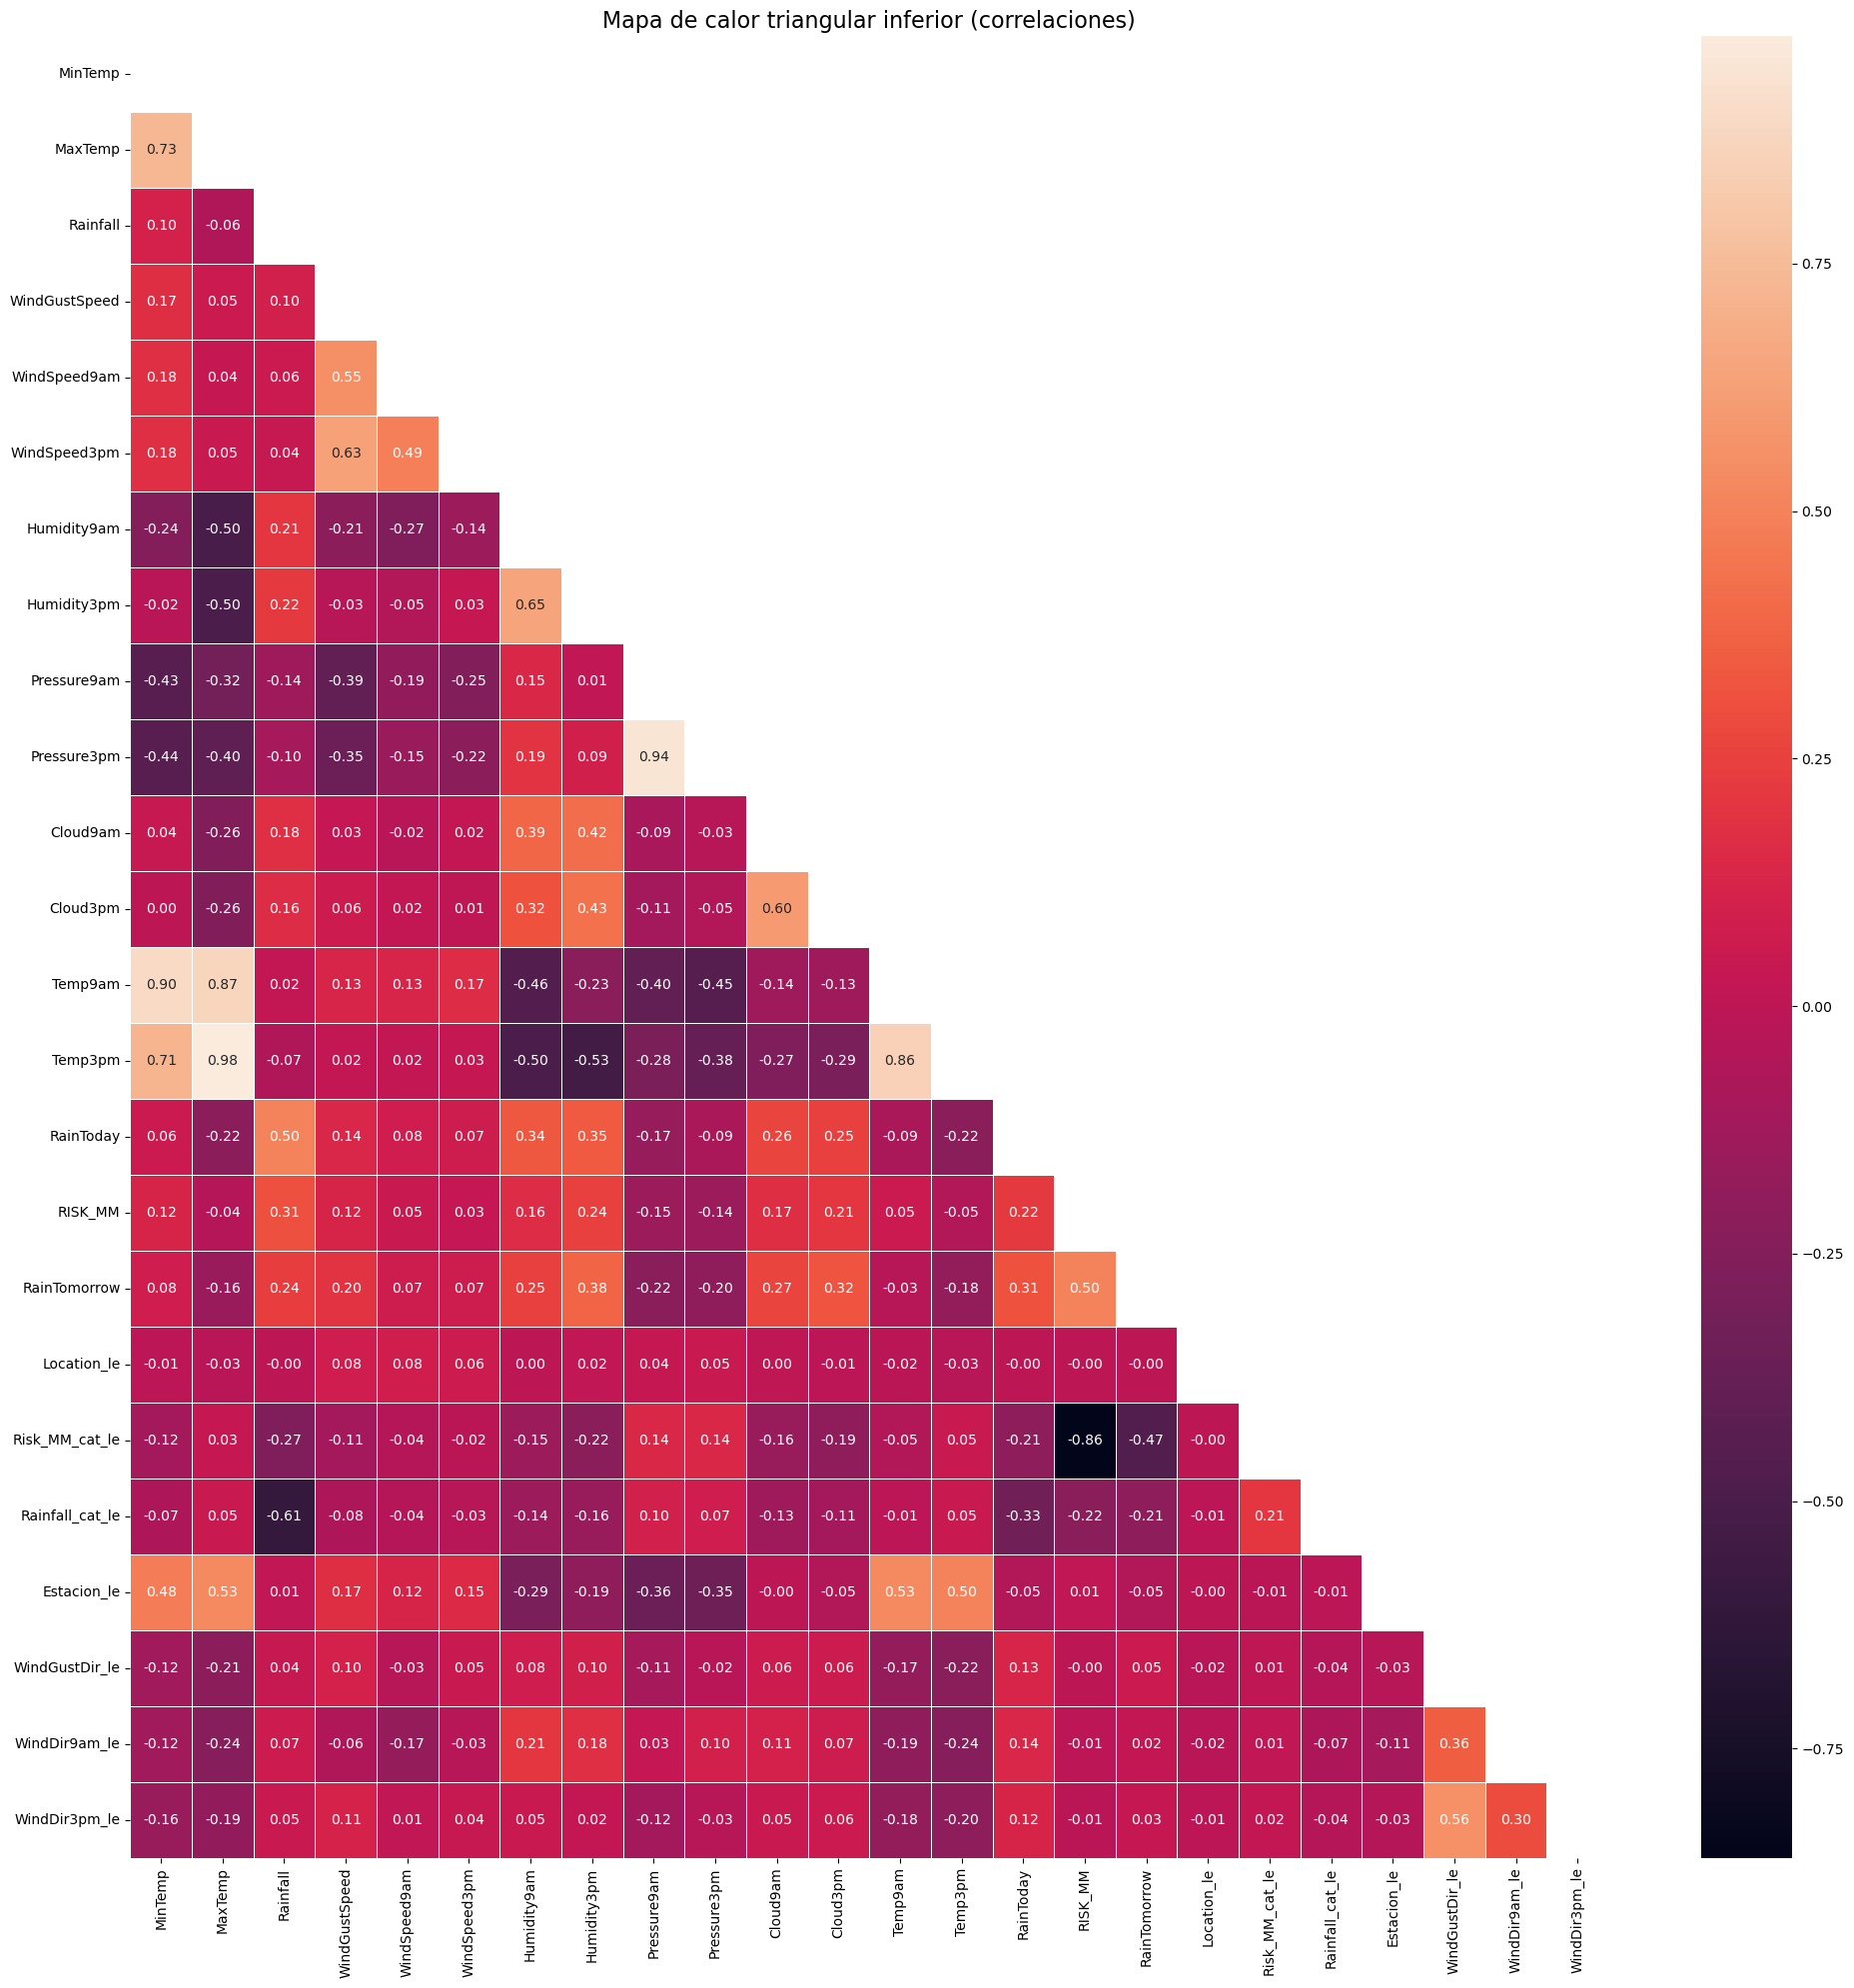

In [93]:
# Crear una máscara para ocultar la parte superior
mask = np.triu(np.ones_like(mat_corr, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(mat_corr, mask=mask, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor triangular inferior (correlaciones)", fontsize=16)
plt.tight_layout()
plt.show()

Mostramos las variables con las correlaciones más altas

In [95]:
# Obtener el triángulo superior de la matriz para evitar duplicados y la diagonal
mask = np.triu(np.ones_like(mat_corr, dtype=bool))
mat_corr_masked = mat_corr.where(~mask)

# Filtrar las correlaciones con valor absoluto mayor a 0.5
umbral = 0.5
correlaciones_altas = mat_corr_masked[mat_corr_masked.abs() > umbral]

# Descartar valores nulos y convertir a formato largo
correlaciones_altas = correlaciones_altas.stack().sort_values(ascending=False)

print(correlaciones_altas)

Temp3pm          MaxTemp           0.979609
Pressure3pm      Pressure9am       0.944231
Temp9am          MinTemp           0.898940
                 MaxTemp           0.874391
Temp3pm          Temp9am           0.855279
MaxTemp          MinTemp           0.734616
Temp3pm          MinTemp           0.714064
Humidity3pm      Humidity9am       0.647088
WindSpeed3pm     WindGustSpeed     0.633750
Cloud3pm         Cloud9am          0.600770
WindDir3pm_le    WindGustDir_le    0.561563
WindSpeed9am     WindGustSpeed     0.554728
Estacion_le      Temp9am           0.531182
                 MaxTemp           0.529735
                 Temp3pm           0.501718
RainToday        Rainfall          0.501685
RainTomorrow     RISK_MM           0.501484
Humidity9am      MaxTemp          -0.504403
Temp3pm          Humidity3pm      -0.531546
Rainfall_cat_le  Rainfall         -0.605256
Risk_MM_cat_le   RISK_MM          -0.860398
dtype: float64


Finalmente mostramos las 10 variables más correlacionadas con la variable objetivo MaxTemp.

In [97]:
mat_corr['MaxTemp'].abs().sort_values(ascending=False).head(10)

Temp3pm        0.979609
Temp9am        0.874391
MinTemp        0.734616
Estacion_le    0.529735
Humidity9am    0.504403
Humidity3pm    0.498528
Pressure3pm    0.404347
Pressure9am    0.318519
Cloud3pm       0.260505
Cloud9am       0.257134
Name: MaxTemp, dtype: float64

# Análisis de la variable objetivo Clasificación

A continuación, procederemos a analizar nuestra variable objetivo para el problema de clasificación: RainTomorrow. Esta variable indica si se espera lluvia al día siguiente, y representa una excelente elección para un ejercicio de clasificación binaria, ya que sus valores posibles son claramente diferenciables (sí o no). Además, RainTomorrow capta de manera efectiva el comportamiento de las precipitaciones, el cual está estrechamente relacionado con factores como la ubicación geográfica, la estación del año y las características climáticas específicas de cada región del país.

La elección de esta variable no solo permite entrenar modelos que clasifiquen con base en condiciones meteorológicas actuales, sino que también refleja un fenómeno climático de gran interés práctico.

Ahora visualizamos el promedio de lluvia de cada localidad y vemos su posición dentro del mapa de Australia.

- Podemos notar a grandes rasgos que las zonas costeras son más lluviosas que las zonas interiores de Australia.

In [185]:
datos_rain = df_geo.groupby(['Location', 'Latitude', 'Longitude'])['Rainfall'].mean().reset_index()

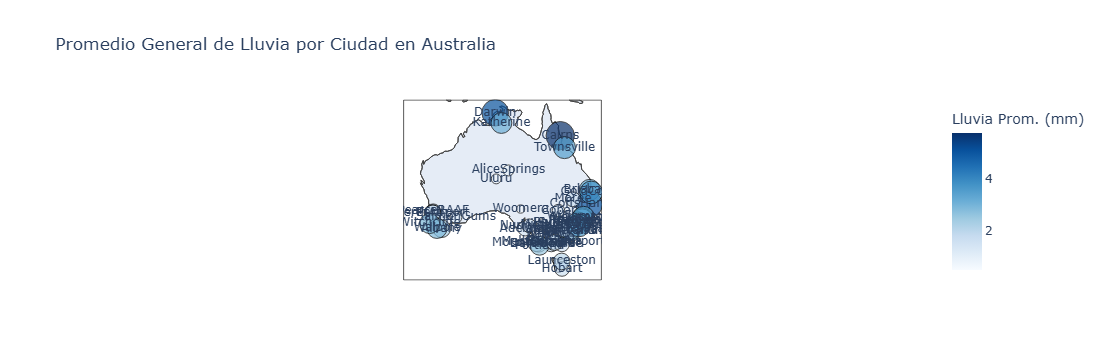

In [187]:
# Crear el mapa
fig = px.scatter_geo(
    datos_rain,
    lat='Latitude',
    lon='Longitude',
    text='Location',
    color='Rainfall',
    color_continuous_scale='Blues',
    size='Rainfall',
    projection='natural earth',
    title='Promedio General de Lluvia por Ciudad en Australia',
    hover_name='Location',
    hover_data={'Rainfall': ':.2f', 'Latitude': False, 'Longitude': False}
)

# Mejorar estilo del mapa
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_geos(
    lataxis_range=[-45, -10],
    lonaxis_range=[110, 155],
    visible=True,
    showcountries=True,
    showsubunits=True
)
fig.update_layout(coloraxis_colorbar=dict(title='Lluvia Prom. (mm)'))

fig.show()

## Balanceado de la variable objetivo de clasificación según Location y Estación del año

Procederemos a realizar el balanceado de la variable objetivo de clasificación RainTomorrow en base a Location y Estacion del año

Esta tabla presenta información sobre la variable RainTomorrow, que indica si lloverá al día siguiente (0.0 para no lluvia y 1.0 para lluvia).

Se organiza por estaciones codificadas en Location_le y Estacion_le, mostrando el número de registros donde no llueve (0.0) y donde sí llueve (1.0). La columna Total suma ambos valores, reflejando el número total de observaciones por ubicación.

La columna RainTomorrow_ratio indica la proporción de días con lluvia en cada estación, calculada como el número de días con lluvia dividido por el total de registros. Por ejemplo, en la primera Location_le (0.000000 en Estacion_le), aproximadamente 38.28% de los días tienen lluvia. En cambio, en la misma Location_le pero con la estación 1.00000, solo 11.67% de los días tienen lluvia.

In [101]:
balance = ds.groupby(['Location_le', 'Estacion_le'])['RainTomorrow'].value_counts().unstack()
balance['Total'] = balance.sum(axis=1)
balance['RainTomorrow_ratio'] = balance[1] / balance['Total']
balance

RainTomorrow             0.0  1.0  Total  RainTomorrow_ratio
Location_le Estacion_le                                     
0.000000    0.000000     487  302    789            0.382763
            0.333333     607  158    765            0.206536
            0.666667     657  142    799            0.177722
            1.000000     651   86    737            0.116689
0.020833    0.000000     398  360    758            0.474934
...                      ...  ...    ...                 ...
0.979167    1.000000     544  199    743            0.267833
1.000000    0.000000     707   53    760            0.069737
            0.333333     739   57    796            0.071608
            0.666667     678   49    727            0.067400
            1.000000     663   43    706            0.060907

[196 rows x 4 columns]

Definimos nuestras posibles variables predictoras, por ahora serían todas las variables menos la variable RainTomorrow

In [103]:
feature_cols = [col for col in ds.columns if col != 'RainTomorrow']

Aplicamos el algoritmo Smote agrupando por Location y Estacion del año

In [105]:
from imblearn.over_sampling import SMOTE


def aplicar_smote_por_grupo(df, feature_cols, target_col='RainTomorrow', group_cols=['Location_le', 'Estacion_le'], k_neighbors=1, random_state=42):
  """
    Aplica SMOTE de forma individual para cada grupo definido por group_cols.

    Parámetros:
    - df: DataFrame de entrada.
    - feature_cols: lista de columnas de entrada (features).
    - target_col: nombre de la columna objetivo (por defecto 'RainTomorrow').
    - group_cols: lista con las columnas de agrupamiento (por defecto ['Location_le', 'Estacion_le']).
    - k_neighbors: número de vecinos para SMOTE (por defecto 1).
    - random_state: semilla para reproducibilidad (por defecto 42).

    Retorna:
    - X_final: DataFrame con features reamuestrados.
    - y_final: Serie con etiquetas reamuestradas.
    - grupos_fallidos: lista de DataFrames con los grupos que no se pudieron reamuestrar.
  """

  X_resampled_list = []
  y_resampled_list = []

  grupos_fallidos = []

  grouped = df.groupby(group_cols)

  for group_keys, group in grouped:
      X_group = group[feature_cols]
      y_group = group[target_col]

      # Contar clases
      counts = y_group.value_counts()
      print(f"Grupo {group_keys} - Clases:\n{counts}\n")

      if len(counts) < 2 or counts.min() < 2:
          print(f"⚠️ Grupo con una sola muestra minoritaria: {group_keys}")
          grupos_fallidos.append(group)
          continue

      sm = SMOTE(random_state=random_state, k_neighbors=k_neighbors)
      try:
          X_res, y_res = sm.fit_resample(X_group, y_group)
          X_resampled_list.append(pd.DataFrame(X_res, columns=feature_cols))
          y_resampled_list.append(pd.Series(y_res, name=target_col))
      except ValueError as e:
          print(f"❌ SMOTE falló para {group_keys}: {e}")
          grupos_fallidos.append(group)
          continue

  # Concatenar resultados
  X_final = pd.concat(X_resampled_list, ignore_index=True)
  y_final = pd.concat(y_resampled_list, ignore_index=True)

  return X_final, y_final, grupos_fallidos

In [107]:
X_smote, y_smote, grupos_no_procesados = aplicar_smote_por_grupo(ds, feature_cols)

Grupo (0.0, 0.0) - Clases:
RainTomorrow
0.0    487
1.0    302
Name: count, dtype: int64

Grupo (0.0, 0.3333333333333333) - Clases:
RainTomorrow
0.0    607
1.0    158
Name: count, dtype: int64

Grupo (0.0, 0.6666666666666666) - Clases:
RainTomorrow
0.0    657
1.0    142
Name: count, dtype: int64

Grupo (0.0, 1.0) - Clases:
RainTomorrow
0.0    651
1.0     86
Name: count, dtype: int64

Grupo (0.0208333333333333, 0.0) - Clases:
RainTomorrow
0.0    398
1.0    360
Name: count, dtype: int64

Grupo (0.0208333333333333, 0.3333333333333333) - Clases:
RainTomorrow
0.0    560
1.0    227
Name: count, dtype: int64

Grupo (0.0208333333333333, 0.6666666666666666) - Clases:
RainTomorrow
0.0    513
1.0    214
Name: count, dtype: int64

Grupo (0.0208333333333333, 1.0) - Clases:
RainTomorrow
0.0    643
1.0    101
Name: count, dtype: int64

Grupo (0.0416666666666666, 0.0) - Clases:
RainTomorrow
0.0    525
1.0    234
Name: count, dtype: int64

Grupo (0.0416666666666666, 0.3333333333333333) - Clases:
RainTom

Durante el proceso de balanceo utilizando SMOTE, se identificaron dos combinaciones específicas de Location_le y Estacion_le para las cuales no fue posible aplicar la técnica, debido a que en cada una de ellas existía solo una muestra perteneciente a la clase minoritaria de la variable objetivo RainTomorrow. Esta situación impide el funcionamiento de SMOTE, ya que requiere al menos dos muestras de la clase minoritaria para poder generar instancias sintéticas a partir de sus vecinos.

Los grupos afectados son los siguientes:

Location_le = 0.2708, Estacion_le = 0.0

Location_le = 0.3333, Estacion_le = 0.0

Para estos casos particulares, se optará por aplicar RandomOverSampler, una técnica de sobre-muestreo que no depende de los vecinos y permite duplicar aleatoriamente las muestras de la clase minoritaria. De esta forma, se logrará balancear ambos grupos sin necesidad de descartar datos valiosos ni introducir sesgos significativos, asegurando así que todos los grupos sean tratados de forma equitativa en la etapa de entrenamiento del modelo.

Aplicamos RandomOverSampler

In [109]:
from imblearn.over_sampling import RandomOverSampler

X_fallidos = []
y_fallidos = []

for grupo in grupos_no_procesados:
    X_group = grupo[feature_cols]
    y_group = grupo['RainTomorrow']

    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X_group, y_group)

    X_fallidos.append(pd.DataFrame(X_res, columns=feature_cols))
    y_fallidos.append(pd.Series(y_res, name='RainTomorrow'))

# Concatenar resultados
X_fallidos_final = pd.concat(X_fallidos, ignore_index=True)
y_fallidos_final = pd.concat(y_fallidos, ignore_index=True)

Concatenamos los datos obtenidos de SMOTE con los de RandomOverSampler

In [111]:
X_completo = pd.concat([X_smote, X_fallidos_final], ignore_index=True)
y_completo = pd.concat([y_smote, y_fallidos_final], ignore_index=True)

In [113]:
ds_balanceado = pd.concat([X_completo, y_completo], axis=1)

Revisamos la cantidad de datos del dataset balanceado

In [115]:
ds_balanceado.shape

(221312, 24)

Por ultimo, como podemos ver en esta tabla, por cada Location y Estacion tenemos la misma probabilidad de clasificar a la variable RainTomorrow como 0 o como 1, es decir se ha balanceado correctamente el dataset por Location y Estacion.

In [117]:
resumen = ds_balanceado.groupby(['Location_le', 'Estacion_le'])['RainTomorrow'].value_counts().unstack()
resumen['Total'] = resumen[0] + resumen[1]
resumen['RainTomorrow_ratio'] = resumen[1] / resumen['Total']
resumen

RainTomorrow             0.0  1.0  Total  RainTomorrow_ratio
Location_le Estacion_le                                     
0.000000    0.000000     487  487    974                 0.5
            0.333333     607  607   1214                 0.5
            0.666667     657  657   1314                 0.5
            1.000000     651  651   1302                 0.5
0.020833    0.000000     398  398    796                 0.5
...                      ...  ...    ...                 ...
0.979167    1.000000     544  544   1088                 0.5
1.000000    0.000000     707  707   1414                 0.5
            0.333333     739  739   1478                 0.5
            0.666667     678  678   1356                 0.5
            1.000000     663  663   1326                 0.5

[196 rows x 4 columns]

Exportamos nuestro dataset balanceado

In [119]:
ds_balanceado.to_csv('../data/dataset_balanceado.csv', index=False)

# Conclusiones Fase 3

- Se confirmó la predominancia de días secos y patrones térmicos coherentes con las zonas templadas y áridas de Australia.

- Se identificaron limitaciones importantes, como la ausencia significativa de datos en variables críticas (como evaporación y horas de sol), las cuales fueron descartadas para garantizar la integridad del análisis.

- Se evidenció un fuerte desbalance en las variables objetivo relacionadas con la lluvia, especialmente en la variable RainTomorrow. Esto motivó la aplicación de técnicas avanzadas de balanceo de clases como SMOTE, ejecutadas a nivel de grupos definidos por Location_le y Estacion_le.

- Para los grupos donde SMOTE no fue aplicable debido a la escasez extrema de muestras minoritarias, se utilizó RandomOverSampler como alternativa para lograr el balance sin perder información relevante.

- Se implementó una estrategia de imputación por KNN dentro de cada grupo, lo que permitió preservar las relaciones locales entre variables. Posteriormente, para los valores aún faltantes, se aplicó imputación con la mediana global, asegurando un tratamiento completo y razonable de los valores nulos.

- Se realizó un análisis de correlación entre variables para detectar redundancias y problemas de colinealidad. Como resultado, se seleccionó la variable MaxTemp como candidata para modelos de regresión, descartando Temp3pm por su alta correlación (0.97) y evitar multicolinealidad.

- En conjunto, estas tareas permitieron dejar el dataset en condiciones óptimas para el desarrollo de modelos predictivos, tanto de clasificación como de regresión, asegurando consistencia, balance y calidad en los datos.